### Importing all the necessary libraries

In [658]:
# loading packages
# basic + dates 
import numpy as np
import pandas as pd
from pandas import datetime
from datetime import datetime

# data visualization
import matplotlib.pyplot as plt
import matplotlib.style
plt.style.use('seaborn')
from pylab import rcParams
from sklearn import metrics #model performance metrics
import seaborn as sns # advanced vizs
%matplotlib inline

# statistics
from statsmodels.distributions.empirical_distribution import ECDF

# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.filterwarnings("ignore")

# Problem 2: Sparkling Wine

For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

In [659]:
df = pd.read_csv('Sparkling.csv')

In [660]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   YearMonth  187 non-null    object
 1   Sparkling  187 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


In [661]:
df.shape

(187, 2)

In [662]:
df.head()

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

In [663]:
df.tail(5)

YearMonth  Sparkling
182   1995-03       1897
183   1995-04       1862
184   1995-05       1670
185   1995-06       1688
186   1995-07       2031

## 1. Read the data as an appropriate Time Series data and plot the data.

In [664]:
Time_Stamp= pd.date_range(start='1/1/1980',end='8/1/1995',freq='M')
Time_Stamp

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [665]:
df['Time_Stamp'] = Time_Stamp
df.head()

YearMonth  Sparkling Time_Stamp
0   1980-01       1686 1980-01-31
1   1980-02       1591 1980-02-29
2   1980-03       2304 1980-03-31
3   1980-04       1712 1980-04-30
4   1980-05       1471 1980-05-31

In [666]:
df.set_index(keys='Time_Stamp', inplace=True)
df.drop(['YearMonth'], axis=1, inplace=True)
df.head()

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

In [667]:
df.tail()

Sparkling
Time_Stamp           
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031

### Renaming the column

In [668]:
df.rename(columns={'Sparkling':'Sparkling_Wine_Sales'}, inplace=True)
df.head()

Sparkling_Wine_Sales
Time_Stamp                      
1980-01-31                  1686
1980-02-29                  1591
1980-03-31                  2304
1980-04-30                  1712
1980-05-31                  1471

In [669]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Sparkling_Wine_Sales  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


### Checking for missing values

In [670]:
df.isnull().sum()

Sparkling_Wine_Sales    0
dtype: int64

No missing values present

### Plot the Time Series to understand the behaviour of the data.

Text(0, 0.5, 'Wine Units Sold')

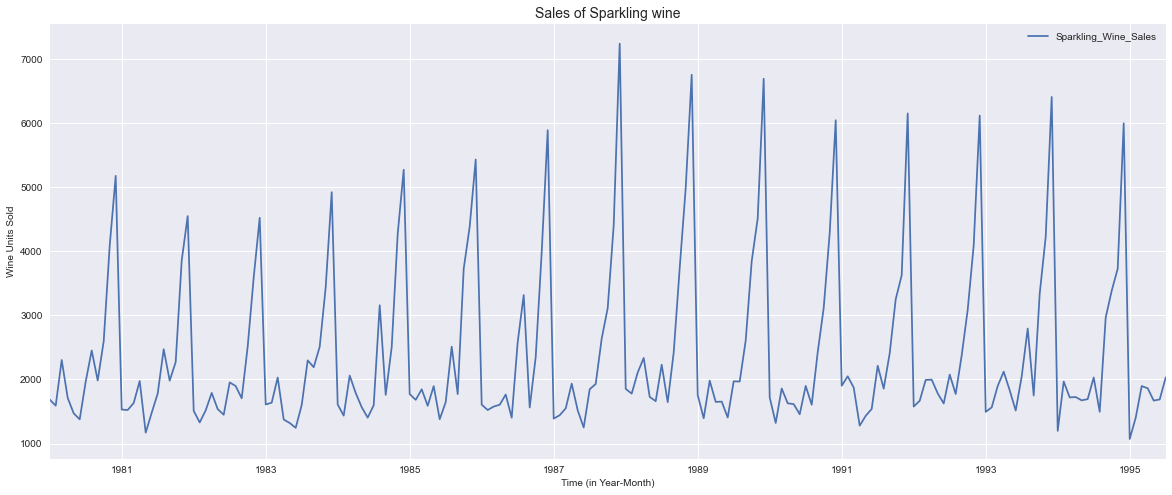

In [671]:
rcParams['figure.figsize'] = 20,8
df.plot(grid=True);
plt.title('Sales of Sparkling wine', fontsize=14)
plt.xlabel('Time (in Year-Month)',fontsize=10)
plt.ylabel('Wine Units Sold',fontsize=10)


## 2.2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [672]:
df.head()

Sparkling_Wine_Sales
Time_Stamp                      
1980-01-31                  1686
1980-02-29                  1591
1980-03-31                  2304
1980-04-30                  1712
1980-05-31                  1471

### Check the basic measures of descriptive statistics

In [673]:
df.describe()

Sparkling_Wine_Sales
count            187.000000
mean            2402.417112
std             1295.111540
min             1070.000000
25%             1605.000000
50%             1874.000000
75%             2549.000000
max             7242.000000

1. The average sales of Sparkling wine is around 2402 units
2. The minimuim quantity of sales recorded is 1070 and the max is 7242 units
3. Around 50% of the sales recorded in a month are around 1874 units
4. Only 25% of the sales recorded in a month are above 2549 units

### Plot a boxplot to understand the spread of sales across different years and within different months across years.

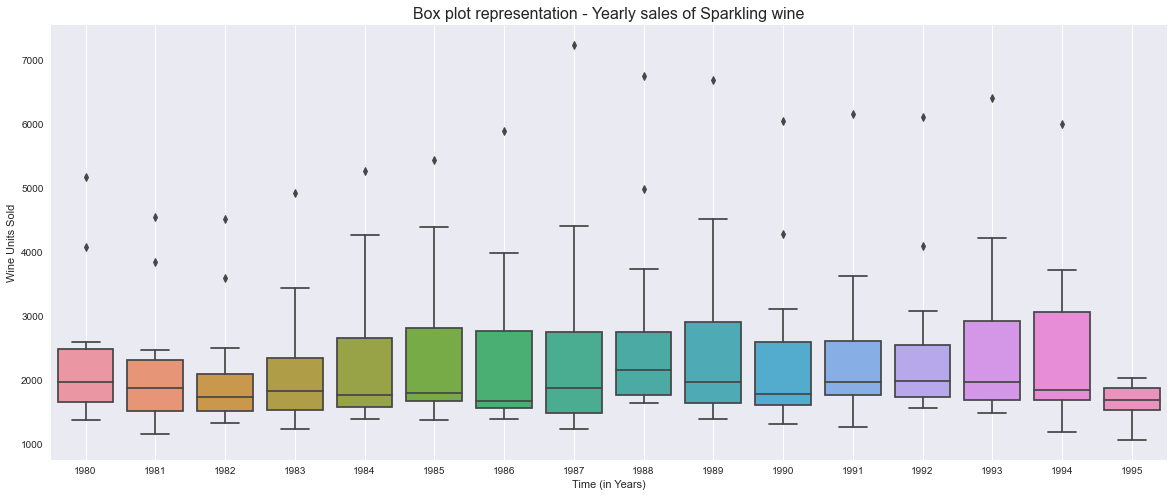

In [674]:
_, ax = plt.subplots(figsize=(20,8))
sns.boxplot(x = df.index.year,y = df.values[:,0],ax=ax)
plt.title('Box plot representation - Yearly sales of Sparkling wine', fontsize=16)
plt.xlabel('Time (in Years)')
plt.ylabel('Wine Units Sold')
plt.grid();

1. The sales of sparkling wine have gradually maintained within a range over the years
2. The maximum sales were in the year 1988

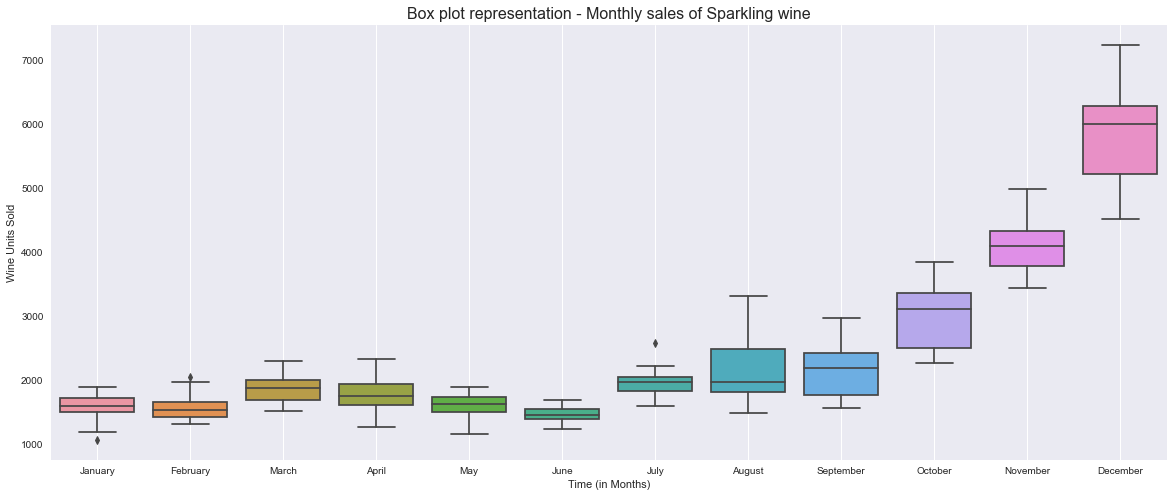

In [675]:
_, ax = plt.subplots(figsize=(20,8))
sns.boxplot(x = df.index.month_name(),y = df.values[:,0],ax=ax)
plt.title('Box plot representation - Monthly sales of Sparkling wine', fontsize=16)
plt.xlabel('Time (in Months)')
plt.ylabel('Wine Units Sold')
plt.grid();

1. December month records the highest average sales
2. The sales seems to usually pick in the last 4 months

Average order is greater in december and lowest in June

### Plot the empirical cumulative Distribution function

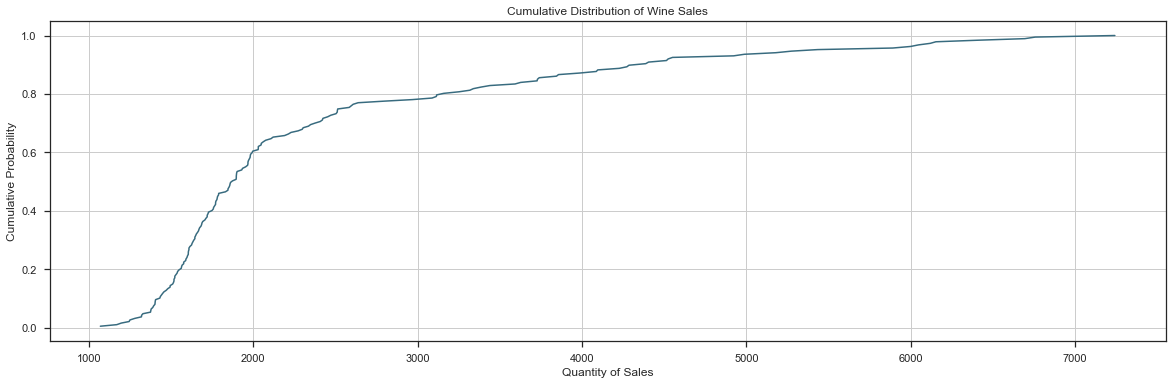

In [676]:
## Plot ECDF: Empirical Cumulative Distribution Function
#ECDF - Adds up the number of observations that are there for a certain value.
sns.set(style = "ticks")# to format into seaborn 
c = '#386B7F' # basic color for plots
plt.figure(figsize = (20, 20))


plt.subplot(312)
cdf = ECDF(df['Sparkling_Wine_Sales'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c)
plt.title('Cumulative Distribution of Wine Sales')
plt.xlabel('Quantity of Sales');
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.show()

Read properly and give observations in report

### Monthly sales across years.

In [677]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Sparkling_Wine_Sales', columns = df.index.month_name(), index = df.index.year)
monthly_sales_across_years

Time_Stamp   April  August  December  February  January    July    June  \
Time_Stamp                                                                
1980        1712.0  2453.0    5179.0    1591.0   1686.0  1966.0  1377.0   
1981        1976.0  2472.0    4551.0    1523.0   1530.0  1781.0  1480.0   
1982        1790.0  1897.0    4524.0    1329.0   1510.0  1954.0  1449.0   
1983        1375.0  2298.0    4923.0    1638.0   1609.0  1600.0  1245.0   
1984        1789.0  3159.0    5274.0    1435.0   1609.0  1597.0  1404.0   
1985        1589.0  2512.0    5434.0    1682.0   1771.0  1645.0  1379.0   
1986        1605.0  3318.0    5891.0    1523.0   1606.0  2584.0  1403.0   
1987        1935.0  1930.0    7242.0    1442.0   1389.0  1847.0  1250.0   
1988        2336.0  1645.0    6757.0    1779.0   1853.0  2230.0  1661.0   
1989        1650.0  1968.0    6694.0    1394.0   1757.0  1971.0  1406.0   
1990        1628.0  1605.0    6047.0    1321.0   1720.0  1899.0  1457.0   
1991        1279.0  1857.0    6153.0    2049.0   1902.0  2214.0  1540.0   
1992        1997.0  1773.0    6119.0    1667.0   1577.0  2076.0  1625.0   
1993        2121.0  2795.0    6410.0    1564.0   1494.0  2048.0  1515.0   
1994        1725.0  1495.0    5999.0    1968.0   1197.0  2031.0  1693.0   
1995        1862.0     NaN       NaN    1402.0   1070.0  2031.0  1688.0   

Time_Stamp   March     May  November  October  September  
Time_Stamp                                                
1980        2304.0  1471.0    4087.0   2596.0     1984.0  
1981        1633.0  1170.0    3857.0   2273.0     1981.0  
1982        1518.0  1537.0    3593.0   2514.0     1706.0  
1983        2030.0  1320.0    3440.0   2511.0     2191.0  
1984        2061.0  1567.0    4273.0   2504.0     1759.0  
1985        1846.0  1896.0    4388.0   3727.0     1771.0  
1986        1577.0  1765.0    3987.0   2349.0     1562.0  
1987        1548.0  1518.0    4405.0   3114.0     2638.0  
1988        2108.0  1728.0    4988.0   3740.0     2421.0  
1989        1982.0  1654.0    4514.0   3845.0     2608.0  
1990        1859.0  1615.0    4286.0   3116.0     2424.0  
1991        1874.0  1432.0    3627.0   3252.0     2408.0  
1992        1993.0  1783.0    4096.0   3088.0     2377.0  
1993        1898.0  1831.0    4227.0   3339.0     1749.0  
1994        1720.0  1674.0    3729.0   3385.0     2968.0  
1995        1897.0  1670.0       NaN      NaN        NaN

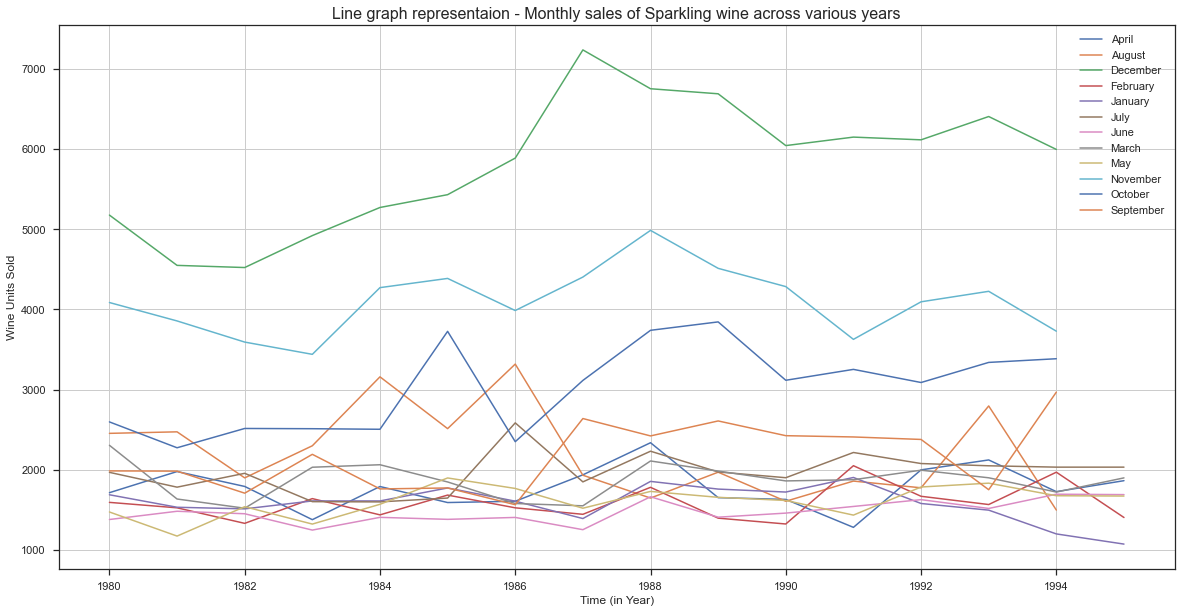

In [678]:
monthly_sales_across_years.plot(figsize=(20,10))
plt.grid();
plt.title('Line graph representaion - Monthly sales of Sparkling wine across various years', fontsize=16)
plt.xlabel('Time (in Year)')
plt.ylabel('Wine Units Sold')
plt.legend(loc='best');

1. December performed the best in terms of overall and average sales

### Resampling monthly data into a quarterly and yearly format

### Yearly plot

Let us try to resample or aggregate the Time Series from an annual perspective and sum up the observations of each month.

In [679]:
df_yearly_sum = df.resample('A').sum()
df_yearly_sum

Sparkling_Wine_Sales
Time_Stamp                      
1980-12-31                 28406
1981-12-31                 26227
1982-12-31                 25321
1983-12-31                 26180
1984-12-31                 28431
1985-12-31                 29640
1986-12-31                 29170
1987-12-31                 30258
1988-12-31                 33246
1989-12-31                 31443
1990-12-31                 28977
1991-12-31                 29587
1992-12-31                 30171
1993-12-31                 30991
1994-12-31                 29584
1995-12-31                 11620

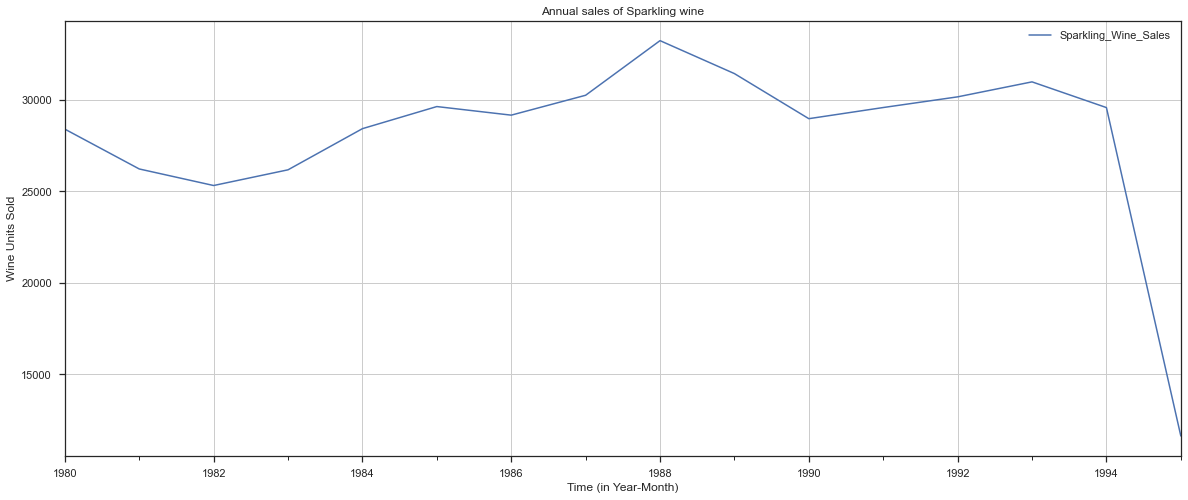

In [680]:
df_yearly_sum.plot();
plt.grid()
plt.title('Annual sales of Sparkling wine');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold');

Let us try to resample or aggregate the Time Series from an annual perspective and take the mean of the observations of the year considering each month as an observation.

### Quarterly Plot

In [681]:
df_quarterly_sum = df.resample('Q').sum()
df_quarterly_sum.head(10)

Sparkling_Wine_Sales
Time_Stamp                      
1980-03-31                  5581
1980-06-30                  4560
1980-09-30                  6403
1980-12-31                 11862
1981-03-31                  4686
1981-06-30                  4626
1981-09-30                  6234
1981-12-31                 10681
1982-03-31                  4357
1982-06-30                  4776

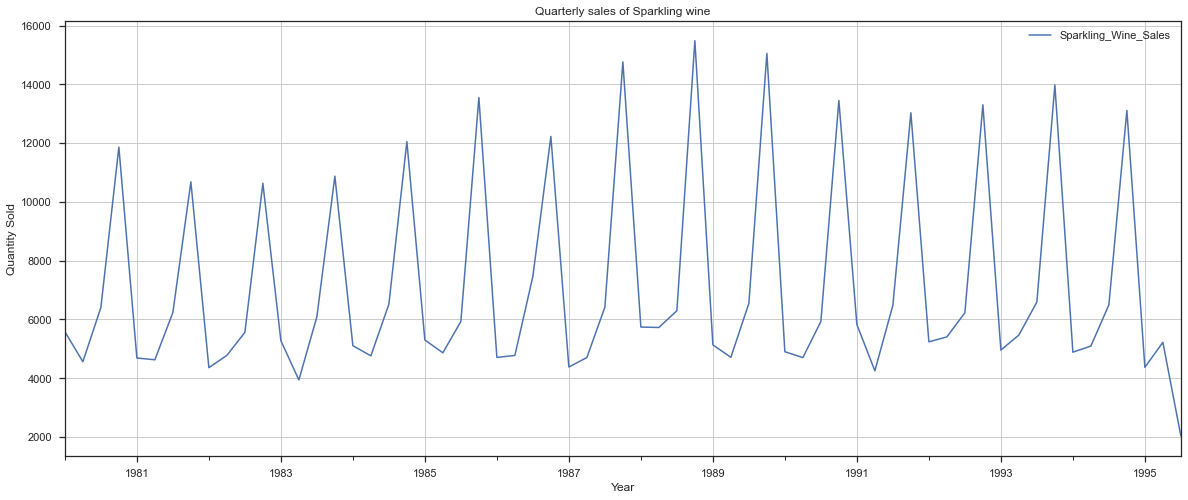

In [682]:
df_quarterly_sum.plot();
plt.grid()
plt.title('Quarterly sales of Sparkling wine');
plt.xlabel('Year')
plt.ylabel('Quantity Sold');

### Month plot of times series

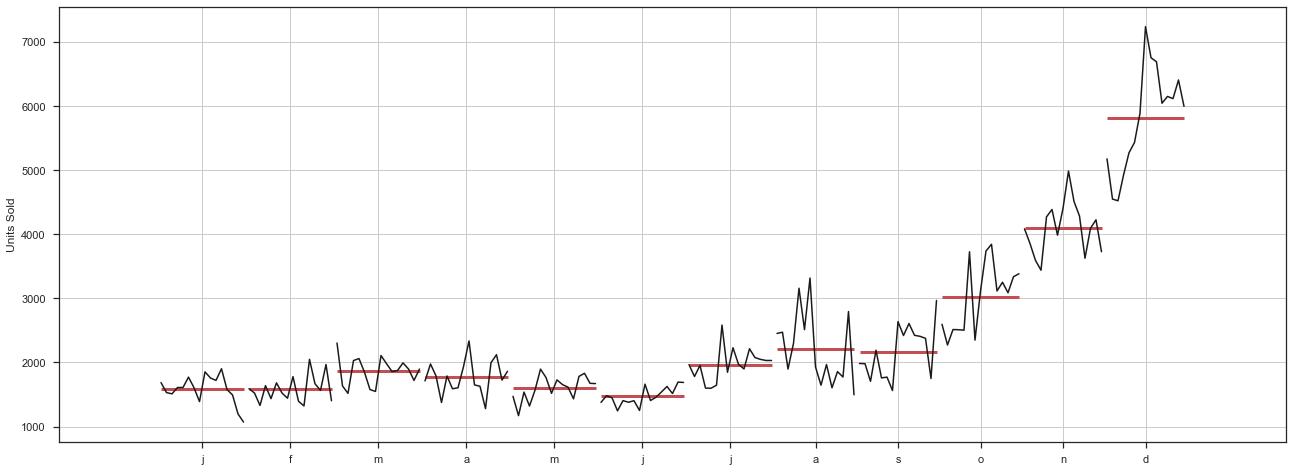

In [683]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))

month_plot(df,ylabel='Units Sold',ax=ax)
plt.grid();

1. The sales are incresingly high in Q3 and Q4

### Plot the average sales per month and the month on month percentage change of sales.

In [684]:
df.groupby(by=df.index)["Sparkling_Wine_Sales"].mean()

Time_Stamp
1980-01-31    1686.0
1980-02-29    1591.0
1980-03-31    2304.0
1980-04-30    1712.0
1980-05-31    1471.0
               ...  
1995-03-31    1897.0
1995-04-30    1862.0
1995-05-31    1670.0
1995-06-30    1688.0
1995-07-31    2031.0
Name: Sparkling_Wine_Sales, Length: 187, dtype: float64

In [685]:
df.groupby(by=df.index)["Sparkling_Wine_Sales"].sum().pct_change()

Time_Stamp
1980-01-31         NaN
1980-02-29   -0.056346
1980-03-31    0.448146
1980-04-30   -0.256944
1980-05-31   -0.140771
                ...   
1995-03-31    0.353067
1995-04-30   -0.018450
1995-05-31   -0.103115
1995-06-30    0.010778
1995-07-31    0.203199
Name: Sparkling_Wine_Sales, Length: 187, dtype: float64

Text(0, 0.5, '% Change')

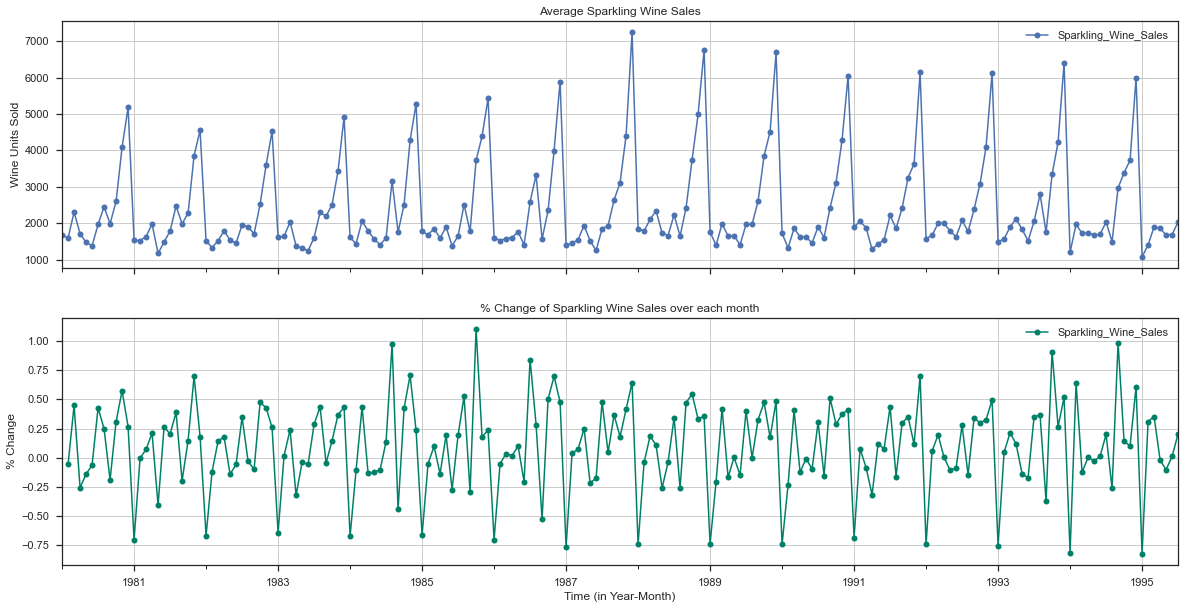

In [686]:
# group by date and get average RetailSales, and percent change
average    = df.groupby(by=df.index)["Sparkling_Wine_Sales"].mean()
pct_change = df.groupby(by=df.index)["Sparkling_Wine_Sales"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(20,10))
# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sparkling Wine Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
ax1.set_ylabel('Wine Units Sold')
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="% Change of Sparkling Wine Sales over each month",grid=True)
plt.xlabel('Time (in Year-Month)')
ax2.set_ylabel('% Change')


1. Average Sparkling wine sales graph shows us a no trend however yearly seasonality present in it
2. % change graph shows us the seasonality of the change in sales to be constant throghout the lifetime of sales

### Decomposition of the Time Series

### Additive decomposition

<Figure size 1440x576 with 0 Axes>

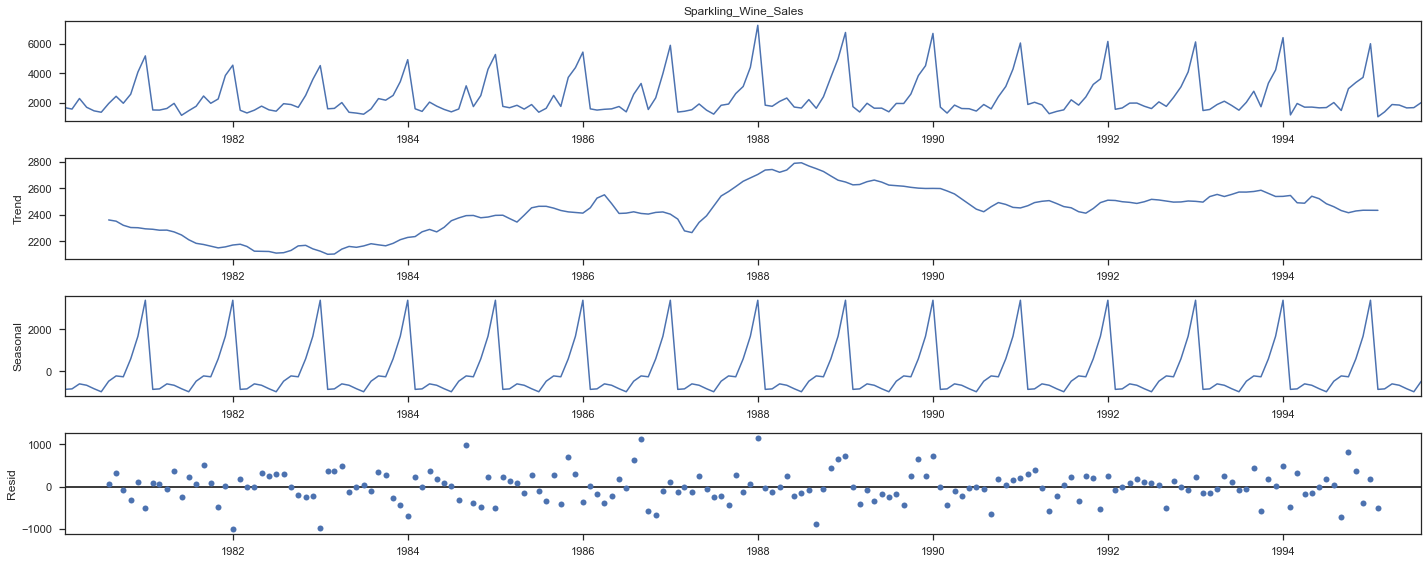

In [687]:
plt.figure(figsize=(20,8))
decomposition = seasonal_decompose(df['Sparkling_Wine_Sales'],model='additive')
decomposition.plot();
plt.show()

In [688]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    -854.260599
1980-02-29    -830.350678
1980-03-31    -592.356630
1980-04-30    -658.490559
1980-05-31    -824.416154
1980-06-30    -967.434011
1980-07-31    -465.502265
1980-08-31    -214.332821
1980-09-30    -254.677265
1980-10-31     599.769957
1980-11-30    1675.067179
1980-12-31    3386.983846
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31     70.835599
1980-08-31    315.999487
1980-09-30    -81.864401
1980-10-31   -307.3532

### Multiplicative Decomposition

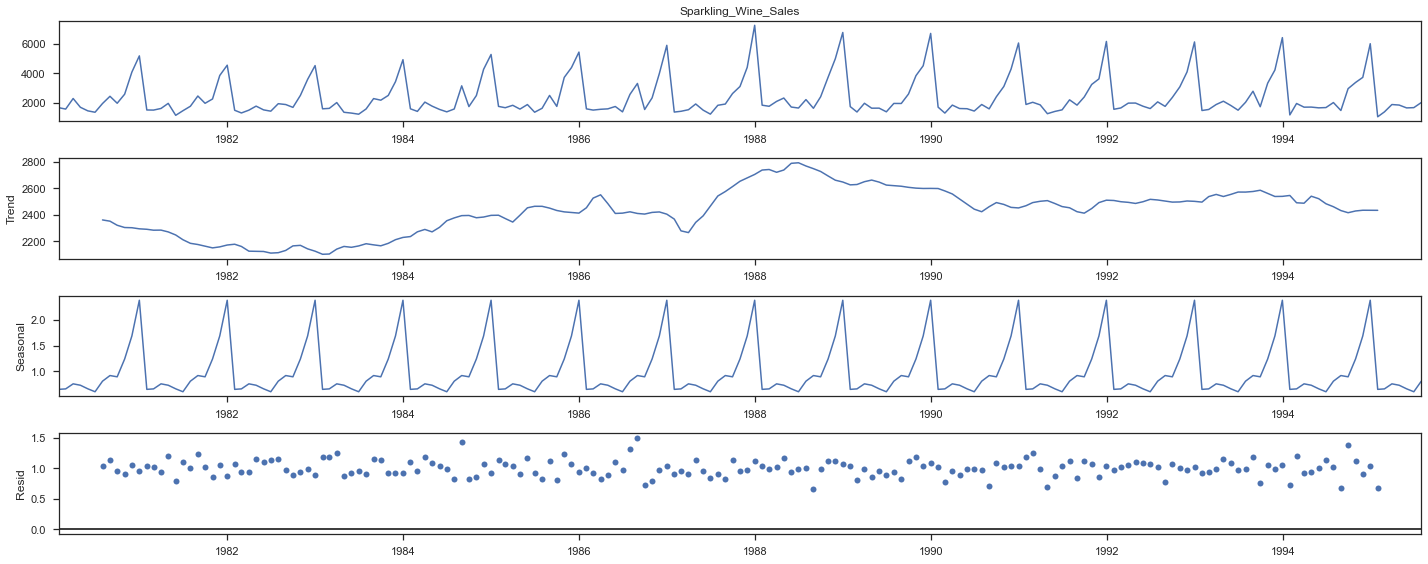

In [689]:
decomposition = seasonal_decompose(df['Sparkling_Wine_Sales'],model='multiplicative')
decomposition.plot();

In [690]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.649843
1980-02-29    0.659214
1980-03-31    0.757440
1980-04-30    0.730351
1980-05-31    0.660609
1980-06-30    0.603468
1980-07-31    0.809164
1980-08-31    0.918822
1980-09-30    0.894367
1980-10-31    1.241789
1980-11-30    1.690158
1980-12-31    2.384776
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    1.029230
1980-08-31    1.135407
1980-09-30    0.955954
1980-10-31    0.907513
1980-11-30    1.050423
1980-12-31    0.946770
Name: r

## 3. Split the data into training and test. The test data should start in 1991.

### Splitting the data into training and testing

In [691]:
train = df[df.index.year < 1991]
test = df[df.index.year >= 1991]

In [692]:
from IPython.display import display

In [693]:
print('First few rows of Training Data')
display(train.head(10))
print('Last few rows of Training Data')
display(train.tail(10))

First few rows of Training Data


Sparkling_Wine_Sales
Time_Stamp                      
1980-01-31                  1686
1980-02-29                  1591
1980-03-31                  2304
1980-04-30                  1712
1980-05-31                  1471
1980-06-30                  1377
1980-07-31                  1966
1980-08-31                  2453
1980-09-30                  1984
1980-10-31                  2596

Last few rows of Training Data


Sparkling_Wine_Sales
Time_Stamp                      
1990-03-31                  1859
1990-04-30                  1628
1990-05-31                  1615
1990-06-30                  1457
1990-07-31                  1899
1990-08-31                  1605
1990-09-30                  2424
1990-10-31                  3116
1990-11-30                  4286
1990-12-31                  6047

In [694]:
print('First few rows of Test Data')
display(test.head(10))
print('Last few rows of Test Data')
display(test.tail(10))

First few rows of Test Data


Sparkling_Wine_Sales
Time_Stamp                      
1991-01-31                  1902
1991-02-28                  2049
1991-03-31                  1874
1991-04-30                  1279
1991-05-31                  1432
1991-06-30                  1540
1991-07-31                  2214
1991-08-31                  1857
1991-09-30                  2408
1991-10-31                  3252

Last few rows of Test Data


Sparkling_Wine_Sales
Time_Stamp                      
1994-10-31                  3385
1994-11-30                  3729
1994-12-31                  5999
1995-01-31                  1070
1995-02-28                  1402
1995-03-31                  1897
1995-04-30                  1862
1995-05-31                  1670
1995-06-30                  1688
1995-07-31                  2031

In [695]:
print('-------------------------------------')
print('Number of observations in Train data   :  ',train.shape)
print('Number of observations in Test data    :  ',test.shape)
print('Total Observations                     :  ',test.shape[0]+train.shape[0])
print('-------------------------------------')

-------------------------------------
Number of observations in Train data   :   (132, 1)
Number of observations in Test data    :   (55, 1)
Total Observations                     :   187
-------------------------------------


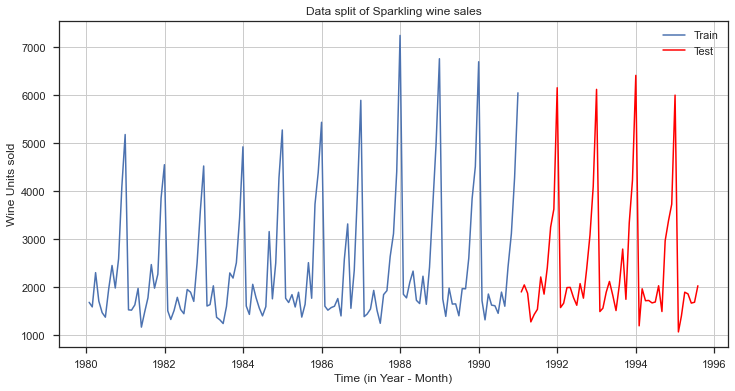

In [696]:
plt.figure(figsize = (12, 6))
plt.plot(train['Sparkling_Wine_Sales'], label = 'Train')
plt.plot(test['Sparkling_Wine_Sales'], label = 'Test', color='Red')
plt.legend(loc='best')
plt.xlabel('Time (in Year - Month)')
plt.ylabel('Wine Units sold')
plt.title('Data split of Sparkling wine sales', fontsize = 12)
plt.show;
plt.grid();


## 4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.

## Model 1: Linear Regression

In [697]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+len(train)+1 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('\n')
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]


Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [698]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [699]:
LinearRegression_train['Time'] = train_time
LinearRegression_test['Time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling_Wine_Sales  Time
Time_Stamp                            
1980-01-31                  1686     1
1980-02-29                  1591     2
1980-03-31                  2304     3
1980-04-30                  1712     4
1980-05-31                  1471     5 

Last few rows of Training Data 
             Sparkling_Wine_Sales  Time
Time_Stamp                            
1990-08-31                  1605   128
1990-09-30                  2424   129
1990-10-31                  3116   130
1990-11-30                  4286   131
1990-12-31                  6047   132 

First few rows of Test Data 
             Sparkling_Wine_Sales  Time
Time_Stamp                            
1991-01-31                  1902   133
1991-02-28                  2049   134
1991-03-31                  1874   135
1991-04-30                  1279   136
1991-05-31                  1432   137 

Last few rows of Test Data 
             Sparkling_Wine_Sales  Time
Time_Stamp

Now that our training and test data has been modified, let us go ahead use $\underline{Linear Regression}$ to build the model on the training data and test the model on the test data.

In [700]:
from sklearn.linear_model import LinearRegression

In [701]:
lr = LinearRegression()

In [702]:
lr.fit(LinearRegression_train[['Time']],LinearRegression_train['Sparkling_Wine_Sales'].values)

LinearRegression()

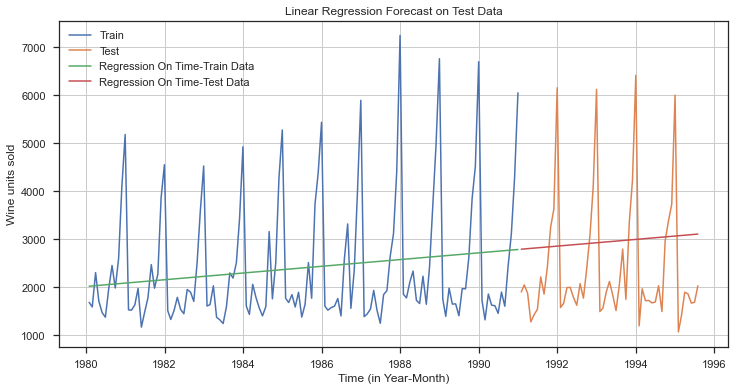

In [703]:
test_predictions_model1 = lr.predict(LinearRegression_test[['Time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

train_predictions_model1 = lr.predict(LinearRegression_train[['Time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

plt.figure(figsize=(12,6))
plt.title('Linear Regression Forecast on Test Data')
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine units sold')
plt.plot( train['Sparkling_Wine_Sales'], label='Train')
plt.plot(test['Sparkling_Wine_Sales'], label='Test')
plt.plot(LinearRegression_train['RegOnTime'], label='Regression On Time-Train Data')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time-Test Data')
plt.legend(loc='best')
plt.grid();

### Model evaluation - Linear Regression

In [704]:
# Test Data - RMSE

rmse_LR_test = metrics.mean_squared_error(test['Sparkling_Wine_Sales'],LinearRegression_test['RegOnTime'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_LR_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1389.135


In [705]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_LR_test]},index=['Linear Regression'])
resultsDf

Test RMSE
Linear Regression  1389.135175

## Model 2: Naive Forecast ($\hat{y}_{t+1} = y_t$)

#### For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [706]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [707]:
#Taking the last value in the train data
NaiveModel_test['naive'] = np.asarray(train['Sparkling_Wine_Sales'])[len(np.asarray(train['Sparkling_Wine_Sales']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
Name: naive, dtype: int64

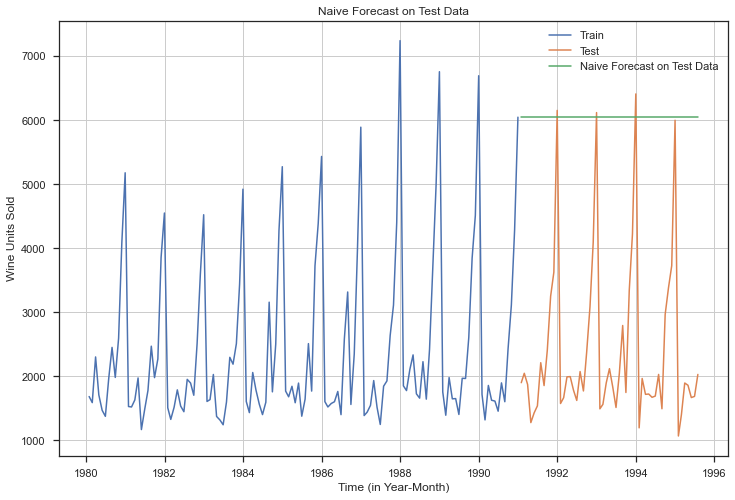

In [708]:
plt.figure(figsize=(12,8))
plt.title('Naive Forecast on Test Data')
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.plot(NaiveModel_train['Sparkling_Wine_Sales'], label='Train')
plt.plot(test['Sparkling_Wine_Sales'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.grid();

### Model Evauation - Naive Forecast Model

In [709]:
# Testing Data - RMSE and MAPE

rmse_Naive_test = metrics.mean_squared_error(test['Sparkling_Wine_Sales'],NaiveModel_test['naive'],squared=False)
print("For Naive forecast on the Testing Data:  RMSE is %3.3f " %(rmse_Naive_test))


For Naive forecast on the Testing Data:  RMSE is 3864.279 


In [710]:
resultsDf2 = pd.DataFrame({'Test RMSE': [rmse_Naive_test]},index=['Naive Model'])

resultsDf = pd.concat([resultsDf, resultsDf2])
resultsDf

Test RMSE
Linear Regression  1389.135175
Naive Model        3864.279352

## Method 3: Simple Average

### For this particular simple average method, we will forecast by using the average of the training values.

In [711]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [712]:
SimpleAverage_test['mean_forecast'] = train['Sparkling_Wine_Sales'].mean()
SimpleAverage_test.head()

Sparkling_Wine_Sales  mean_forecast
Time_Stamp                                     
1991-01-31                  1902    2403.780303
1991-02-28                  2049    2403.780303
1991-03-31                  1874    2403.780303
1991-04-30                  1279    2403.780303
1991-05-31                  1432    2403.780303

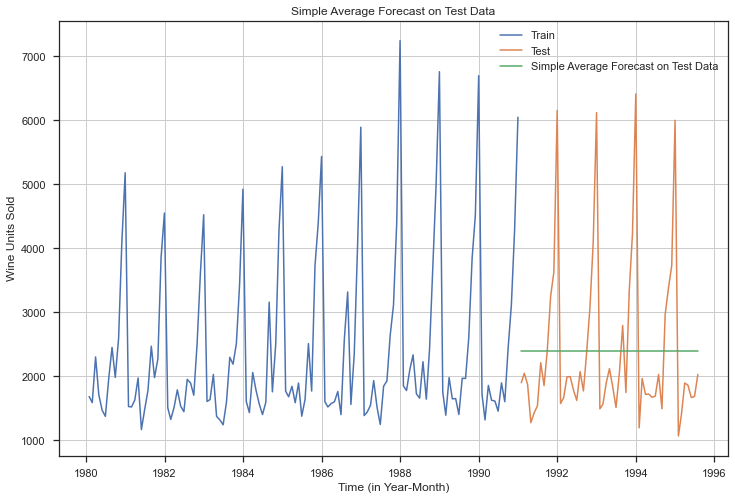

In [713]:
plt.figure(figsize=(12,8))
plt.title('Simple Average Forecast on Test Data')
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.plot(SimpleAverage_train['Sparkling_Wine_Sales'], label='Train')
plt.plot(SimpleAverage_test['Sparkling_Wine_Sales'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average Forecast on Test Data')
plt.legend(loc='best')
plt.grid();

### Model Evauation - Simple Average Model

In [714]:
## Test Data - RMSE 

rmse_simple_average_test = metrics.mean_squared_error(test['Sparkling_Wine_Sales'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_simple_average_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082


In [715]:
resultsDf3 = pd.DataFrame({'Test RMSE': [rmse_simple_average_test]},index=['Simple Average'])

resultsDf = pd.concat([resultsDf, resultsDf3])
resultsDf

Test RMSE
Linear Regression  1389.135175
Naive Model        3864.279352
Simple Average     1275.081804

## Model 4: Moving Average (MA)

### For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

#### For Moving Average, we are going to average over the entire data.

In [716]:
MovingAverage = df.copy()
MovingAverage.head()

Sparkling_Wine_Sales
Time_Stamp                      
1980-01-31                  1686
1980-02-29                  1591
1980-03-31                  2304
1980-04-30                  1712
1980-05-31                  1471

#### Trailing moving averages

In [717]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling_Wine_Sales'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling_Wine_Sales'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling_Wine_Sales'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling_Wine_Sales'].rolling(9).mean()

MovingAverage.head(9)

Sparkling_Wine_Sales  Trailing_2  Trailing_4   Trailing_6  \
Time_Stamp                                                              
1980-01-31                  1686         NaN         NaN          NaN   
1980-02-29                  1591      1638.5         NaN          NaN   
1980-03-31                  2304      1947.5         NaN          NaN   
1980-04-30                  1712      2008.0     1823.25          NaN   
1980-05-31                  1471      1591.5     1769.50          NaN   
1980-06-30                  1377      1424.0     1716.00  1690.166667   
1980-07-31                  1966      1671.5     1631.50  1736.833333   
1980-08-31                  2453      2209.5     1816.75  1880.500000   
1980-09-30                  1984      2218.5     1945.00  1827.166667   

             Trailing_9  
Time_Stamp               
1980-01-31          NaN  
1980-02-29          NaN  
1980-03-31          NaN  
1980-04-30          NaN  
1980-05-31          NaN  
1980-06-30          NaN  
1980-07-31          NaN  
1980-08-31          NaN  
1980-09-30  1838.222222

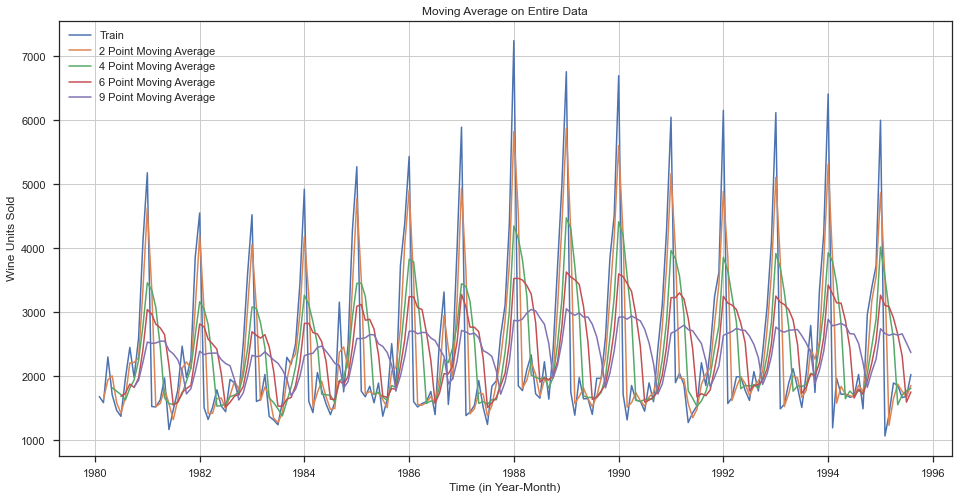

In [718]:
#Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sparkling_Wine_Sales'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')
plt.title('Moving Average on Entire Data')
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.legend(loc = 'best')
plt.grid();

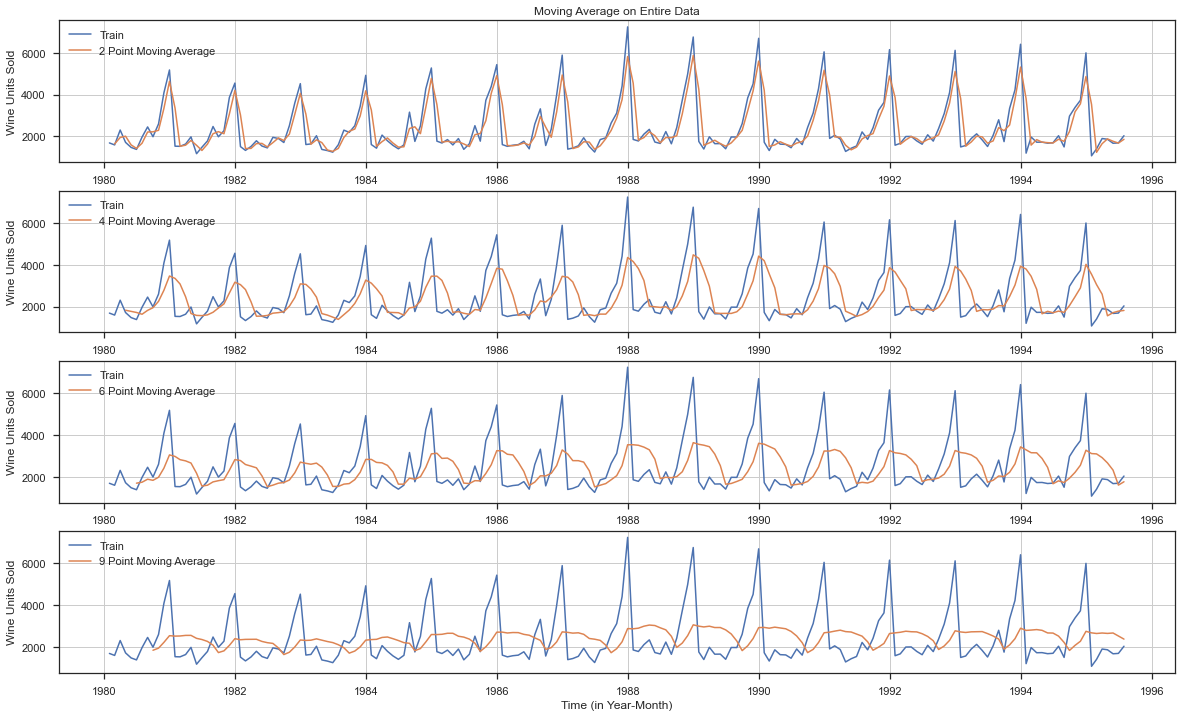

In [719]:
#Plotting on the whole data separately

plt.figure(figsize=(20,12))


plt.subplot(4,1,1)
plt.plot(MovingAverage['Sparkling_Wine_Sales'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.title('Moving Average on Entire Data')
plt.ylabel('Wine Units Sold')
plt.legend(loc = 'best')
plt.grid();

plt.subplot(4,1,2)
plt.plot(MovingAverage['Sparkling_Wine_Sales'], label='Train')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.ylabel('Wine Units Sold')
plt.legend(loc = 'best')
plt.grid();

plt.subplot(4,1,3)
plt.plot(MovingAverage['Sparkling_Wine_Sales'], label='Train')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.ylabel('Wine Units Sold')
plt.legend(loc = 'best')
plt.grid();

plt.subplot(4,1,4)
plt.plot(MovingAverage['Sparkling_Wine_Sales'], label='Train')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')
plt.ylabel('Wine Units Sold')
plt.xlabel('Time (in Year-Month)')
plt.legend(loc = 'best')

plt.grid();

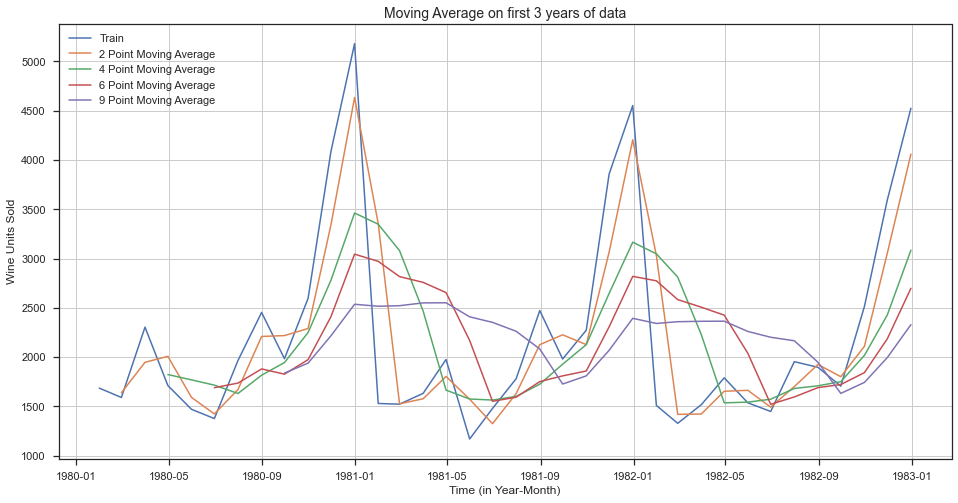

In [720]:
#Plotting on the first 3 years of data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sparkling_Wine_Sales'].iloc[:-151], label='Train')
plt.plot(MovingAverage['Trailing_2'].iloc[:-151], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'].iloc[:-151], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'].iloc[:-151],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'].iloc[:-151],label = '9 Point Moving Average')
plt.title('Moving Average on first 3 years of data',fontsize=14)
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.legend(loc = 'best')
plt.grid();

In [721]:
#Creating train and test set 
trailing_MovingAverage_train = MovingAverage[MovingAverage.index.year < 1991]
trailing_MovingAverage_test = MovingAverage[MovingAverage.index.year >= 1991]

Text(0.5, 1.0, 'Trailing Moving Average Forecast on Sparkling Wine Sales')

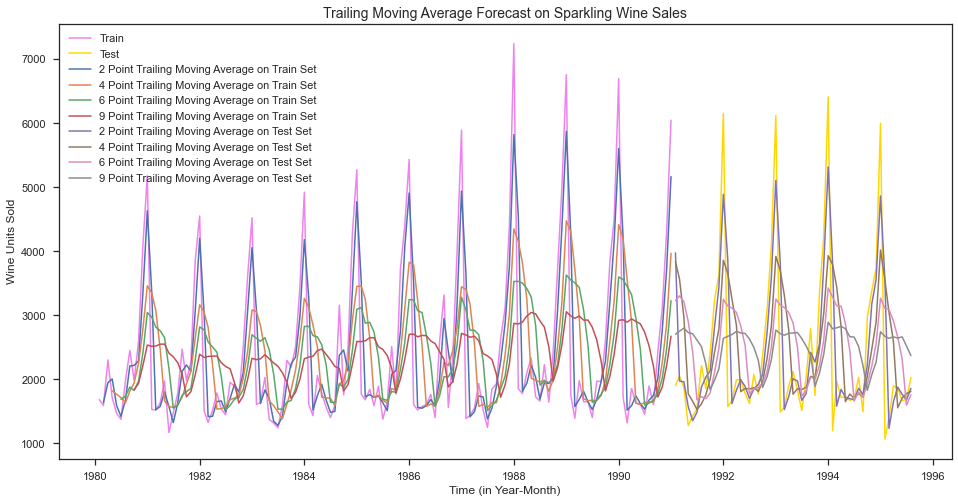

In [722]:
# Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling_Wine_Sales'], label='Train', color = 'violet')
plt.plot(trailing_MovingAverage_test['Sparkling_Wine_Sales'], label='Test', color = 'gold')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Train Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

plt.title("Trailing Moving Average Forecast on Sparkling Wine Sales", fontsize=14)

### Model Evauation - Moving Average

In [723]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_MA_test_2 = metrics.mean_squared_error(test['Sparkling_Wine_Sales'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_MA_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_MA_test_4 = metrics.mean_squared_error(test['Sparkling_Wine_Sales'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_MA_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_MA_test_6 = metrics.mean_squared_error(test['Sparkling_Wine_Sales'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_MA_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_MA_test_9 = metrics.mean_squared_error(test['Sparkling_Wine_Sales'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_MA_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1346.278


In [724]:
resultsDf4 = pd.DataFrame({'Test RMSE': [rmse_MA_test_2,rmse_MA_test_4
                                          ,rmse_MA_test_6,rmse_MA_test_9]
                            }
                           ,index=['2 point TMA','4 point TMA'
                                   ,'6 point TMA','9 point TMA'])

resultsDf = pd.concat([resultsDf, resultsDf4])
resultsDf

Test RMSE
Linear Regression  1389.135175
Naive Model        3864.279352
Simple Average     1275.081804
2 point TMA         813.400684
4 point TMA        1156.589694
6 point TMA        1283.927428
9 point TMA        1346.278315

### Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots.

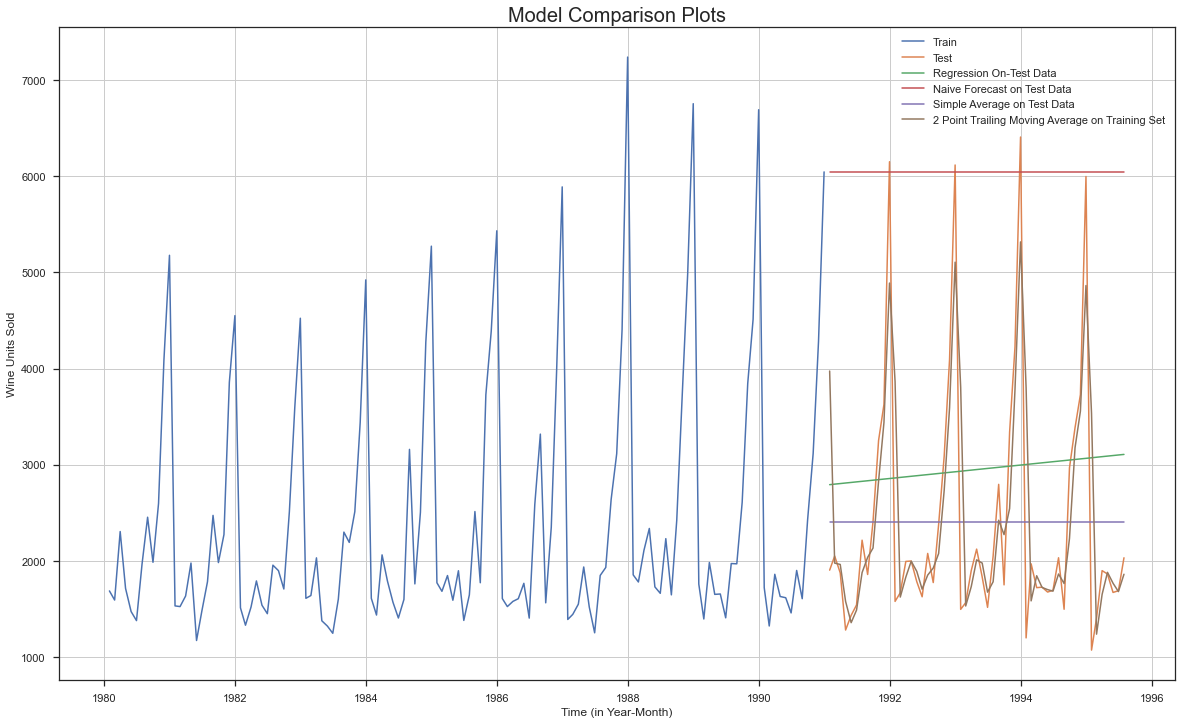

In [725]:
## Plotting on both Training and Test data

plt.figure(figsize=(20,12))
plt.plot(train['Sparkling_Wine_Sales'], label='Train')
plt.plot(test['Sparkling_Wine_Sales'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On-Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots",fontsize=20)
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.grid();

## Model 5: Simple Exponential Smoothing

In [726]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [727]:
SES_train = train.copy()
SES_test = test.copy()

In [728]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling_Wine_Sales'])

In [729]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

In [730]:
model_SES_autofit.params

{'smoothing_level': 0.04960736049406556,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 2151.614314422547,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [731]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

Sparkling_Wine_Sales      predict
Time_Stamp                                   
1991-01-31                  1902  2725.336037
1991-02-28                  2049  2725.336037
1991-03-31                  1874  2725.336037
1991-04-30                  1279  2725.336037
1991-05-31                  1432  2725.336037

Text(0, 0.5, 'Wine Units Sold')

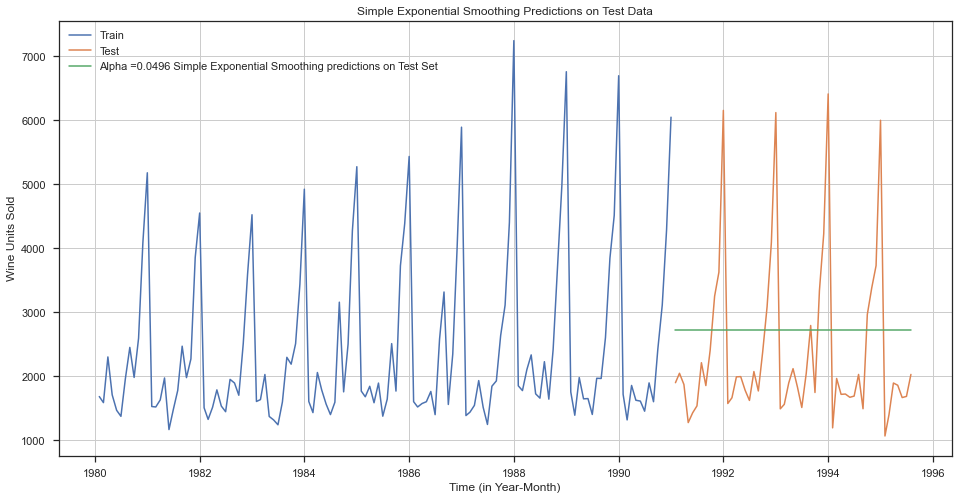

In [732]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling_Wine_Sales'], label='Train')
plt.plot(SES_test['Sparkling_Wine_Sales'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.0496 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple Exponential Smoothing Predictions on Test Data');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

### Model Evaluation for $\alpha$ = 0.0496 : Simple Exponential Smoothing

In [733]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Sparkling_Wine_Sales'],SES_test['predict'],squared=False)
print("For Alpha =0.0496 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))


For Alpha =0.0496 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1316.135


In [734]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha =0.0496,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE
Linear Regression                         1389.135175
Naive Model                               3864.279352
Simple Average                            1275.081804
2 point TMA                                813.400684
4 point TMA                               1156.589694
6 point TMA                               1283.927428
9 point TMA                               1346.278315
Alpha =0.0496,SimpleExponentialSmoothing  1316.135411

#### Setting different alpha values.

###### Remember, the higher the alpha value more weightage is given to the more recent observation. That means, what happened recently will happen again.


#### We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.

In [735]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [736]:
for i in np.arange(0.1,1,0.05):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(test))
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Sparkling_Wine_Sales'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Sparkling_Wine_Sales'],SES_test['predict',i],squared=False)
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

In [737]:
resultsDf_6.sort_values(by=['Test RMSE'],ascending=True)

Alpha Values   Train RMSE    Test RMSE
0           0.10  1333.873836  1375.393398
1           0.15  1347.521016  1466.203651
2           0.20  1356.042987  1595.206839
3           0.25  1359.701408  1755.488175
4           0.30  1359.511747  1935.507132
5           0.35  1356.733677  2123.914871
6           0.40  1352.588879  2311.919615
7           0.45  1348.095362  2493.786514
8           0.50  1344.004369  2666.351413
9           0.55  1340.811249  2828.246418
10          0.60  1338.805381  2979.204388
11          0.65  1338.131249  3119.560885
12          0.70  1338.844308  3249.944092
13          0.75  1340.955212  3371.100106
14          0.80  1344.462091  3483.801006
15          0.85  1349.373283  3588.797654
16          0.90  1355.723518  3686.794285
17          0.95  1363.586057  3778.432623

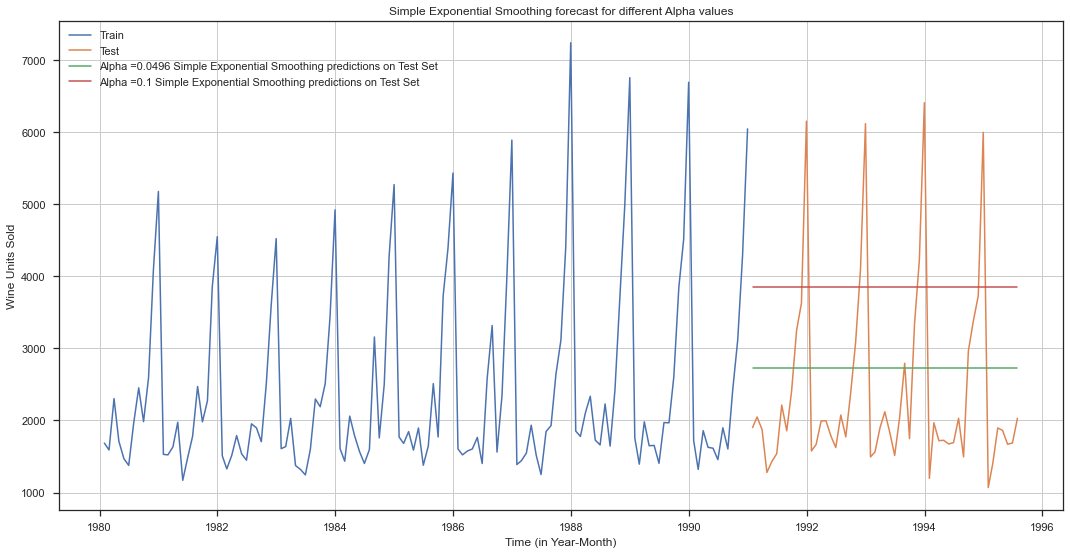

In [738]:
## Plotting on both the Training and Test data
model_SES_alpha_i = model_SES.fit(smoothing_level=0.3,optimized=False,use_brute=True)
SES_train['predict',0.1] = model_SES_alpha_i.fittedvalues
SES_test['predict',0.1] = model_SES_alpha_i.forecast(steps=len(test))

plt.figure(figsize=(18,9))
plt.plot(SES_train['Sparkling_Wine_Sales'], label='Train')
plt.plot(SES_test['Sparkling_Wine_Sales'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.0496 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict',0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.title('Simple Exponential Smoothing forecast for different Alpha values')
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.grid();

## Method 6: Double Exponential Smoothing (Holt's Model)

### Two parameters $\alpha$ and $\beta$ are estimated in this model. Level and Trend are accounted for in this model.

In [739]:
DES_train = train.copy()
DES_test = test.copy()

In [740]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(DES_train)
# Fitting the model
model_DES = model_DES.fit(optimized=True, use_brute=True)

In [741]:
model_DES.params

{'smoothing_level': 0.6885714285714285,
 'smoothing_trend': 9.999999999999999e-05,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1686.0,
 'initial_trend': -95.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [742]:
# Forecasting using this model for the test set
DES_test['predict'] =  model_DES.forecast(len(test))
DES_test['predict']

Time_Stamp
1991-01-31    5221.278699
1991-02-28    5127.886554
1991-03-31    5034.494409
1991-04-30    4941.102264
1991-05-31    4847.710119
1991-06-30    4754.317974
1991-07-31    4660.925829
1991-08-31    4567.533684
1991-09-30    4474.141539
1991-10-31    4380.749394
1991-11-30    4287.357249
1991-12-31    4193.965104
1992-01-31    4100.572959
1992-02-29    4007.180813
1992-03-31    3913.788668
1992-04-30    3820.396523
1992-05-31    3727.004378
1992-06-30    3633.612233
1992-07-31    3540.220088
1992-08-31    3446.827943
1992-09-30    3353.435798
1992-10-31    3260.043653
1992-11-30    3166.651508
1992-12-31    3073.259363
1993-01-31    2979.867218
1993-02-28    2886.475073
1993-03-31    2793.082928
1993-04-30    2699.690783
1993-05-31    2606.298638
1993-06-30    2512.906493
1993-07-31    2419.514348
1993-08-31    2326.122203
1993-09-30    2232.730058
1993-10-31    2139.337913
1993-11-30    2045.945768
1993-12-31    1952.553623
1994-01-31    1859.161478
1994-02-28    1765.769333
1

Text(0, 0.5, 'Wine Units Sold')

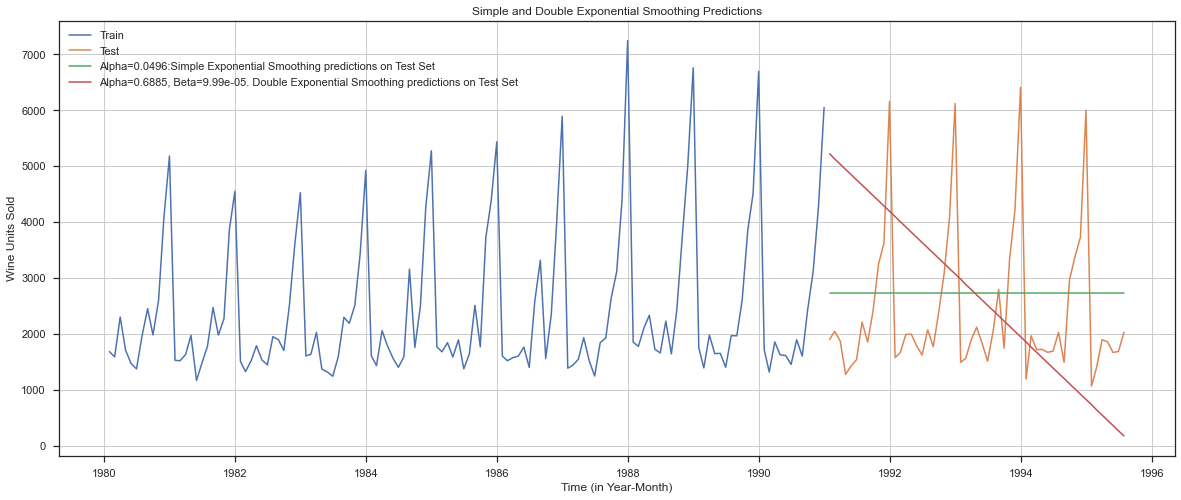

In [743]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(DES_train, label='Train')
plt.plot(DES_test['Sparkling_Wine_Sales'], label='Test')

plt.plot(SES_test['predict'], label='Alpha=0.0496:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_test['predict'], label='Alpha=0.6885, Beta=9.99e-05. Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

### Model Evaluation - Double Exponential Smoothing(Holt's Model)

In [744]:
rmse_DES_test = metrics.mean_squared_error(DES_test['Sparkling_Wine_Sales'],DES_test['predict'],squared=False)
print("For DES forecast on the Sparkling Testing Data:  RMSE is %3.3f" %(rmse_DES_test))

For DES forecast on the Sparkling Testing Data:  RMSE is 2007.239


In [745]:
resultsDf_6 = pd.DataFrame({'Test RMSE': [rmse_DES_test]},index=['Alpha=0.6885, Beta=9.99e-05, Double Exponential Smoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6])
resultsDf

Test RMSE
Linear Regression                                   1389.135175
Naive Model                                         3864.279352
Simple Average                                      1275.081804
2 point TMA                                          813.400684
4 point TMA                                         1156.589694
6 point TMA                                         1283.927428
9 point TMA                                         1346.278315
Alpha =0.0496,SimpleExponentialSmoothing            1316.135411
Alpha=0.6885, Beta=9.99e-05, Double Exponential...  2007.238526

In [746]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha':[],'Beta':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

Empty DataFrame
Columns: [Alpha, Beta, Train RMSE, Test RMSE]
Index: []

In [747]:
model_DES = Holt(DES_train['Sparkling_Wine_Sales'])
for i in np.arange(0.05,1.05,0.05):
    for j in np.arange(0.05,1.05,0.05):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(len(test))
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Sparkling_Wine_Sales'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Sparkling_Wine_Sales'],DES_test['predict',i,j],squared=False)
        
        resultsDf_6 = resultsDf_6.append({'Alpha':i,'Beta':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)

In [748]:
resultsDf_6

Alpha  Beta   Train RMSE     Test RMSE
0     0.05  0.05  1430.025526   1418.407668
1     0.05  0.10  1385.420826   1466.899629
2     0.05  0.15  1379.162520   1457.041594
3     0.05  0.20  1382.766405   1443.099273
4     0.05  0.25  1390.407645   1550.422496
..     ...   ...          ...           ...
395   1.00  0.80  1902.013709  55442.273880
396   1.00  0.85  1942.749655  56677.130498
397   1.00  0.90  1985.368445  57823.177011
398   1.00  0.95  2030.204345  58888.482146
399   1.00  1.00  2077.672157  59877.076519

[400 rows x 4 columns]

In [749]:
resultsDf_6.sort_values(by=['Test RMSE']).head()

Alpha  Beta   Train RMSE    Test RMSE
0   0.05  0.05  1430.025526  1418.407668
3   0.05  0.20  1382.766405  1443.099273
2   0.05  0.15  1379.162520  1457.041594
1   0.05  0.10  1385.420826  1466.899629
6   0.05  0.35  1414.226231  1547.022626

We can see that alpha=0.05, beta=0.05 model has given us lower test RMSE than the previous model built.

Text(0, 0.5, 'Wine Units Sold')

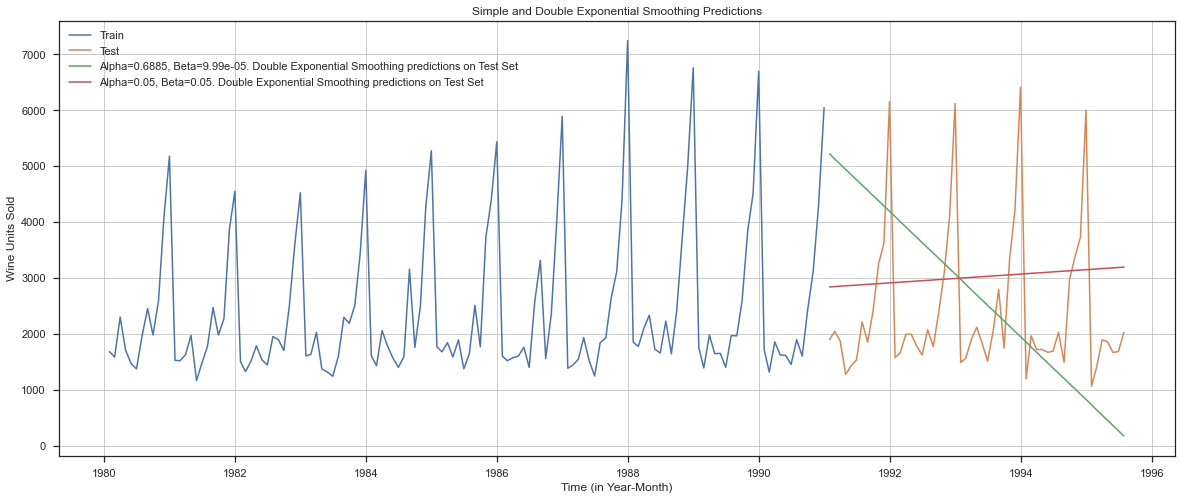

In [750]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(DES_train['Sparkling_Wine_Sales'], label='Train')
plt.plot(DES_test['Sparkling_Wine_Sales'], label='Test')

plt.plot(DES_test['predict'], label='Alpha=0.6885, Beta=9.99e-05. Double Exponential Smoothing predictions on Test Set')
plt.plot(DES_test['predict',0.05,0.05], label='Alpha=0.05, Beta=0.05. Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

In [751]:
DES_Model2_rmse = float(resultsDf_6[(resultsDf_6['Alpha']==0.05) & (resultsDf_6['Beta']==0.05)]['Test RMSE'])
DES_Model2_rmse

1418.4076682004925

In [752]:
resultsDf_6 = pd.DataFrame({'Test RMSE': [DES_Model2_rmse]},index=['Alpha=0.05, Beta=0.05, Double Exponential Smoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6])
resultsDf

Test RMSE
Linear Regression                                   1389.135175
Naive Model                                         3864.279352
Simple Average                                      1275.081804
2 point TMA                                          813.400684
4 point TMA                                         1156.589694
6 point TMA                                         1283.927428
9 point TMA                                         1346.278315
Alpha =0.0496,SimpleExponentialSmoothing            1316.135411
Alpha=0.6885, Beta=9.99e-05, Double Exponential...  2007.238526
Alpha=0.05, Beta=0.05, Double Exponential Smoot...  1418.407668

## Method 7: Triple Exponential Smoothing (Holt - Winter's Model)

##### Three parameters $\alpha$, $\beta$ and $\gamma$ are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [753]:
TES_train = train.copy()
TES_test = test.copy()

In [754]:
model_TES = ExponentialSmoothing(TES_train['Sparkling_Wine_Sales'],trend='additive',seasonal='multiplicative',freq='M')

In [755]:
model_TES_autofit = model_TES.fit(optimized=True)

The above fit of the model is by the best parameters that Python thinks for the model. It uses a brute force method to choose the parameters.

In [756]:
model_TES_autofit.params

{'smoothing_level': 0.11108840858679117,
 'smoothing_trend': 0.061712060020663685,
 'smoothing_seasonal': 0.3950814802151603,
 'damping_trend': nan,
 'initial_level': 1639.9088356475902,
 'initial_trend': -11.928143593549056,
 'initial_seasons': array([1.05065032, 1.02086214, 1.41078482, 1.20263518, 0.97315225,
        0.96689379, 1.31724304, 1.70471609, 1.37289733, 1.81035002,
        2.83962708, 3.60997333]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [757]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

Sparkling_Wine_Sales  auto_predict
Time_Stamp                                    
1991-01-31                  1902   1577.208163
1991-02-28                  2049   1333.663154
1991-03-31                  1874   1745.977341
1991-04-30                  1279   1630.435405
1991-05-31                  1432   1523.306429

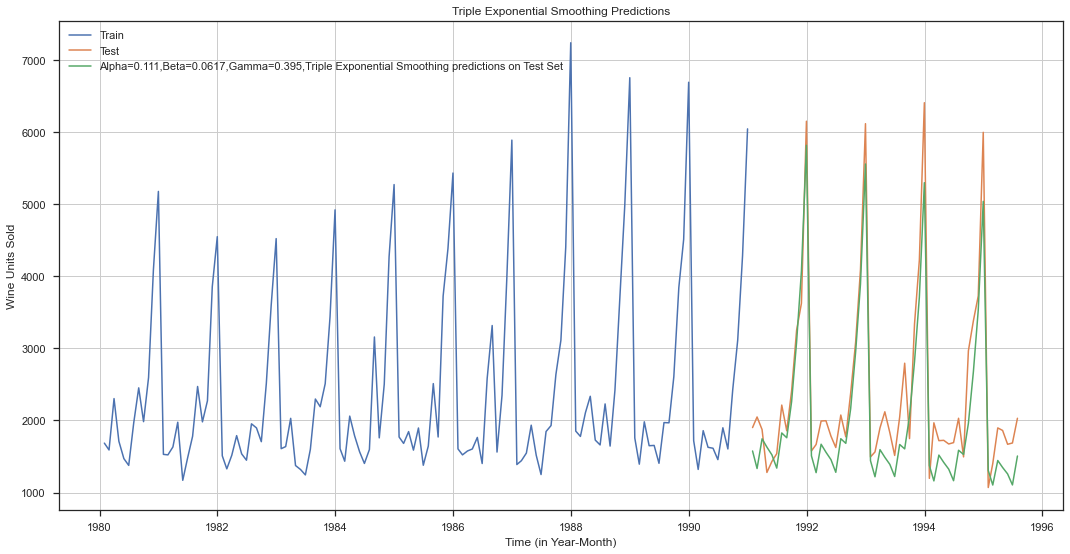

In [758]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling_Wine_Sales'], label='Train')
plt.plot(TES_test['Sparkling_Wine_Sales'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.111,Beta=0.0617,Gamma=0.395,Triple Exponential Smoothing predictions on Test Set')


plt.legend(loc='best')
plt.title('Triple Exponential Smoothing Predictions');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.grid();

In [759]:
## Test Data

rmse_tes_test = metrics.mean_squared_error(TES_test['Sparkling_Wine_Sales'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.111,Beta=0.0617,Gamma=0.395, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_tes_test))

For Alpha=0.111,Beta=0.0617,Gamma=0.395, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 469.659


In [760]:
resultsDf_7 = pd.DataFrame({'Test RMSE': [rmse_tes_test]}
                           ,index=['Alpha=0.111,Beta=0.0617,Gamma=0.395,Triple Exponential Smoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7])
resultsDf

Test RMSE
Linear Regression                                   1389.135175
Naive Model                                         3864.279352
Simple Average                                      1275.081804
2 point TMA                                          813.400684
4 point TMA                                         1156.589694
6 point TMA                                         1283.927428
9 point TMA                                         1346.278315
Alpha =0.0496,SimpleExponentialSmoothing            1316.135411
Alpha=0.6885, Beta=9.99e-05, Double Exponential...  2007.238526
Alpha=0.05, Beta=0.05, Double Exponential Smoot...  1418.407668
Alpha=0.111,Beta=0.0617,Gamma=0.395,Triple Expo...   469.659106

Calculating the performance metrics for different values of alpha, beta and gamma

In [761]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha':[],'Beta':[],'Gamma':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

Empty DataFrame
Columns: [Alpha, Beta, Gamma, Train RMSE, Test RMSE]
Index: []

In [762]:
for i in np.arange(0.1,1.05,0.05):
    for j in np.arange(0.1,1.05,0.05):
        for k in np.arange(0.1,1.05,0.05):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Sparkling_Wine_Sales'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['Sparkling_Wine_Sales'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha':i,'Beta':j,'Gamma':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

In [763]:
resultsDf_8_2

Alpha  Beta  Gamma    Train RMSE     Test RMSE
0       0.1   0.1   0.10  3.883520e+02  5.799963e+02
1       0.1   0.1   0.15  3.788839e+02  6.002333e+02
2       0.1   0.1   0.20  3.720023e+02  6.174690e+02
3       0.1   0.1   0.25  3.672256e+02  6.303269e+02
4       0.1   0.1   0.30  3.642221e+02  6.387802e+02
...     ...   ...    ...           ...           ...
6854    1.0   1.0   0.80  1.021970e+05  5.010607e+06
6855    1.0   1.0   0.85  4.247079e+06  8.577302e+06
6856    1.0   1.0   0.90  7.792429e+04  4.318265e+05
6857    1.0   1.0   0.95  4.194122e+05  9.549113e+05
6858    1.0   1.0   1.00  2.399174e+05  1.254280e+05

[6859 rows x 5 columns]

In [764]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

Alpha  Beta  Gamma  Train RMSE   Test RMSE
1807   0.35  0.10   0.20  386.330654  319.498680
2169   0.40  0.10   0.25  388.427700  320.164138
1827   0.35  0.15   0.25  390.553942  325.137234
115    0.10  0.40   0.15  417.294618  325.324779
1465   0.30  0.15   0.20  389.444578  326.258972

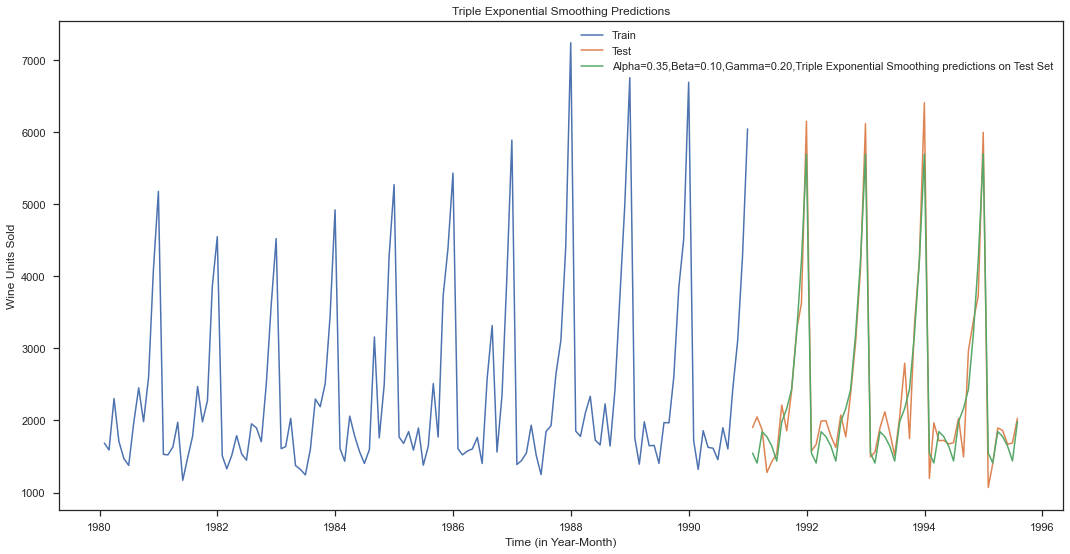

In [765]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination
model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=0.35,smoothing_trend=0.10,smoothing_seasonal=0.20,optimized=False,use_brute=True)
TES_train['predict',0.35,0.10,0.20] = model_TES_alpha_i_j_k.fittedvalues
TES_test['predict',0.35,0.10,0.20] = model_TES_alpha_i_j_k.forecast(steps=len(test))
rmse_tes_test_lowest = metrics.mean_squared_error(TES_test['Sparkling_Wine_Sales'],TES_test['predict',0.35,0.10,0.20],squared=False)

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling_Wine_Sales'], label='Train')
plt.plot(TES_test['Sparkling_Wine_Sales'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.35,0.10,0.20], label='Alpha=0.35,Beta=0.10,Gamma=0.20,Triple Exponential Smoothing predictions on Test Set')


plt.legend(loc='best')
plt.title('Triple Exponential Smoothing Predictions');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.grid();
plt.grid();

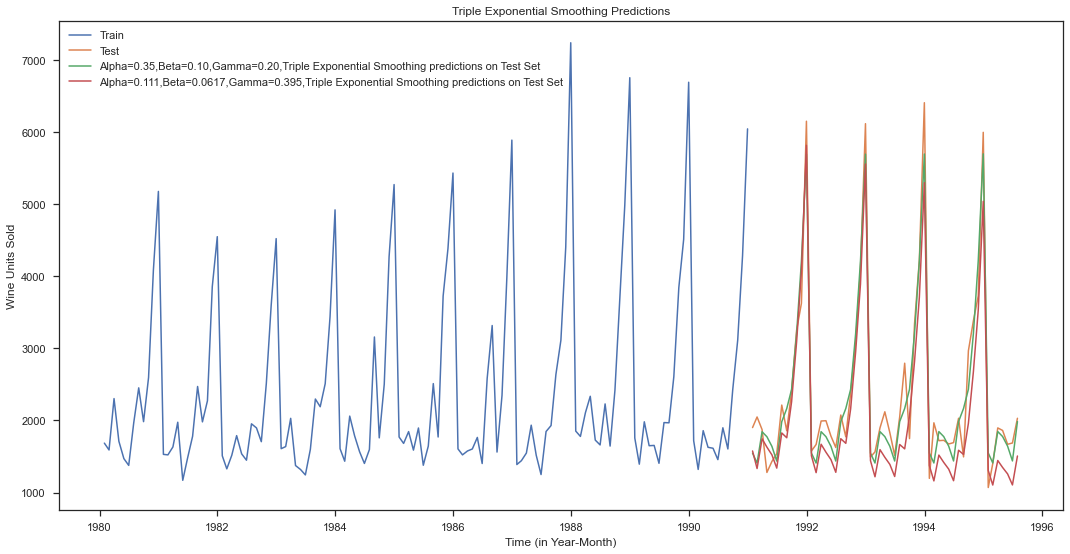

In [766]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination
model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=0.35,smoothing_trend=0.10,smoothing_seasonal=0.20,optimized=False,use_brute=True)
TES_train['predict',0.35,0.10,0.20] = model_TES_alpha_i_j_k.fittedvalues
TES_test['predict',0.35,0.10,0.20] = model_TES_alpha_i_j_k.forecast(steps=len(test))
rmse_tes_test_lowest = metrics.mean_squared_error(TES_test['Sparkling_Wine_Sales'],TES_test['predict',0.35,0.10,0.20],squared=False)

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling_Wine_Sales'], label='Train')
plt.plot(TES_test['Sparkling_Wine_Sales'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.35,0.10,0.20], label='Alpha=0.35,Beta=0.10,Gamma=0.20,Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_test['auto_predict'], label='Alpha=0.111,Beta=0.0617,Gamma=0.395,Triple Exponential Smoothing predictions on Test Set')


plt.legend(loc='best')
plt.title('Triple Exponential Smoothing Predictions');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.grid();
plt.grid();

In [767]:
resultsDf_8 = pd.DataFrame({'Test RMSE': [rmse_tes_test_lowest]}
                           ,index=['Alpha=0.35,Beta=0.10,Gamma=0.20,Triple Exponential Smoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8])
resultsDf

Test RMSE
Linear Regression                                   1389.135175
Naive Model                                         3864.279352
Simple Average                                      1275.081804
2 point TMA                                          813.400684
4 point TMA                                         1156.589694
6 point TMA                                         1283.927428
9 point TMA                                         1346.278315
Alpha =0.0496,SimpleExponentialSmoothing            1316.135411
Alpha=0.6885, Beta=9.99e-05, Double Exponential...  2007.238526
Alpha=0.05, Beta=0.05, Double Exponential Smoot...  1418.407668
Alpha=0.111,Beta=0.0617,Gamma=0.395,Triple Expo...   469.659106
Alpha=0.35,Beta=0.10,Gamma=0.20,Triple Exponent...   319.498680

In [768]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE
Alpha=0.35,Beta=0.10,Gamma=0.20,Triple Exponent...   319.498680
Alpha=0.111,Beta=0.0617,Gamma=0.395,Triple Expo...   469.659106
2 point TMA                                          813.400684
4 point TMA                                         1156.589694
Simple Average                                      1275.081804
6 point TMA                                         1283.927428
Alpha =0.0496,SimpleExponentialSmoothing            1316.135411
9 point TMA                                         1346.278315
Linear Regression                                   1389.135175
Alpha=0.05, Beta=0.05, Double Exponential Smoot...  1418.407668
Alpha=0.6885, Beta=9.99e-05, Double Exponential...  2007.238526
Naive Model                                         3864.279352

For this data, we had both trend and seasonality so by definition Triple Exponential Smoothing is supposed to work better than the Simple Exponential Smoothing as well as the Double Exponential Smoothing. However, since this was a model building exercise we had gone on to build different models on the data and have compared these model with the best RMSE value on the test data.

### We see that the best model is the Triple Exponential Smoothing with multiplicative seasonality with the parameters $\alpha$ = 0.35, $\beta$ = 0.10 and $\gamma$ = 0.20.

Text(0, 0.5, 'Wine Units Sold')

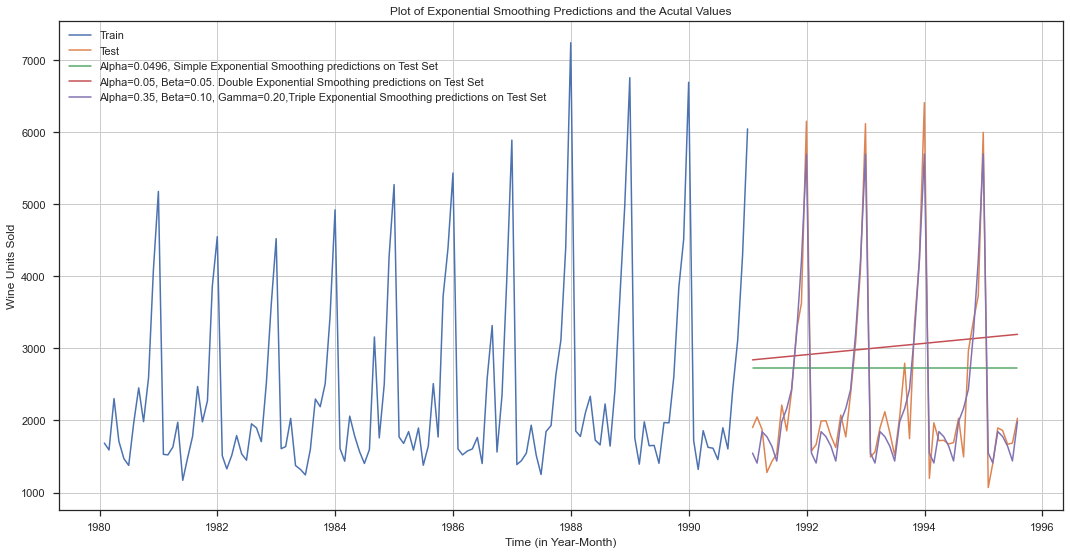

In [769]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Sparkling_Wine_Sales'], label='Train')
plt.plot(test['Sparkling_Wine_Sales'], label='Test')

plt.plot(SES_test['predict'], label='Alpha=0.0496, Simple Exponential Smoothing predictions on Test Set')

plt.plot(DES_test['predict',0.05,0.05], label='Alpha=0.05, Beta=0.05. Double Exponential Smoothing predictions on Test Set')

plt.plot(TES_test['predict', 0.35,0.10,0.20], label='Alpha=0.35, Beta=0.10, Gamma=0.20,Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

## 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

### Check for stationarity of the whole Time Series data.

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the $\alpha$ value.

In [770]:
from statsmodels.tsa.stattools import adfuller

In [771]:
print('Results of Dicky-Fuller Test')
dftest = adfuller(df,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

Results of Dicky-Fuller Test
DF test statistic is -1.798
DF test p-value is 0.7055958459932692
Number of lags used 12


We see that at 5% significant level the Time Series is non-stationary.Let us take one level of differencing to see whether the series becomes stationary.

In [772]:
print('Results of Dicky-Fuller Test with differencing')
dftest = adfuller(df.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

Results of Dicky-Fuller Test with differencing
DF test statistic is -44.912
DF test p-value is 0.0
Number of lags used 10


Now, let us go ahead and plot the stationary series.

Text(0.5, 0, 'Time (in Year-Month)')

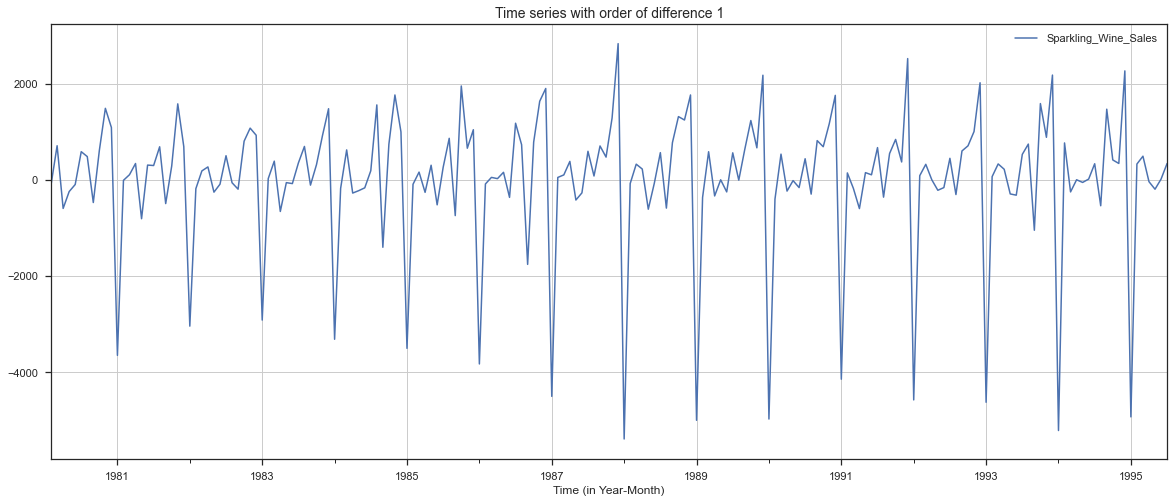

In [773]:
df.diff().dropna().plot(grid=True);
plt.title('Time series with order of difference 1', fontsize=14)
plt.xlabel('Time (in Year-Month)')

### Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

### ACF plot

Text(0, 0.5, 'Correlation')

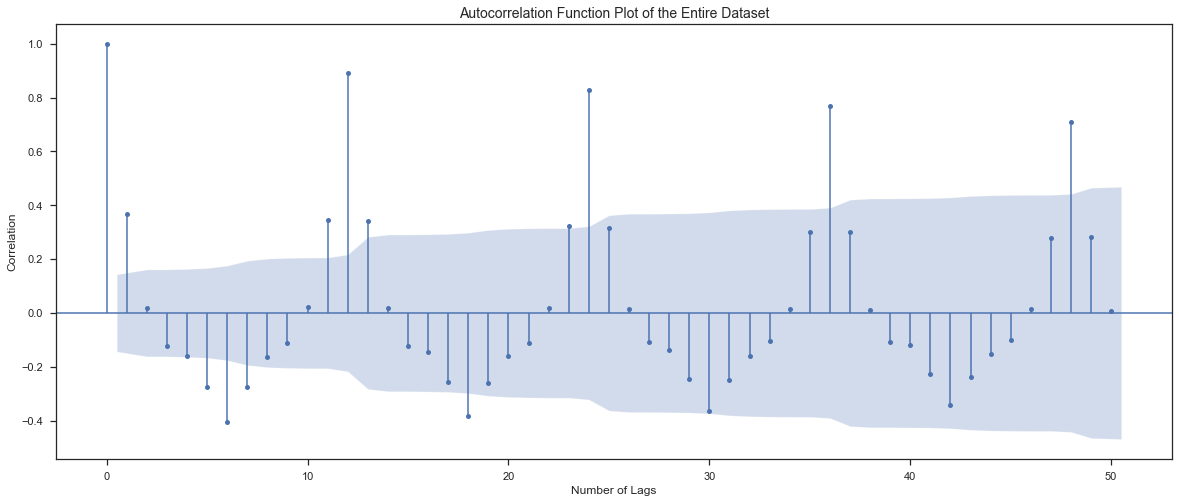

In [774]:
plot_acf(df,alpha=0.05,lags=50);
plt.title('Autocorrelation Function Plot of the Entire Dataset', fontsize=14)
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')

Text(0, 0.5, 'Correlation')

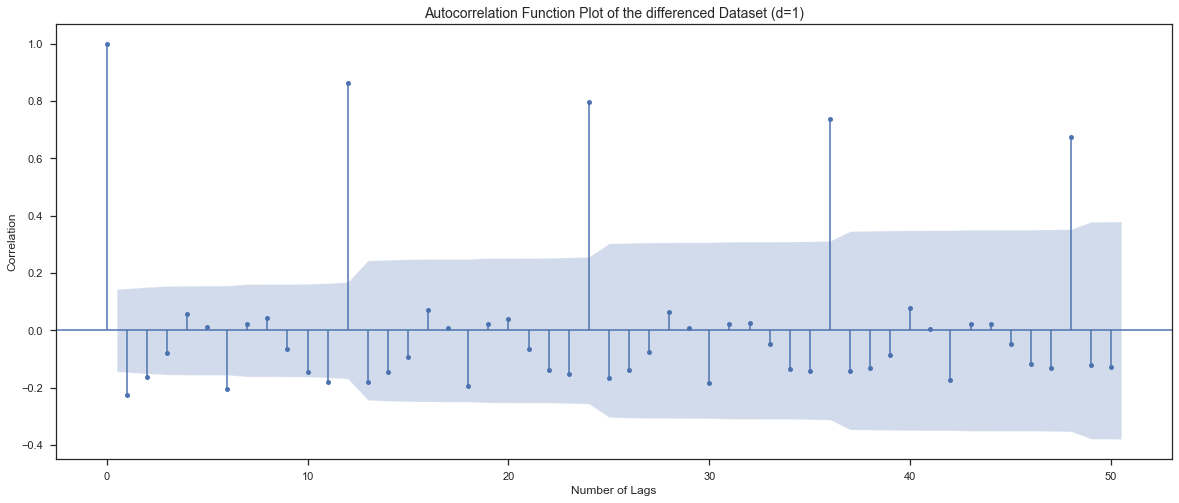

In [775]:
plot_acf(df.diff().dropna(),alpha=0.05,lags=50);
plt.title('Autocorrelation Function Plot of the differenced Dataset (d=1)', fontsize=14)
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')

### PACF plot

Text(0, 0.5, 'Correlation')

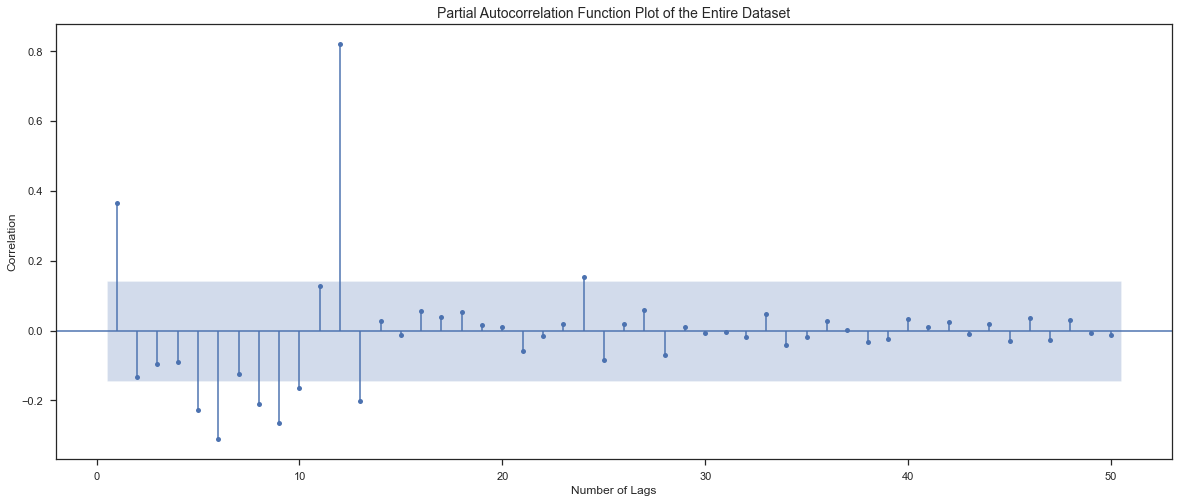

In [776]:
plot_pacf(df,zero=False,alpha=0.05,lags=50, method='ywmle');
plt.title('Partial Autocorrelation Function Plot of the Entire Dataset', fontsize=14)
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')

Text(0, 0.5, 'Correlation')

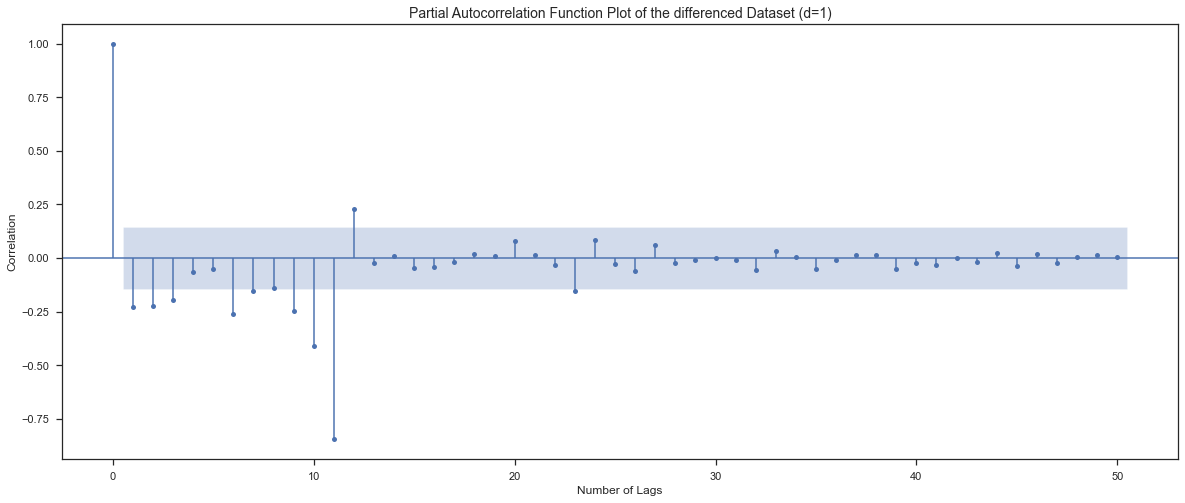

In [777]:
plot_pacf(df.diff().dropna(),alpha=0.05,lags=50,method='ywmle');
plt.title('Partial Autocorrelation Function Plot of the differenced Dataset (d=1)', fontsize=14)
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')

From the above plots, we can say that there seems to be a seasonality in the data.

In [778]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Sparkling_Wine_Sales
Time_Stamp                      
1980-01-31                  1686
1980-02-29                  1591
1980-03-31                  2304
1980-04-30                  1712
1980-05-31                  1471

Last few rows of Training Data


Sparkling_Wine_Sales
Time_Stamp                      
1990-08-31                  1605
1990-09-30                  2424
1990-10-31                  3116
1990-11-30                  4286
1990-12-31                  6047

First few rows of Test Data


Sparkling_Wine_Sales
Time_Stamp                      
1991-01-31                  1902
1991-02-28                  2049
1991-03-31                  1874
1991-04-30                  1279
1991-05-31                  1432

Last few rows of Test Data


Sparkling_Wine_Sales
Time_Stamp                      
1995-03-31                  1897
1995-04-30                  1862
1995-05-31                  1670
1995-06-30                  1688
1995-07-31                  2031

### Check for stationarity of the Training Data Time Series.

Let us plot the training data once.

Text(0, 0.5, 'Wine units sold')

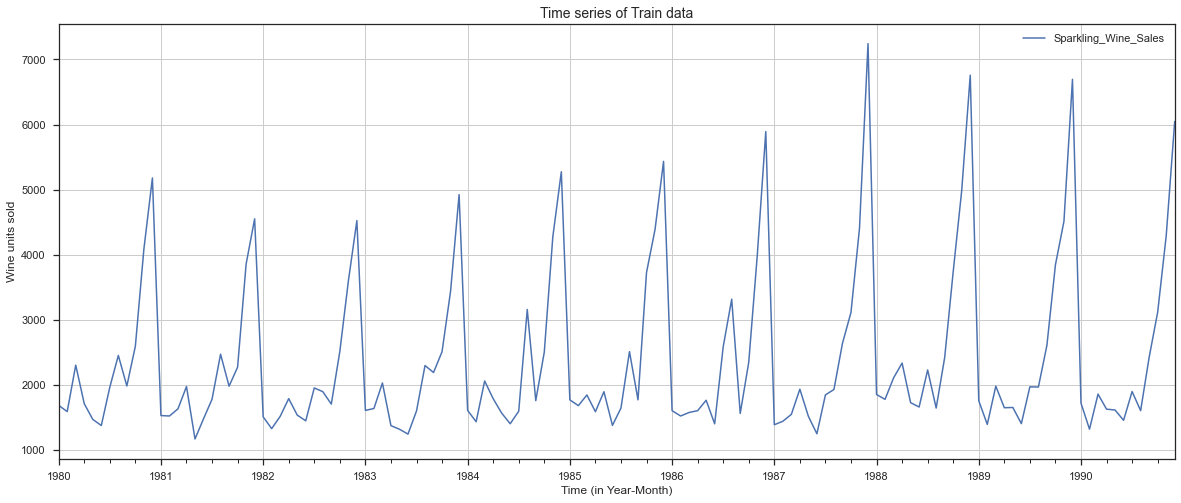

In [779]:
train.plot(grid=True);
plt.title('Time series of Train data', fontsize=14)
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine units sold')

In [780]:
print('Results of Dicky-Fuller Test on Train data')
dftest = adfuller(train,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

Results of Dicky-Fuller Test on Train data
DF test statistic is -2.062
DF test p-value is 0.5674110388593684
Number of lags used 12


The training data is non-stationary at 95% confidence level. Let us take a first level of differencing to stationarize the Time Series.

In [781]:
print('Results of Dicky-Fuller Test on Train data with differencing')
dftest = adfuller(train.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

Results of Dicky-Fuller Test on Train data with differencing
DF test statistic is -7.968
DF test p-value is 8.47921065551504e-11
Number of lags used 11


Now, let us go ahead and plot the differenced training data.

Text(0, 0.5, 'Wine units sold')

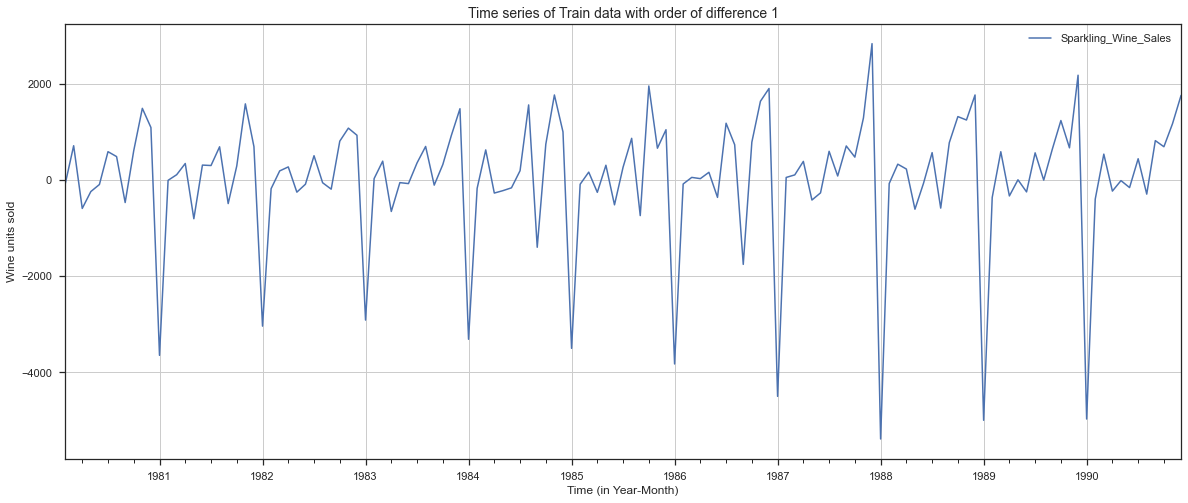

In [782]:
train.diff().dropna().plot(grid=True);
plt.title('Time series of Train data with order of difference 1', fontsize=14)
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine units sold')

In [783]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-31 to 1990-12-31
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Sparkling_Wine_Sales  132 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


Text(0, 0.5, 'Correlation')

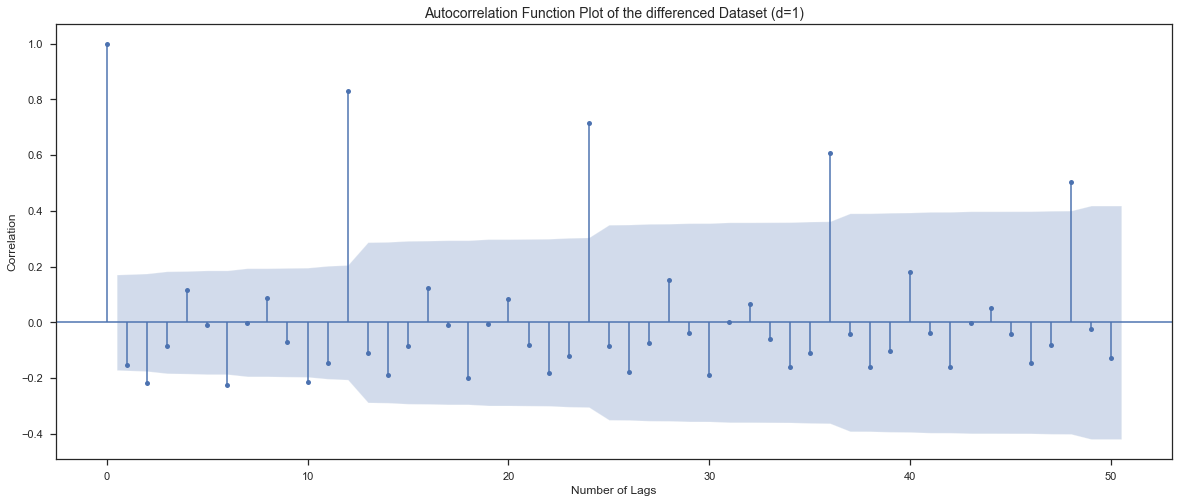

In [784]:
plot_acf(train.diff().dropna(),alpha=0.05,lags=50);
plt.title('Autocorrelation Function Plot of the differenced Dataset (d=1)', fontsize=14)
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')

Text(0, 0.5, 'Correlation')

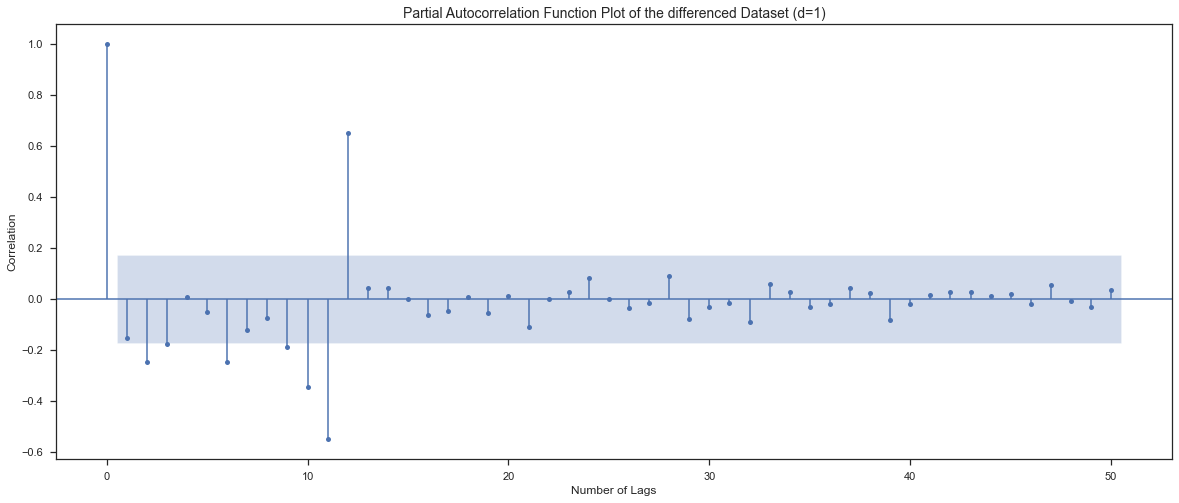

In [785]:
plot_pacf(train.diff().dropna(),alpha=0.05,lags=50,method='ywmle');
plt.title('Partial Autocorrelation Function Plot of the differenced Dataset (d=1)', fontsize=14)
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')

## 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

### ARIMA Model

In [786]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 5
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 5)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (0, 1, 4)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (1, 1, 4)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (2, 1, 4)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)
Model: (3, 1, 4)
Model: (4, 1, 0)
Model: (4, 1, 1)
Model: (4, 1, 2)
Model: (4, 1, 3)
Model: (4, 1, 4)


In [787]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [788]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['Sparkling_Wine_Sales'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.060015592223
ARIMA(0, 1, 2) - AIC:2234.4083231226628
ARIMA(0, 1, 3) - AIC:2233.994857735581
ARIMA(0, 1, 4) - AIC:2235.1737364706064
ARIMA(1, 1, 0) - AIC:2266.6085393190097
ARIMA(1, 1, 1) - AIC:2235.7550946704996
ARIMA(1, 1, 2) - AIC:2234.527200452125
ARIMA(1, 1, 3) - AIC:2235.6078154783027
ARIMA(1, 1, 4) - AIC:2227.73697669376
ARIMA(2, 1, 0) - AIC:2260.36574396809
ARIMA(2, 1, 1) - AIC:2233.777626228905
ARIMA(2, 1, 2) - AIC:2213.509212416925
ARIMA(2, 1, 3) - AIC:2232.8112113956195
ARIMA(2, 1, 4) - AIC:2222.9218323369732
ARIMA(3, 1, 0) - AIC:2257.7233789979387
ARIMA(3, 1, 1) - AIC:2235.4988992974854
ARIMA(3, 1, 2) - AIC:2230.825008517658
ARIMA(3, 1, 3) - AIC:2221.4616892285576
ARIMA(3, 1, 4) - AIC:2220.4284290109963
ARIMA(4, 1, 0) - AIC:2259.7418413992646
ARIMA(4, 1, 1) - AIC:2237.0730468632437
ARIMA(4, 1, 2) - AIC:2233.060402105986
ARIMA(4, 1, 3) - AIC:2222.9040968516474
ARIMA(4, 1, 4) - AIC:2213.248094993628


In [789]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

param          AIC
24  (4, 1, 4)  2213.248095
12  (2, 1, 2)  2213.509212
19  (3, 1, 4)  2220.428429
18  (3, 1, 3)  2221.461689
23  (4, 1, 3)  2222.904097

In [790]:
auto_ARIMA = ARIMA(train, order=(4,1,4))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                                SARIMAX Results                                 
Dep. Variable:     Sparkling_Wine_Sales   No. Observations:                  132
Model:                   ARIMA(4, 1, 4)   Log Likelihood               -1097.624
Date:                  Sun, 23 Oct 2022   AIC                           2213.248
Time:                          21:46:09   BIC                           2239.125
Sample:                      01-31-1980   HQIC                          2223.763
                           - 12-31-1990                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4452      0.109     -4.087      0.000      -0.659      -0.232
ar.L2         -0.4492      0.076     -5.926      0.000      -0.598      -0.301
ar.L3         -0.4463      0.088    

#### Diagnostics plot

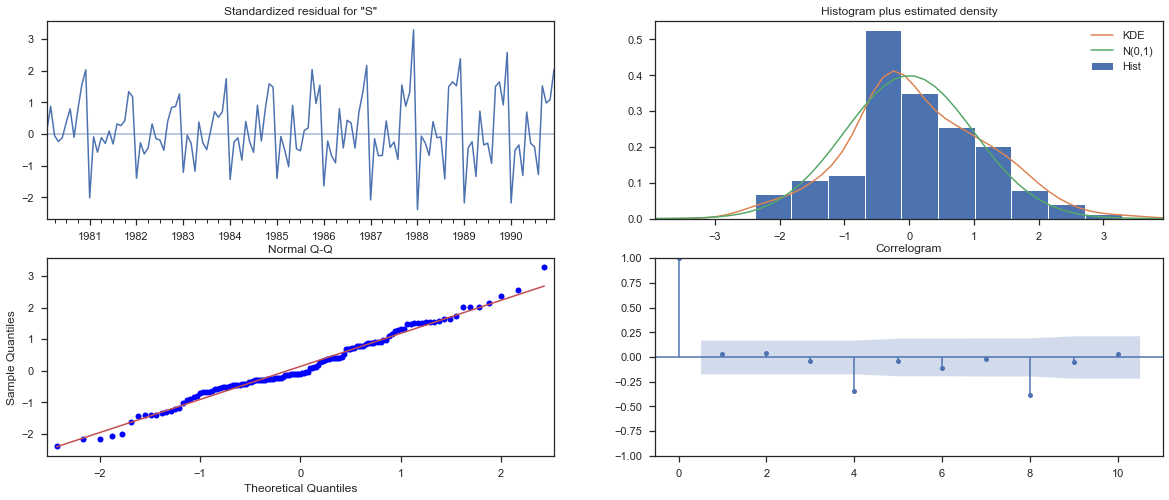

In [791]:
results_auto_ARIMA.plot_diagnostics();

#### Predict on the Test Set using this model and evaluate the model.

In [792]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [793]:
predicted_auto_ARIMA

1991-01-31    3468.444084
1991-02-28    2778.371560
1991-03-31    3048.890971
1991-04-30    3477.524913
1991-05-31    2055.049246
1991-06-30    1995.522088
1991-07-31    2618.507190
1991-08-31    3238.532757
1991-09-30    1926.882716
1991-10-31    1921.498368
1991-11-30    2579.012565
1991-12-31    3215.136883
1992-01-31    1917.592779
1992-02-29    1913.061609
1992-03-31    2575.663594
1992-04-30    3211.697354
1992-05-31    1919.284992
1992-06-30    1910.708191
1992-07-31    2575.644506
1992-08-31    3210.116150
1992-09-30    1921.978605
1992-10-31    1908.933528
1992-11-30    2575.919786
1992-12-31    3208.718959
1993-01-31    1924.750475
1993-02-28    1907.228269
1993-03-31    2576.208774
1993-04-30    3207.350758
1993-05-31    1927.515342
1993-06-30    1905.545157
1993-07-31    2576.485646
1993-08-31    3205.997070
1993-09-30    1930.265453
1993-10-31    1903.879682
1993-11-30    2576.748155
1993-12-31    3204.656423
1994-01-31    1933.000224
1994-02-28    1902.231289
1994-03-31  

Text(0, 0.5, 'Wine Units Sold')

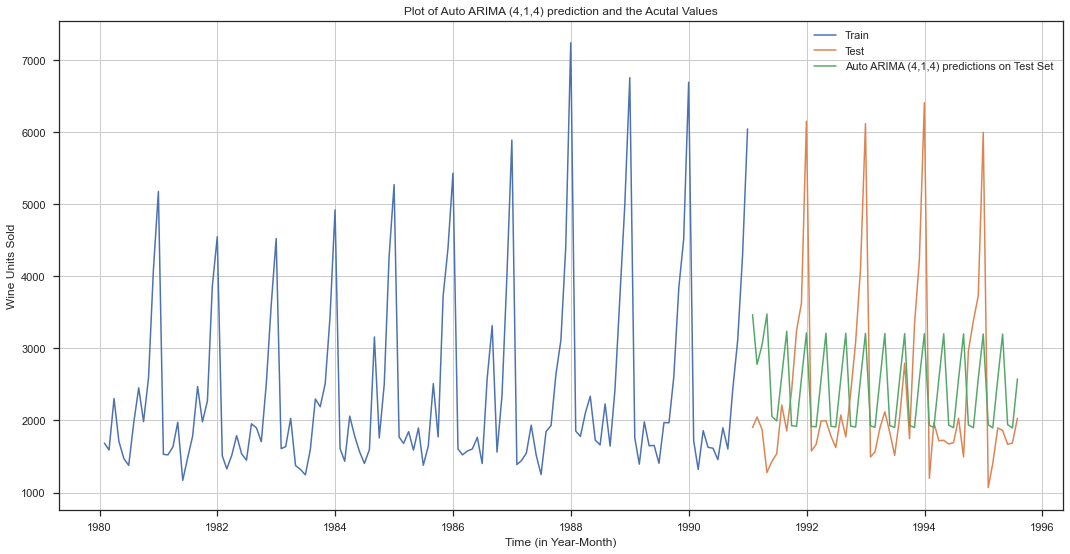

In [794]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Sparkling_Wine_Sales'], label='Train')
plt.plot(test['Sparkling_Wine_Sales'], label='Test')

plt.plot(predicted_auto_ARIMA, label='Auto ARIMA (4,1,4) predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Auto ARIMA (4,1,4) prediction and the Acutal Values');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

In [795]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [796]:
rmse = mean_squared_error(test['Sparkling_Wine_Sales'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling_Wine_Sales'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1212.9180762034216 
MAPE: 40.21463860198154


In [797]:
resultsDf_2 = pd.DataFrame({'Test RMSE': rmse,'MAPE':mape}
                           ,index=['Auto ARIMA (4,1,4)'])

resultsDf_2

Test RMSE       MAPE
Auto ARIMA (4,1,4)  1212.918076  40.214639

### SARIMA Model

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

Text(0, 0.5, 'Correlation')

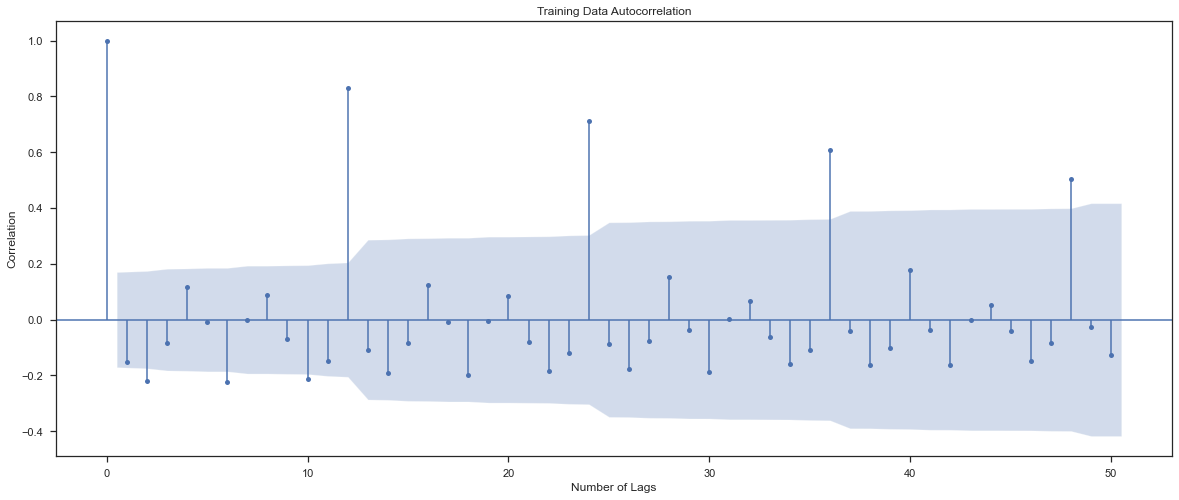

In [798]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop',lags=50);
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')

We can see that there is a seasonality.

In [799]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(0,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 0)(0, 0, 0, 12)
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [800]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [801]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling_Wine_Sales'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.261461684592
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640234275
SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:3788.8702234504462
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.436602245668
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301389272
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735791694
SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:3102.146459235806
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470858
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.205415860455
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.98980539208
SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:2633.1403461999307
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:1467.4574095308406
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:1469.1871052625374
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:1471.0594530064632
SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:6506.405021012982
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.162907850582
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.7688649566421
SARIMA(0, 1, 1)x(0

SARIMA(2, 1, 1)x(1, 0, 3, 12) - AIC:3594.617162306464
SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:1577.1235060896922
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:1573.1596300826325
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:1572.342867514582
SARIMA(2, 1, 1)x(2, 0, 3, 12) - AIC:6905.0723913488355
SARIMA(2, 1, 1)x(3, 0, 0, 12) - AIC:1402.4673327192704
SARIMA(2, 1, 1)x(3, 0, 1, 12) - AIC:1403.130756763638
SARIMA(2, 1, 1)x(3, 0, 2, 12) - AIC:1403.8241452520028
SARIMA(2, 1, 1)x(3, 0, 3, 12) - AIC:4509.165141279203
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:2176.868114771516
SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1892.2372608758158
SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:1661.5523432488512
SARIMA(2, 1, 2)x(0, 0, 3, 12) - AIC:3698.0127624229713
SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1757.2140935579478
SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1725.3767693060447
SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:1557.3404017838243
SARIMA(2, 1, 2)x(1, 0, 3, 12) - AIC:2060.2986845540727
SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:1599.9010784492957
SARIMA(2, 1, 2)

In [802]:
SARIMA_AIC.sort_values(by=['AIC']).head(20)

param       seasonal          AIC
87   (1, 1, 1)  (1, 0, 3, 12)    14.000000
107  (1, 1, 2)  (2, 0, 3, 12)    18.000000
171  (2, 1, 2)  (2, 0, 3, 12)    20.000000
127  (1, 1, 3)  (3, 0, 3, 12)    22.000000
187  (2, 1, 3)  (2, 0, 3, 12)    22.000000
235  (3, 1, 2)  (2, 0, 3, 12)    22.000000
43   (0, 1, 2)  (2, 0, 3, 12)    97.325761
251  (3, 1, 3)  (2, 0, 3, 12)   481.328732
91   (1, 1, 1)  (2, 0, 3, 12)   762.588127
123  (1, 1, 3)  (2, 0, 3, 12)   917.932423
252  (3, 1, 3)  (3, 0, 0, 12)  1387.497004
220  (3, 1, 1)  (3, 0, 0, 12)  1387.788331
237  (3, 1, 2)  (3, 0, 1, 12)  1388.602612
221  (3, 1, 1)  (3, 0, 1, 12)  1388.681484
222  (3, 1, 1)  (3, 0, 2, 12)  1389.195902
238  (3, 1, 2)  (3, 0, 2, 12)  1389.701997
254  (3, 1, 3)  (3, 0, 2, 12)  1391.692608
253  (3, 1, 3)  (3, 0, 1, 12)  1393.169861
204  (3, 1, 0)  (3, 0, 0, 12)  1396.867862
205  (3, 1, 0)  (3, 0, 1, 12)  1397.677472

### The model is throwing errors with values before (3,1,2)(3,0,1,12). It is therefore due to this reason, we have decided on this parameter combination.

In [803]:
SARIMA_AIC.sort_values(by=['AIC']).iloc[12:,:]

param       seasonal          AIC
237  (3, 1, 2)  (3, 0, 1, 12)  1388.602612
221  (3, 1, 1)  (3, 0, 1, 12)  1388.681484
222  (3, 1, 1)  (3, 0, 2, 12)  1389.195902
238  (3, 1, 2)  (3, 0, 2, 12)  1389.701997
254  (3, 1, 3)  (3, 0, 2, 12)  1391.692608
..         ...            ...          ...
79   (1, 1, 0)  (3, 0, 3, 12)  6830.324045
155  (2, 1, 1)  (2, 0, 3, 12)  6905.072391
219  (3, 1, 1)  (2, 0, 3, 12)  6905.425193
75   (1, 1, 0)  (2, 0, 3, 12)  6906.461699
203  (3, 1, 0)  (2, 0, 3, 12)  6921.783396

[244 rows x 3 columns]

In [804]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling_Wine_Sales'],
                                order=(3, 1, 2),
                                seasonal_order=(3, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                      SARIMAX Results                                       
Dep. Variable:                 Sparkling_Wine_Sales   No. Observations:                  132
Model:             SARIMAX(3, 1, 2)x(3, 0, [1], 12)   Log Likelihood                -684.301
Date:                              Sun, 23 Oct 2022   AIC                           1388.603
Time:                                      21:52:04   BIC                           1413.820
Sample:                                  01-31-1980   HQIC                          1398.781
                                       - 12-31-1990                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5433      0.416     -1.306      0.191      -1.358       0.272
ar.L2         -0.00

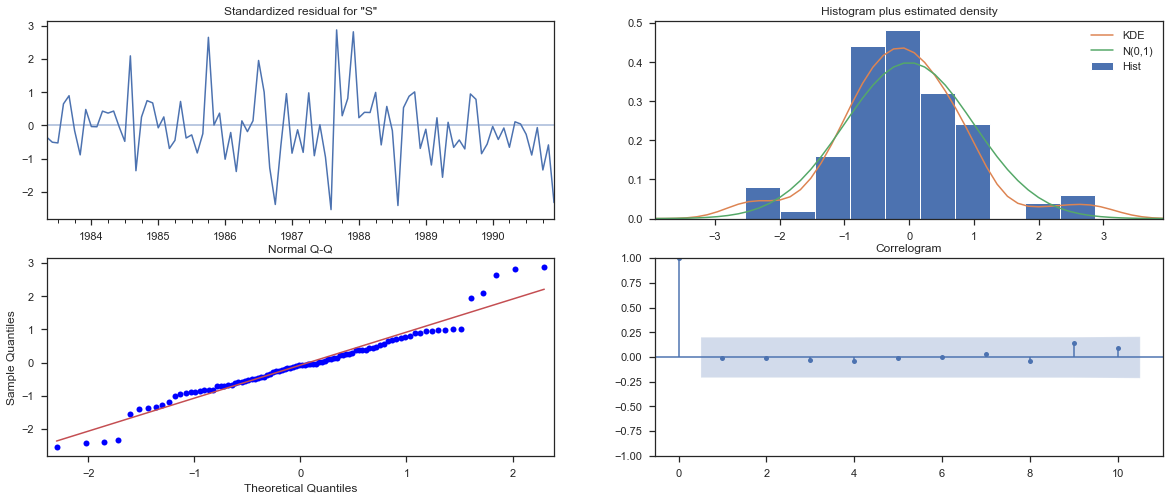

In [805]:
results_auto_SARIMA.plot_diagnostics();
plt.show()

#### Predict on the Test Set using this model and evaluate the model.

In [806]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [807]:
predicted_auto_SARIMA.predicted_mean

1991-01-31    1320.365492
1991-02-28    1298.641106
1991-03-31    1604.553642
1991-04-30    1626.041006
1991-05-31    1397.971401
1991-06-30    1237.768475
1991-07-31    1785.878306
1991-08-31    1510.264627
1991-09-30    2286.002274
1991-10-31    3290.953330
1991-11-30    4452.022927
1991-12-31    6491.383012
1992-01-31    1295.954582
1992-02-29    1101.842280
1992-03-31    1546.537323
1992-04-30    1443.761112
1992-05-31    1282.979164
1992-06-30    1094.899498
1992-07-31    1662.277800
1992-08-31    1419.684677
1992-09-30    2214.742837
1992-10-31    3277.840818
1992-11-30    4411.771459
1992-12-31    6548.980598
1993-01-31    1180.413576
1993-02-28     959.116023
1993-03-31    1427.677881
1993-04-30    1310.628601
1993-05-31    1160.424344
1993-06-30     971.158913
1993-07-31    1543.078230
1993-08-31    1275.514959
1993-09-30    2112.991964
1993-10-31    3158.170164
1993-11-30    4358.908286
1993-12-31    6527.412958
1994-01-31    1018.836022
1994-02-28     824.493949
1994-03-31  

Text(0, 0.5, 'Wine Units Sold')

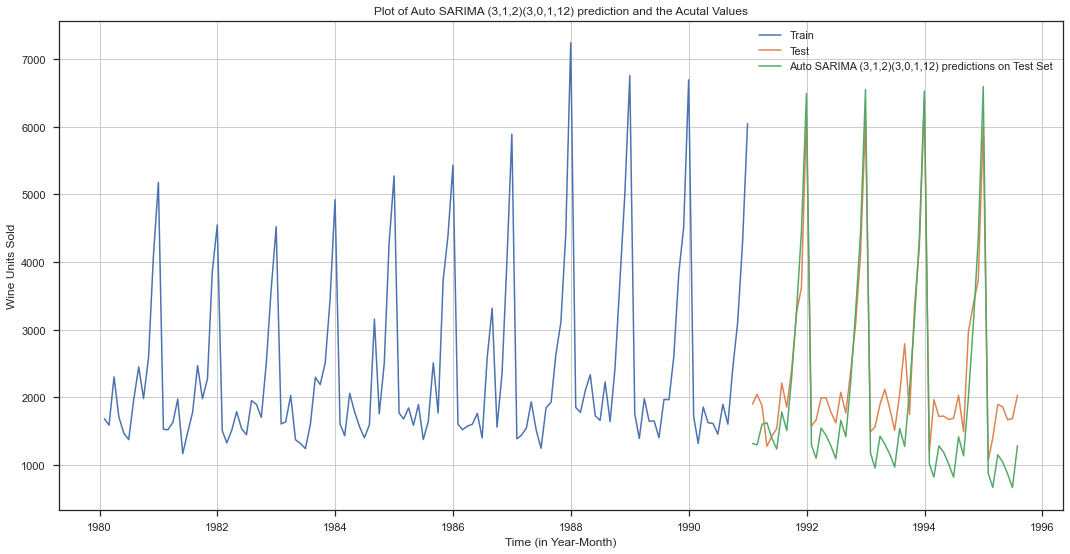

In [808]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Sparkling_Wine_Sales'], label='Train')
plt.plot(test['Sparkling_Wine_Sales'], label='Test')

plt.plot(predicted_auto_SARIMA.predicted_mean, label='Auto SARIMA (3,1,2)(3,0,1,12) predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Auto SARIMA (3,1,2)(3,0,1,12) prediction and the Acutal Values');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

In [809]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Sparkling_Wine_Sales         mean     mean_se  mean_ci_lower  mean_ci_upper
1991-01-31            1320.365492  407.857903     520.978692    2119.752293
1991-02-28            1298.641106  421.156467     473.189598    2124.092614
1991-03-31            1604.553642  421.156916     779.101256    2430.006028
1991-04-30            1626.041006  429.652167     783.938234    2468.143779
1991-05-31            1397.971401  430.118929     554.953792    2240.989010

In [810]:
rmse = mean_squared_error(test['Sparkling_Wine_Sales'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling_Wine_Sales'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 579.925218746949 
MAPE: 25.052503981751116


In [811]:
temp_resultsDf = pd.DataFrame({'Test RMSE': rmse,'MAPE':mape}
                           ,index=['Auto SARIMA (3,1,2)(3,0,1,12)'])


resultsDf_2 = pd.concat([resultsDf_2,temp_resultsDf])

resultsDf_2

Test RMSE       MAPE
Auto ARIMA (4,1,4)             1212.918076  40.214639
Auto SARIMA (3,1,2)(3,0,1,12)   579.925219  25.052504

## 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

## Manual ARIMA Model

Let us look at the ACF and the PACF plots once more.

### ACF plot

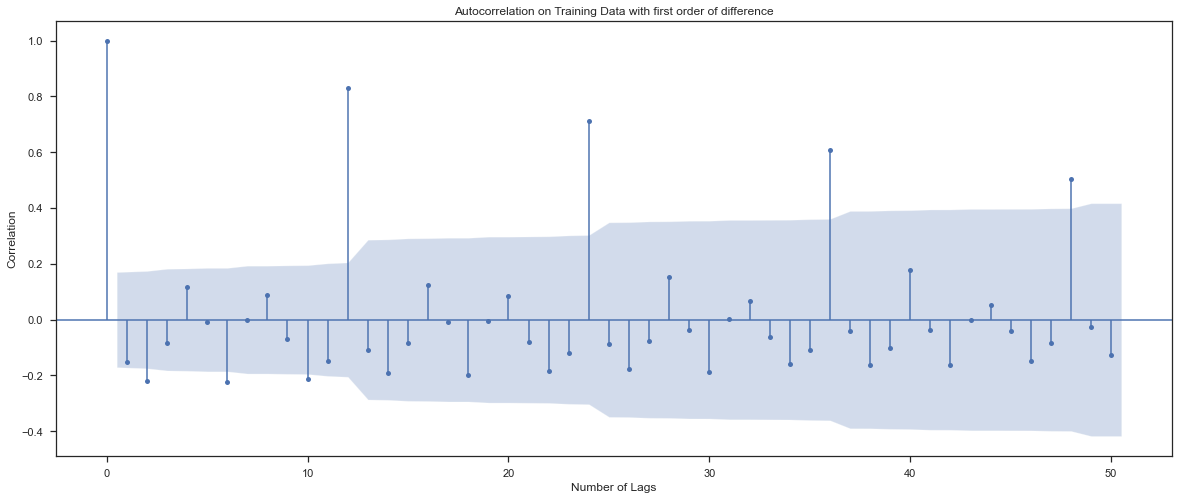

In [812]:
plot_acf(train.diff(),title='Autocorrelation on Training Data with first order of difference',missing='drop',lags=50)
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')
plt.show()

### PACF plot

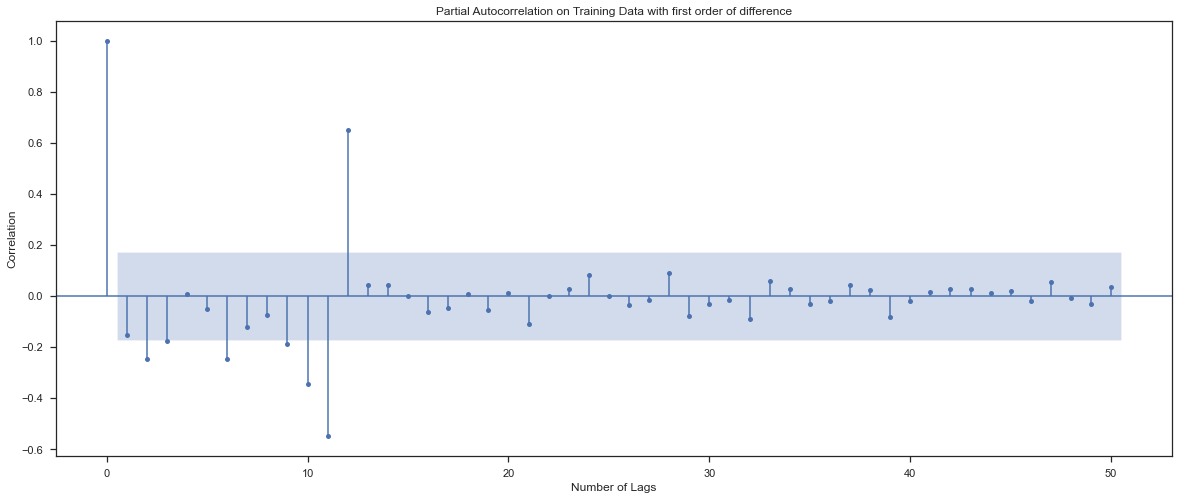

In [813]:
plot_pacf(train.diff().dropna(),title='Partial Autocorrelation on Training Data with first order of difference',lags=50,method='ywmle')
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')
plt.show()

Here, we have taken alpha=0.05.

* The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag after which the PACF plot cuts-off to 0.
* The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag after which the ACF plot cuts-off to 0.

By looking at the above plots, we can see that first lag cuts off in both plots and hence we start from lags after lag 0. Therefore we have taken the value of p and q to be 2 and 1 respectively.

We would also build a model with p=0,q=0

In [814]:
manual_ARIMA = ARIMA(train['Sparkling_Wine_Sales'], order=(0,1,0),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                                SARIMAX Results                                 
Dep. Variable:     Sparkling_Wine_Sales   No. Observations:                  132
Model:                   ARIMA(0, 1, 0)   Log Likelihood               -1132.832
Date:                  Sun, 23 Oct 2022   AIC                           2267.663
Time:                          21:52:04   BIC                           2270.538
Sample:                      01-31-1980   HQIC                          2268.831
                           - 12-31-1990                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.885e+06   1.29e+05     14.658      0.000    1.63e+06    2.14e+06
Ljung-Box (L1) (Q):                   3.07   Jarque-Bera (JB):               198.83
Prob(Q):                       

Let us analyse the residuals from the various diagnostics plot.

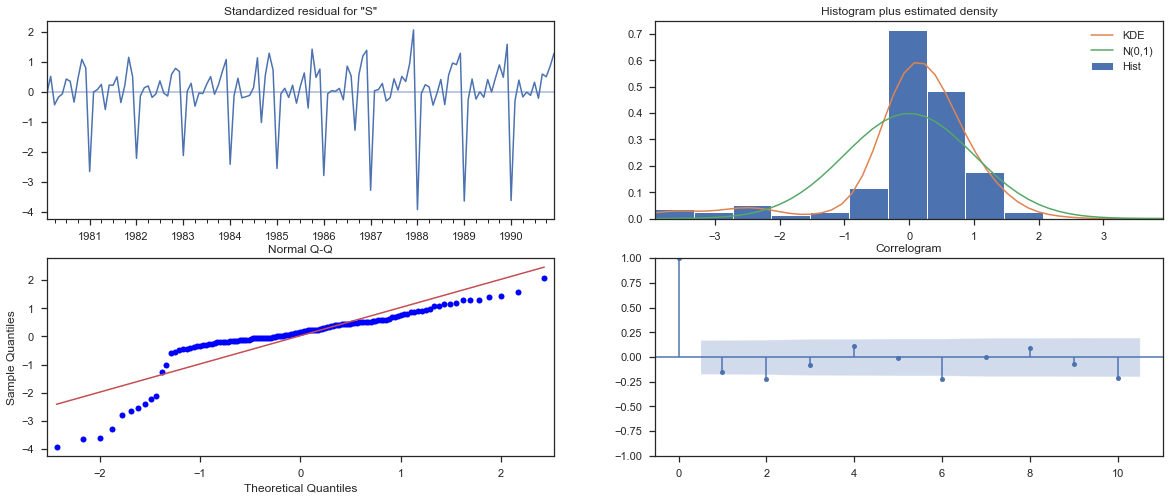

In [815]:
results_manual_ARIMA.plot_diagnostics();

#### Predict on the Test Set using this model and evaluate the model.

In [816]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [817]:
predicted_manual_ARIMA

1991-01-31    6047.0
1991-02-28    6047.0
1991-03-31    6047.0
1991-04-30    6047.0
1991-05-31    6047.0
1991-06-30    6047.0
1991-07-31    6047.0
1991-08-31    6047.0
1991-09-30    6047.0
1991-10-31    6047.0
1991-11-30    6047.0
1991-12-31    6047.0
1992-01-31    6047.0
1992-02-29    6047.0
1992-03-31    6047.0
1992-04-30    6047.0
1992-05-31    6047.0
1992-06-30    6047.0
1992-07-31    6047.0
1992-08-31    6047.0
1992-09-30    6047.0
1992-10-31    6047.0
1992-11-30    6047.0
1992-12-31    6047.0
1993-01-31    6047.0
1993-02-28    6047.0
1993-03-31    6047.0
1993-04-30    6047.0
1993-05-31    6047.0
1993-06-30    6047.0
1993-07-31    6047.0
1993-08-31    6047.0
1993-09-30    6047.0
1993-10-31    6047.0
1993-11-30    6047.0
1993-12-31    6047.0
1994-01-31    6047.0
1994-02-28    6047.0
1994-03-31    6047.0
1994-04-30    6047.0
1994-05-31    6047.0
1994-06-30    6047.0
1994-07-31    6047.0
1994-08-31    6047.0
1994-09-30    6047.0
1994-10-31    6047.0
1994-11-30    6047.0
1994-12-31   

Text(0, 0.5, 'Wine Units Sold')

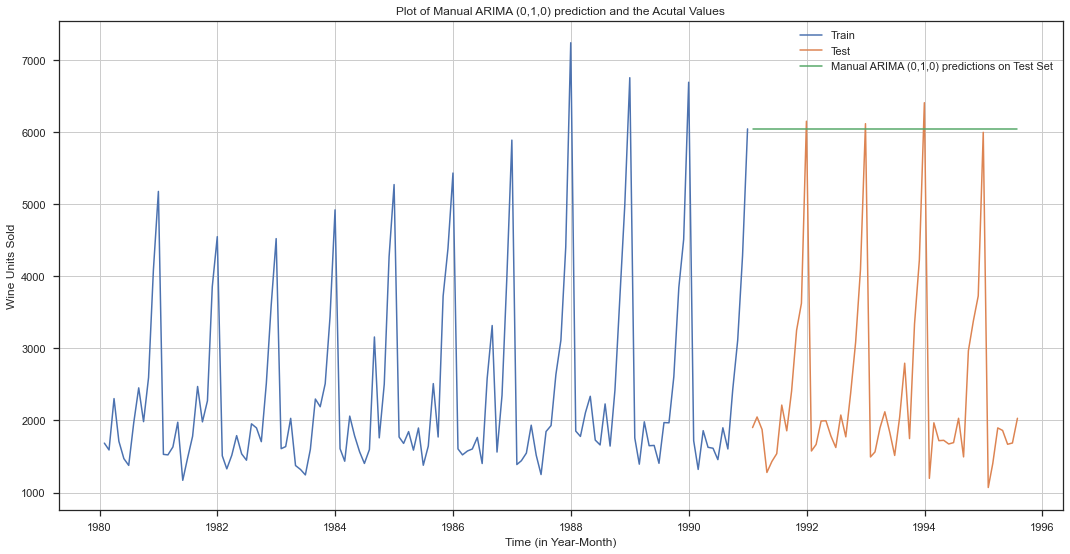

In [818]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Sparkling_Wine_Sales'], label='Train')
plt.plot(test['Sparkling_Wine_Sales'], label='Test')

plt.plot(predicted_manual_ARIMA, label='Manual ARIMA (0,1,0) predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Manual ARIMA (0,1,0) prediction and the Acutal Values');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

In [819]:
rmse = mean_squared_error(test['Sparkling_Wine_Sales'],predicted_manual_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling_Wine_Sales'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 3864.2793518443914 
MAPE: 201.32764950352743


In [820]:
manual_ARIMA = ARIMA(train['Sparkling_Wine_Sales'], order=(2,1,1),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                                SARIMAX Results                                 
Dep. Variable:     Sparkling_Wine_Sales   No. Observations:                  132
Model:                   ARIMA(2, 1, 1)   Log Likelihood               -1112.889
Date:                  Sun, 23 Oct 2022   AIC                           2233.778
Time:                          21:52:05   BIC                           2245.278
Sample:                      01-31-1980   HQIC                          2238.451
                           - 12-31-1990                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5194      0.119      4.359      0.000       0.286       0.753
ar.L2         -0.1782      0.196     -0.908      0.364      -0.563       0.206
ma.L1         -0.9993      0.667    

Let us analyse the residuals from the various diagnostics plot.

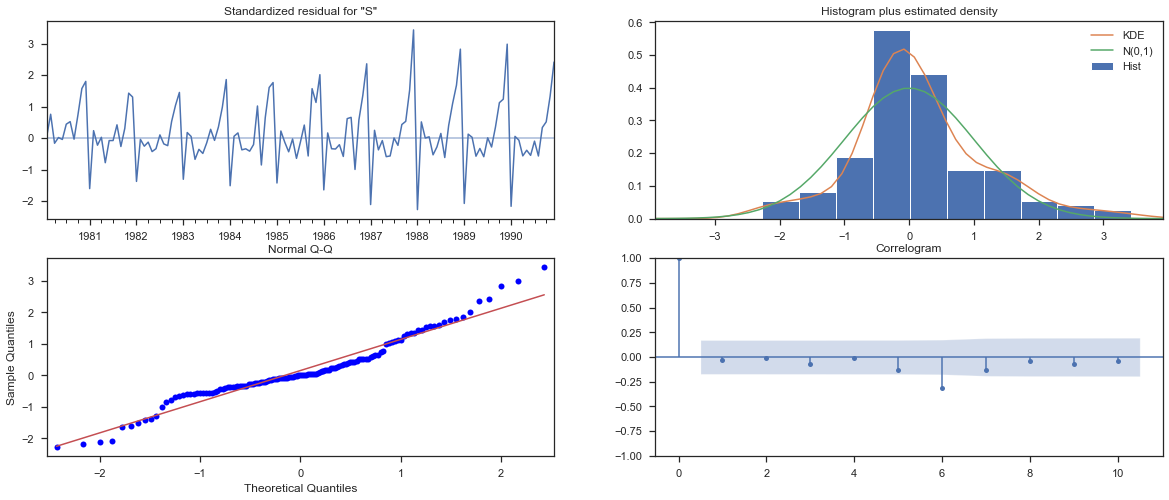

In [821]:
results_manual_ARIMA.plot_diagnostics();

#### Predict on the Test Set using this model and evaluate the model.

In [822]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [823]:
predicted_manual_ARIMA

1991-01-31    3957.667290
1991-02-28    2558.511466
1991-03-31    2204.093503
1991-04-30    2269.356381
1991-05-31    2366.423315
1991-06-30    2405.213121
1991-07-31    2408.062662
1991-08-31    2402.629532
1991-09-30    2399.299439
1991-10-31    2398.537947
1991-11-30    2398.735898
1991-12-31    2398.974440
1992-01-31    2399.063070
1992-02-29    2399.066595
1992-03-31    2399.052630
1992-04-30    2399.044748
1992-05-31    2399.043142
1992-06-30    2399.043713
1992-07-31    2399.044296
1992-08-31    2399.044496
1992-09-30    2399.044497
1992-10-31    2399.044461
1992-11-30    2399.044443
1992-12-31    2399.044440
1993-01-31    2399.044441
1993-02-28    2399.044443
1993-03-31    2399.044443
1993-04-30    2399.044443
1993-05-31    2399.044443
1993-06-30    2399.044443
1993-07-31    2399.044443
1993-08-31    2399.044443
1993-09-30    2399.044443
1993-10-31    2399.044443
1993-11-30    2399.044443
1993-12-31    2399.044443
1994-01-31    2399.044443
1994-02-28    2399.044443
1994-03-31  

Text(0, 0.5, 'Wine Units Sold')

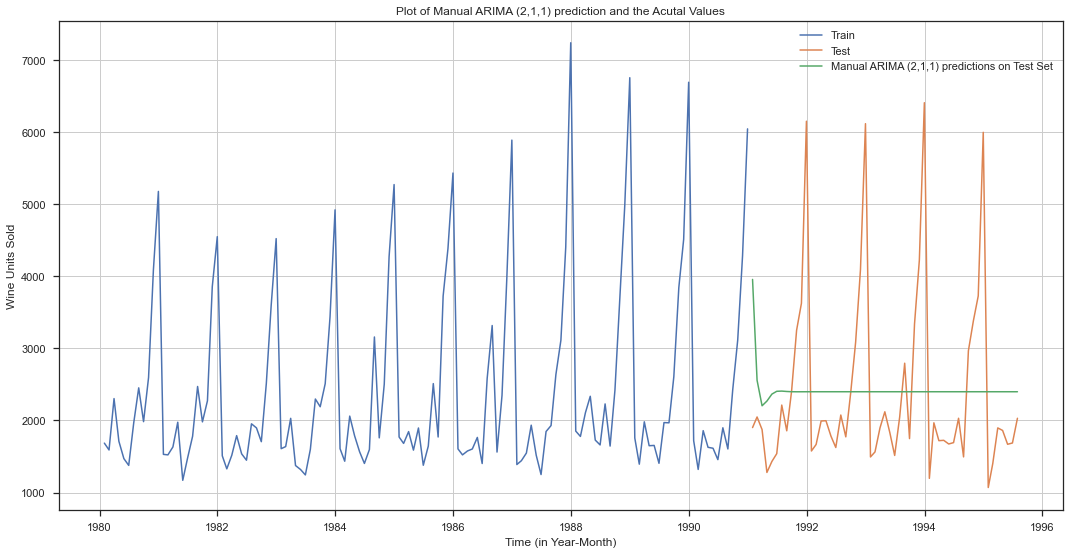

In [824]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Sparkling_Wine_Sales'], label='Train')
plt.plot(test['Sparkling_Wine_Sales'], label='Test')

plt.plot(predicted_manual_ARIMA, label='Manual ARIMA (2,1,1) predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Manual ARIMA (2,1,1) prediction and the Acutal Values');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

In [825]:
rmse = mean_squared_error(test['Sparkling_Wine_Sales'],predicted_manual_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling_Wine_Sales'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1300.721382895629 
MAPE: 40.22566932503722


In [826]:
temp_resultsDf = pd.DataFrame({'Test RMSE': rmse,'MAPE':mape}
                           ,index=['Manual ARIMA (2,1,1)'])


resultsDf_2 = pd.concat([resultsDf_2,temp_resultsDf])

resultsDf_2

Test RMSE       MAPE
Auto ARIMA (4,1,4)             1212.918076  40.214639
Auto SARIMA (3,1,2)(3,0,1,12)   579.925219  25.052504
Manual ARIMA (2,1,1)           1300.721383  40.225669

## Manual SARIMA Model

Let us look at the ACF and the PACF plots once more.

### ACF plot

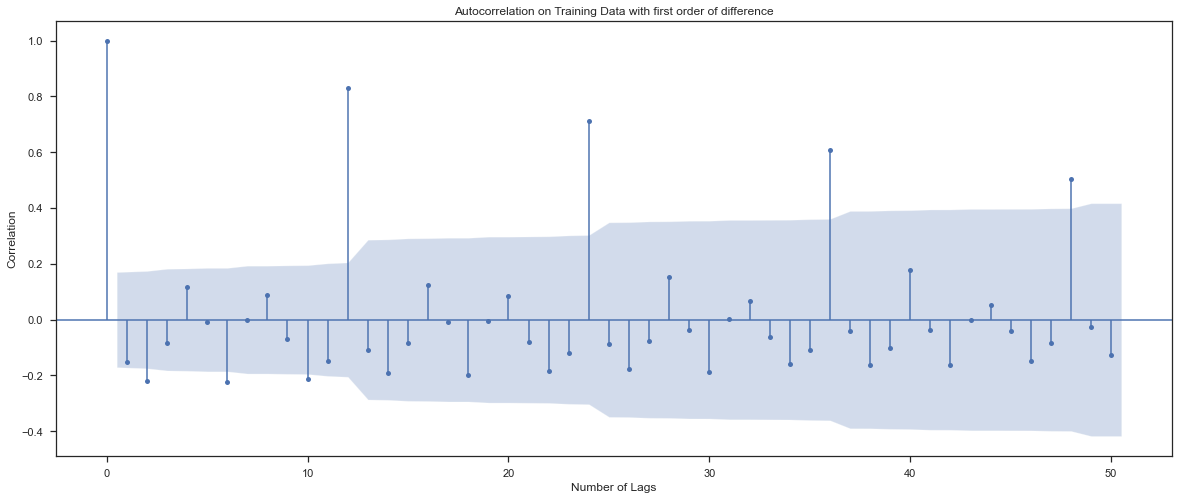

In [827]:
plot_acf(train.diff(),title='Autocorrelation on Training Data with first order of difference',missing='drop',lags=50)
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')
plt.show()

### PACF plot

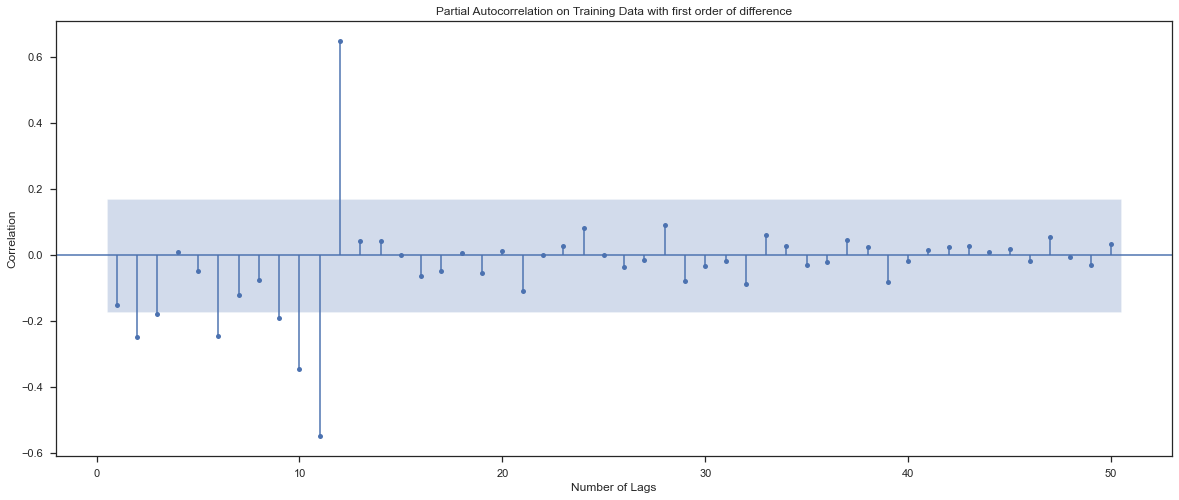

In [828]:
plot_pacf(train.diff().dropna(),title='Partial Autocorrelation on Training Data with first order of difference',lags=50,zero=False,method='ywmle')
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')
plt.show()

We see that our ACF plot at the seasonal interval (12) does not taper off quickly. So, we go ahead and take a seasonal differencing of the original series. Before that let us look at the original series.

Text(0, 0.5, 'Units Sold')

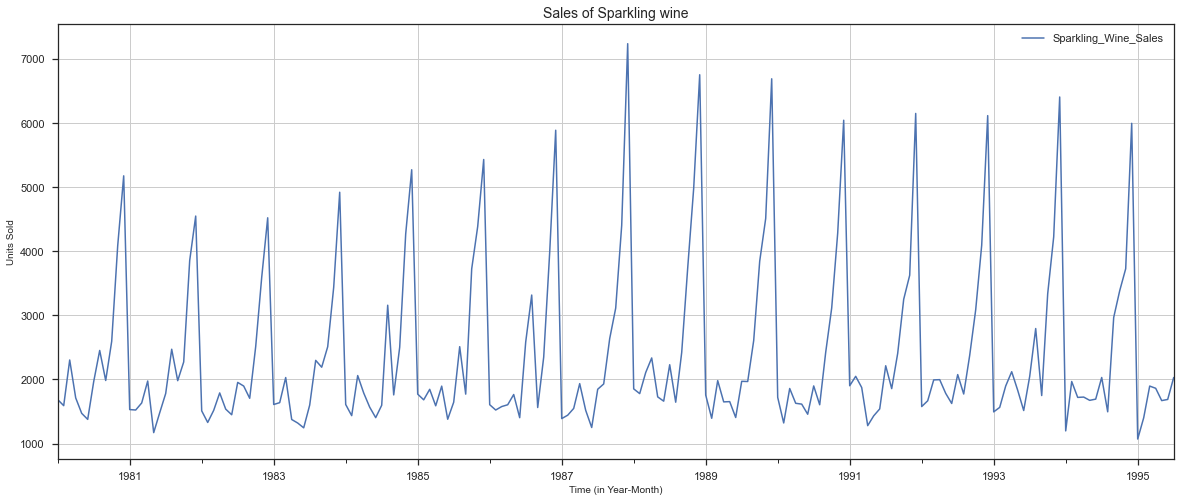

In [829]:
#Original Time Series
rcParams['figure.figsize'] = 20,8
df.plot(grid=True);
plt.title('Sales of Sparkling wine', fontsize=14)
plt.xlabel('Time (in Year-Month)',fontsize=10)
plt.ylabel('Units Sold',fontsize=10)

Text(0, 0.5, 'Wine Units Sold')

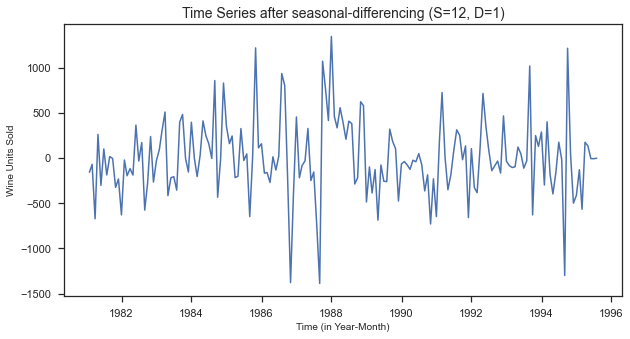

In [830]:
#Time series with seasonal differencing (S=12, D=1)
plt.figure(figsize=(10,5))
plt.plot(df['Sparkling_Wine_Sales'].diff(12).dropna())
plt.title ('Time Series after seasonal-differencing (S=12, D=1)',fontsize=14);
plt.xlabel('Time (in Year-Month)',fontsize=10)
plt.ylabel('Wine Units Sold',fontsize=10)

Text(0, 0.5, 'Wine Units Sold')

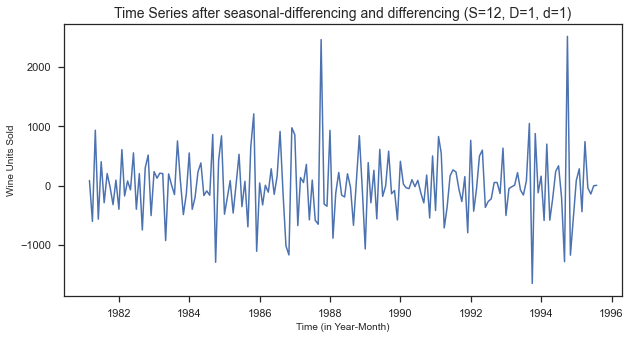

In [831]:
#Time series with seasonal differencing followed by normal differencing (S=12, D=1, d=1)
plt.figure(figsize=(10,5))
plt.plot((df['Sparkling_Wine_Sales'].diff(12).dropna()).diff().dropna())
plt.title ('Time Series after seasonal-differencing and differencing (S=12, D=1, d=1)',fontsize=14);
plt.xlabel('Time (in Year-Month)',fontsize=10)
plt.ylabel('Wine Units Sold',fontsize=10)

In [832]:
#Testing stationarity
dftest = adfuller((df['Sparkling_Wine_Sales'].diff(12).dropna()).diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -5.121
DF test p-value is 0.00012316304915679487
Number of lags used 11


Let us look at the ACF and the PACF plots once more with seasonal and normal differencing on train data

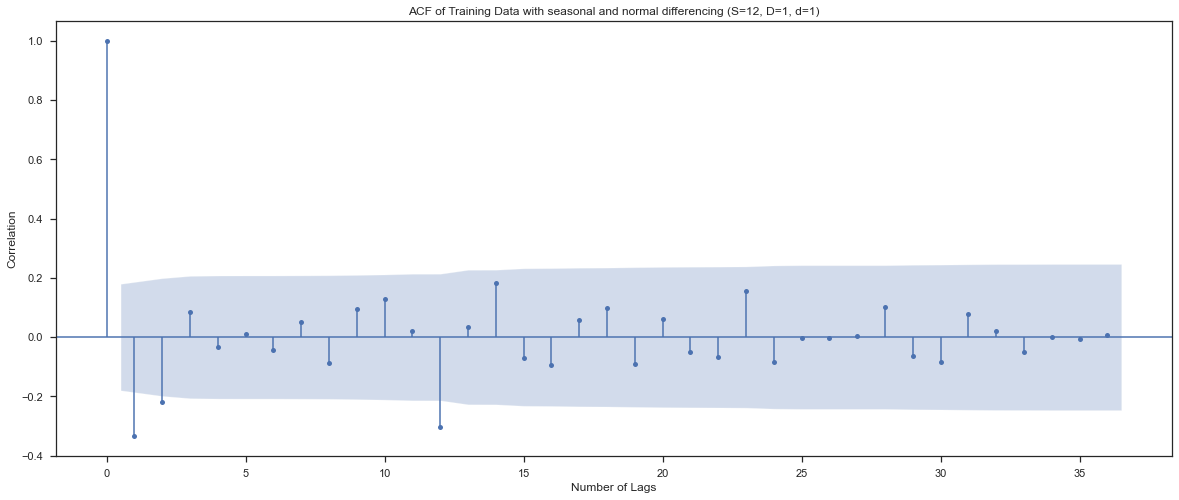

In [833]:
plot_acf((train['Sparkling_Wine_Sales'].diff(12).dropna()).diff().dropna(),title='ACF of Training Data with seasonal and normal differencing (S=12, D=1, d=1)',lags=36)
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')
plt.show()

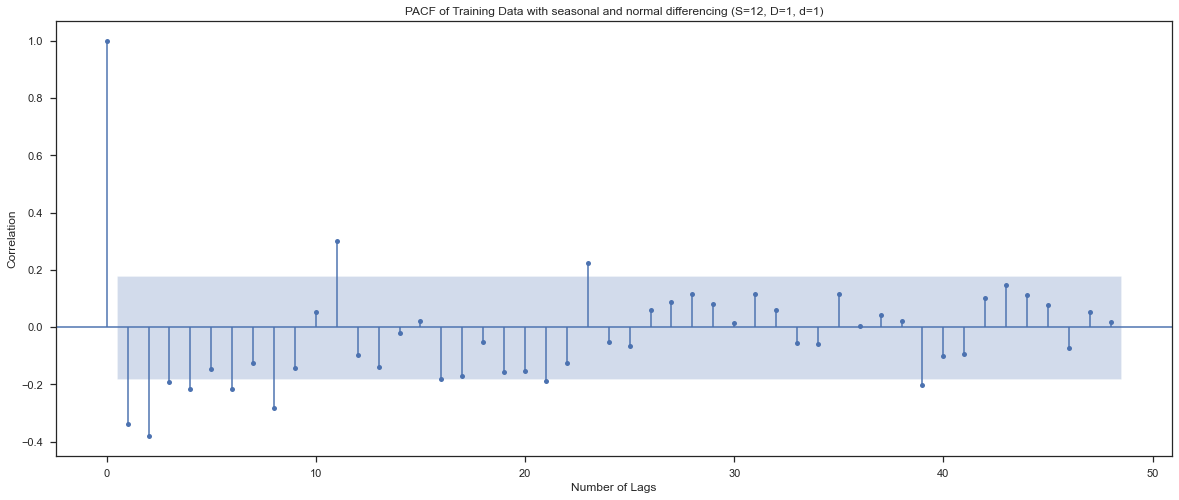

In [834]:
plot_pacf((train['Sparkling_Wine_Sales'].diff(12).dropna()).diff().dropna(),title='PACF of Training Data with seasonal and normal differencing (S=12, D=1, d=1)',lags=48)
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')
plt.show()

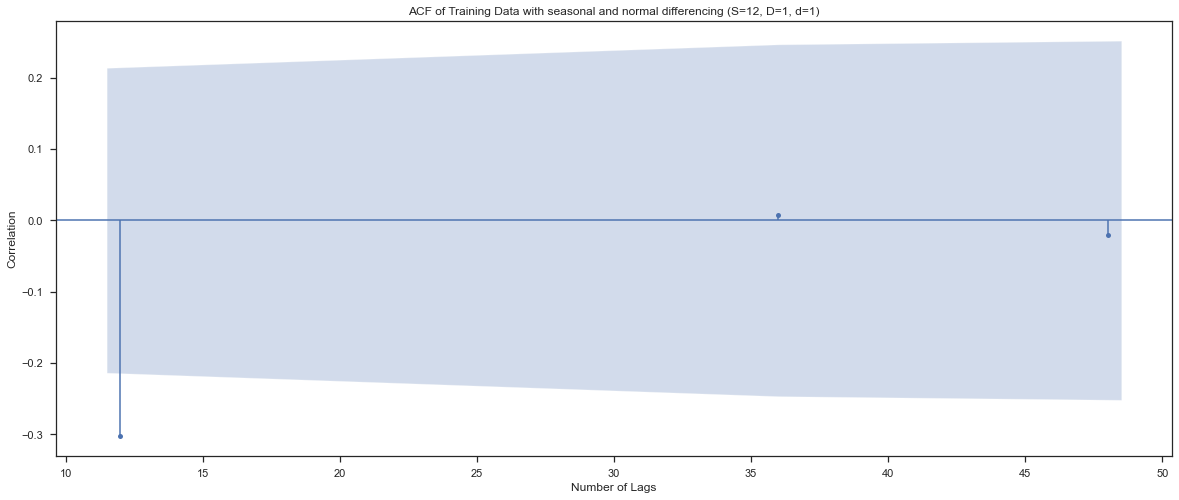

In [835]:
plot_acf((train['Sparkling_Wine_Sales'].diff(12).dropna()).diff().dropna(),title='ACF of Training Data with seasonal and normal differencing (S=12, D=1, d=1)',lags=[12.24,36,48])
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')
plt.show()

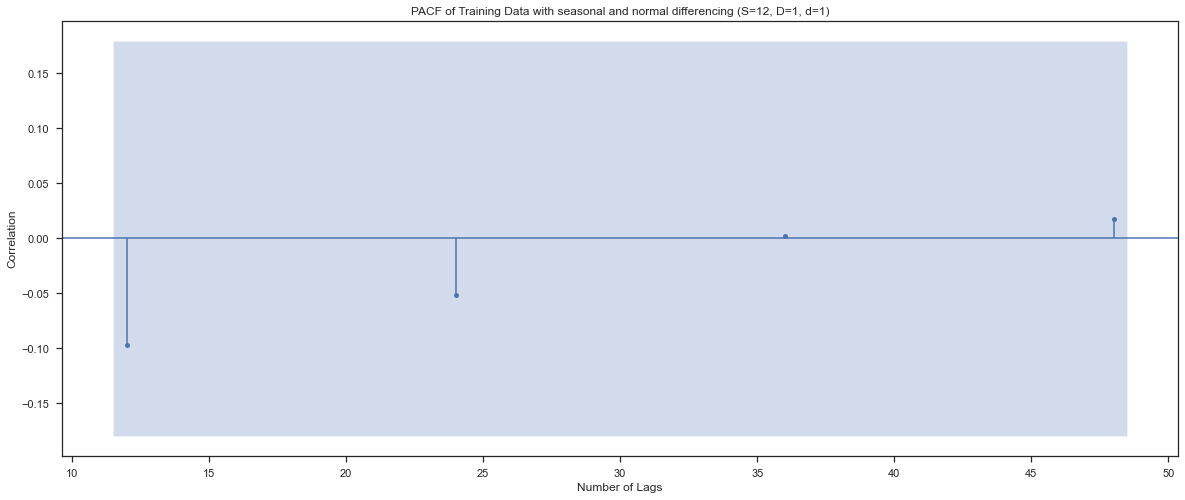

In [836]:
plot_pacf((train['Sparkling_Wine_Sales'].diff(12).dropna()).diff().dropna(),title='PACF of Training Data with seasonal and normal differencing (S=12, D=1, d=1)',lags=[12,24,36,48])
plt.xlabel('Number of Lags')
plt.ylabel('Correlation')
plt.show()

- Here we have taken alpha = 0.05 and seasonal period as 12.


- From the PACF plot it can be seen that till lag 4 is significant before cut-off, so AR term ‘p = 4’ is chosen. At seasonal lag of 12, it cuts off, so keep seasonal AR ‘P = 0’.


- From ACF plot, lag 1 and 2 are significant before it cuts off, so lets keep MA term ‘q = 2’ and at seasonal lag of 12, a significant lag is apparent and no seaonal lags are apparent at lags 24, 36 or afterwards, so lets keep ‘Q = 1'.


- The final selected terms for SARIMA model is (4, 1, 2)x(0, 1, 1, 12), as inferred from the ACF and PACF plots.

In [837]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling_Wine_Sales'],
                                order=(4,1,2),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

                                      SARIMAX Results                                       
Dep. Variable:                 Sparkling_Wine_Sales   No. Observations:                  132
Model:             SARIMAX(4, 1, 2)x(0, 1, [1], 12)   Log Likelihood                -771.377
Date:                              Sun, 23 Oct 2022   AIC                           1558.755
Time:                                      21:52:07   BIC                           1579.910
Sample:                                  01-31-1980   HQIC                          1567.325
                                       - 12-31-1990                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1794      0.593     -0.303      0.762      -1.341       0.982
ar.L2         -0.08

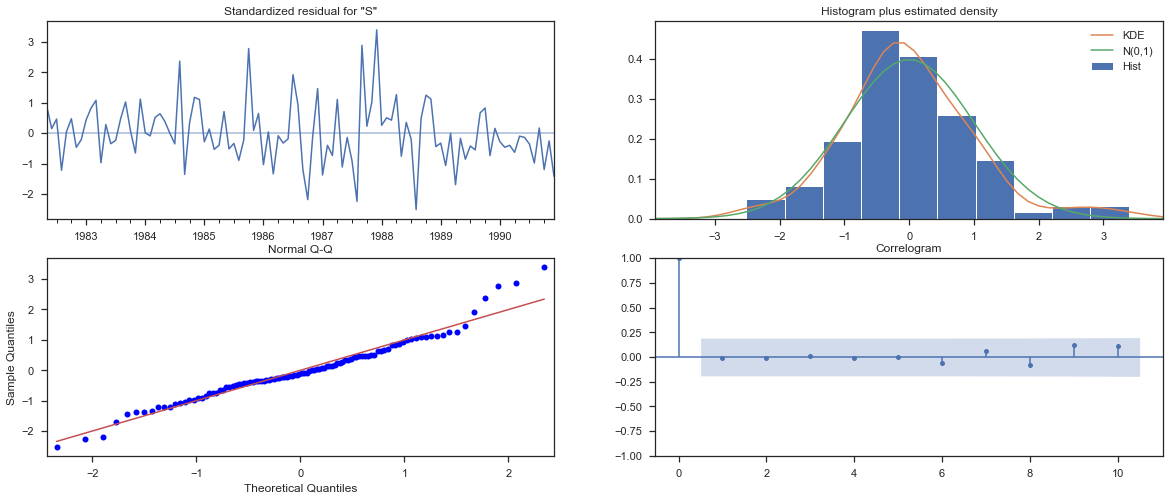

In [838]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

#### Predict on the Test Set using this model and evaluate the model.

In [839]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))

In [840]:
predicted_manual_SARIMA.predicted_mean

1991-01-31    1431.532524
1991-02-28    1348.288049
1991-03-31    1722.381473
1991-04-30    1621.897859
1991-05-31    1476.372091
1991-06-30    1255.611862
1991-07-31    1798.112892
1991-08-31    1612.942581
1991-09-30    2267.723970
1991-10-31    3183.853028
1991-11-30    4248.331847
1991-12-31    6166.345200
1992-01-31    1398.918155
1992-02-29    1206.059434
1992-03-31    1632.939937
1992-04-30    1503.837846
1992-05-31    1381.732715
1992-06-30    1178.104364
1992-07-31    1706.376805
1992-08-31    1527.412205
1992-09-30    2178.785560
1992-10-31    3091.932556
1992-11-30    4159.677462
1992-12-31    6076.281429
1993-01-31    1309.330132
1993-02-28    1117.054339
1993-03-31    1543.229764
1993-04-30    1414.443654
1993-05-31    1292.275060
1993-06-30    1088.522768
1993-07-31    1616.943954
1993-08-31    1437.910416
1993-09-30    2089.291521
1993-10-31    3002.466026
1993-11-30    4070.179747
1993-12-31    5986.798373
1994-01-31    1219.846350
1994-02-28    1027.564362
1994-03-31  

Text(0, 0.5, 'Wine Units Sold')

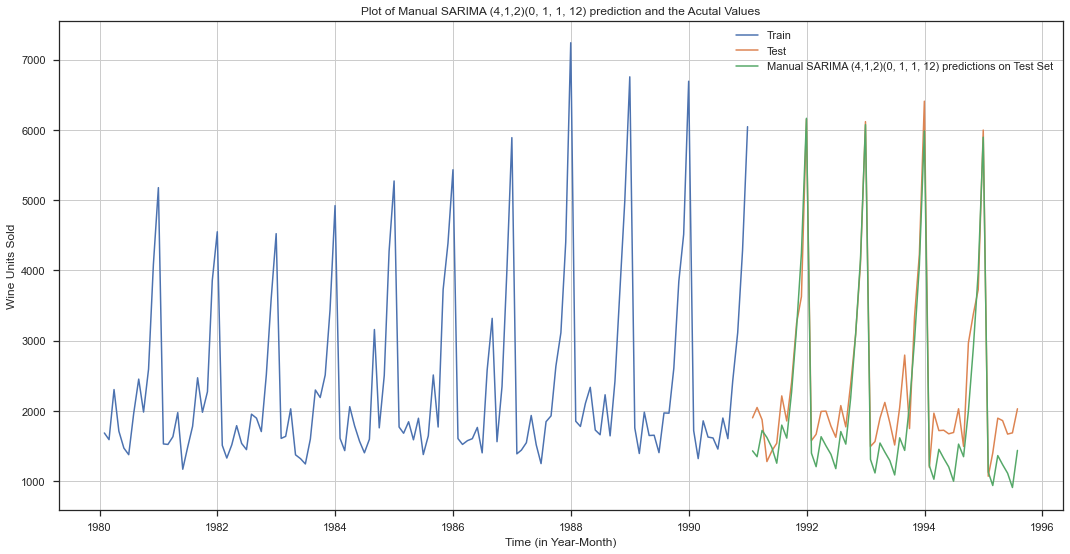

In [841]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Sparkling_Wine_Sales'], label='Train')
plt.plot(test['Sparkling_Wine_Sales'], label='Test')

plt.plot(predicted_manual_SARIMA.predicted_mean, label='Manual SARIMA (4,1,2)(0, 1, 1, 12) predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Manual SARIMA (4,1,2)(0, 1, 1, 12) prediction and the Acutal Values');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

In [842]:
rmse = mean_squared_error(test['Sparkling_Wine_Sales'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling_Wine_Sales'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 468.67758855370784 
MAPE: 19.32491408973071


In [843]:
temp_resultsDf = pd.DataFrame({'Test RMSE': rmse,'MAPE':mape}
                           ,index=['Manual SARIMA (4, 1, 2)(0, 1, 1, 12)'])


resultsDf_2 = pd.concat([resultsDf_2,temp_resultsDf])

resultsDf_2

Test RMSE       MAPE
Auto ARIMA (4,1,4)                    1212.918076  40.214639
Auto SARIMA (3,1,2)(3,0,1,12)          579.925219  25.052504
Manual ARIMA (2,1,1)                  1300.721383  40.225669
Manual SARIMA (4, 1, 2)(0, 1, 1, 12)   468.677589  19.324914

## 8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [844]:
#Combining the tables which contained the exponential smoothing models and ARIMA/SARIMA into one
resultsDf_Final = pd.concat([resultsDf,resultsDf_2])

resultsDf_Final

Test RMSE       MAPE
Linear Regression                                   1389.135175        NaN
Naive Model                                         3864.279352        NaN
Simple Average                                      1275.081804        NaN
2 point TMA                                          813.400684        NaN
4 point TMA                                         1156.589694        NaN
6 point TMA                                         1283.927428        NaN
9 point TMA                                         1346.278315        NaN
Alpha =0.0496,SimpleExponentialSmoothing            1316.135411        NaN
Alpha=0.6885, Beta=9.99e-05, Double Exponential...  2007.238526        NaN
Alpha=0.05, Beta=0.05, Double Exponential Smoot...  1418.407668        NaN
Alpha=0.111,Beta=0.0617,Gamma=0.395,Triple Expo...   469.659106        NaN
Alpha=0.35,Beta=0.10,Gamma=0.20,Triple Exponent...   319.498680        NaN
Auto ARIMA (4,1,4)                                  1212.918076  40.214639
Auto SARIMA (3,1,2)(3,0,1,12)                        579.925219  25.052504
Manual ARIMA (2,1,1)                                1300.721383  40.225669
Manual SARIMA (4, 1, 2)(0, 1, 1, 12)                 468.677589  19.324914

In [845]:
resultsDf_Final.sort_values(by='MAPE',ascending=True)

Test RMSE       MAPE
Manual SARIMA (4, 1, 2)(0, 1, 1, 12)                 468.677589  19.324914
Auto SARIMA (3,1,2)(3,0,1,12)                        579.925219  25.052504
Auto ARIMA (4,1,4)                                  1212.918076  40.214639
Manual ARIMA (2,1,1)                                1300.721383  40.225669
Linear Regression                                   1389.135175        NaN
Naive Model                                         3864.279352        NaN
Simple Average                                      1275.081804        NaN
2 point TMA                                          813.400684        NaN
4 point TMA                                         1156.589694        NaN
6 point TMA                                         1283.927428        NaN
9 point TMA                                         1346.278315        NaN
Alpha =0.0496,SimpleExponentialSmoothing            1316.135411        NaN
Alpha=0.6885, Beta=9.99e-05, Double Exponential...  2007.238526        NaN
Alpha=0.05, Beta=0.05, Double Exponential Smoot...  1418.407668        NaN
Alpha=0.111,Beta=0.0617,Gamma=0.395,Triple Expo...   469.659106        NaN
Alpha=0.35,Beta=0.10,Gamma=0.20,Triple Exponent...   319.498680        NaN

In [846]:
resultsDf_Final.sort_values(by='Test RMSE',ascending=True)

Test RMSE       MAPE
Alpha=0.35,Beta=0.10,Gamma=0.20,Triple Exponent...   319.498680        NaN
Manual SARIMA (4, 1, 2)(0, 1, 1, 12)                 468.677589  19.324914
Alpha=0.111,Beta=0.0617,Gamma=0.395,Triple Expo...   469.659106        NaN
Auto SARIMA (3,1,2)(3,0,1,12)                        579.925219  25.052504
2 point TMA                                          813.400684        NaN
4 point TMA                                         1156.589694        NaN
Auto ARIMA (4,1,4)                                  1212.918076  40.214639
Simple Average                                      1275.081804        NaN
6 point TMA                                         1283.927428        NaN
Manual ARIMA (2,1,1)                                1300.721383  40.225669
Alpha =0.0496,SimpleExponentialSmoothing            1316.135411        NaN
9 point TMA                                         1346.278315        NaN
Linear Regression                                   1389.135175        NaN
Alpha=0.05, Beta=0.05, Double Exponential Smoot...  1418.407668        NaN
Alpha=0.6885, Beta=9.99e-05, Double Exponential...  2007.238526        NaN
Naive Model                                         3864.279352        NaN

## 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

From the above results we can see that Triple exponential model is the optimum model followed by Trailing moving average models. However lets take TES and Manual SARIMA and predict for the future.

Text(0, 0.5, 'Wine Units Sold')

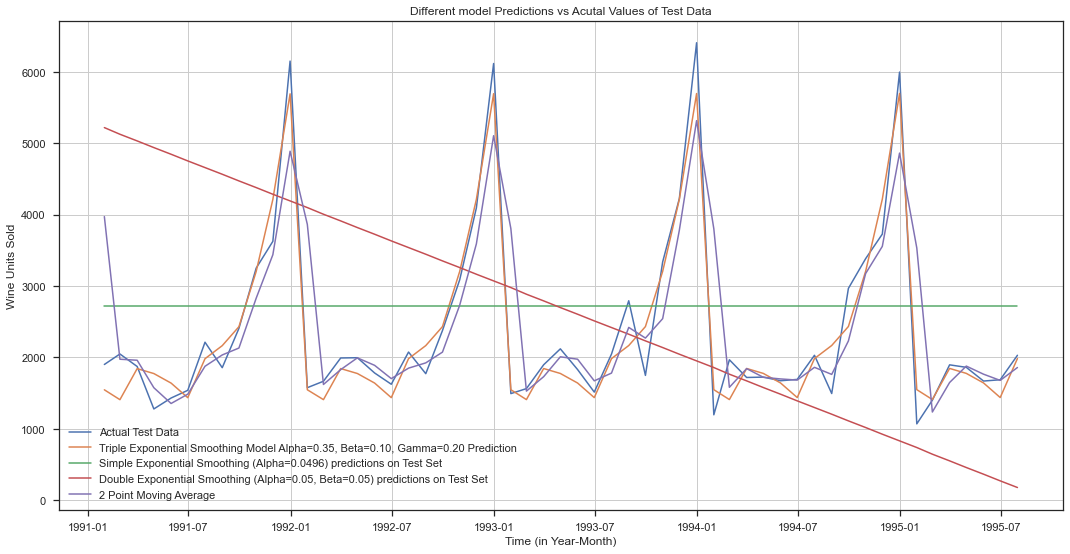

In [847]:
## Plotting on training data

plt.figure(figsize=(18,9))
plt.plot(test['Sparkling_Wine_Sales'], label='Actual Test Data')

plt.plot(TES_test['predict', 0.35,0.10,0.20], label='Triple Exponential Smoothing Model Alpha=0.35, Beta=0.10, Gamma=0.20 Prediction')

plt.plot(SES_test['predict'], label='Simple Exponential Smoothing (Alpha=0.0496) predictions on Test Set')

plt.plot(DES_test['predict'], label='Double Exponential Smoothing (Alpha=0.05, Beta=0.05) predictions on Test Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Moving Average')

plt.legend(loc='best')
plt.grid();
plt.title('Different model Predictions vs Acutal Values of Test Data');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

Text(0, 0.5, 'Wine Units Sold')

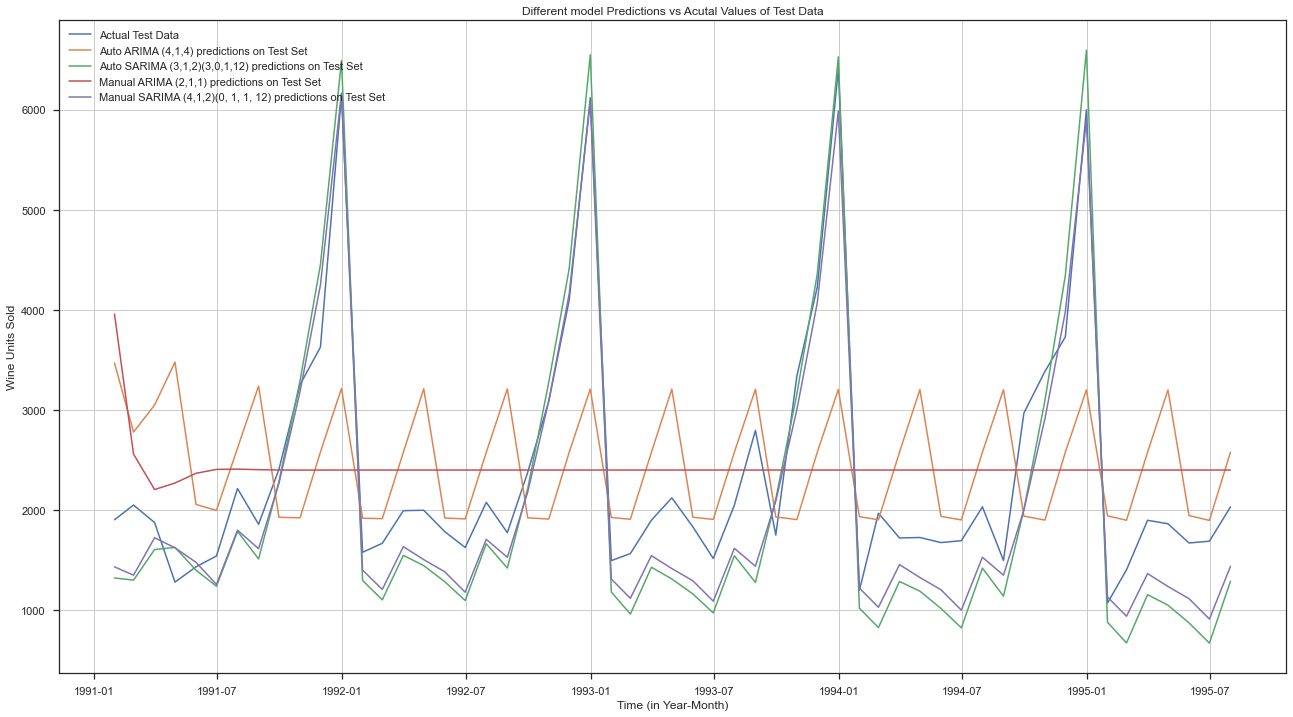

In [848]:
## Plotting on both the Training data

plt.figure(figsize=(22,12))
plt.plot(test['Sparkling_Wine_Sales'], label='Actual Test Data')

plt.plot(predicted_auto_ARIMA, label='Auto ARIMA (4,1,4) predictions on Test Set')

plt.plot(predicted_auto_SARIMA.predicted_mean, label='Auto SARIMA (3,1,2)(3,0,1,12) predictions on Test Set')

plt.plot(predicted_manual_ARIMA, label='Manual ARIMA (2,1,1) predictions on Test Set')

plt.plot(predicted_manual_SARIMA.predicted_mean, label='Manual SARIMA (4,1,2)(0, 1, 1, 12) predictions on Test Set')


plt.legend(loc='upper left')
plt.grid();
plt.title('Different model Predictions vs Acutal Values of Test Data');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

Text(0, 0.5, 'Wine Units Sold')

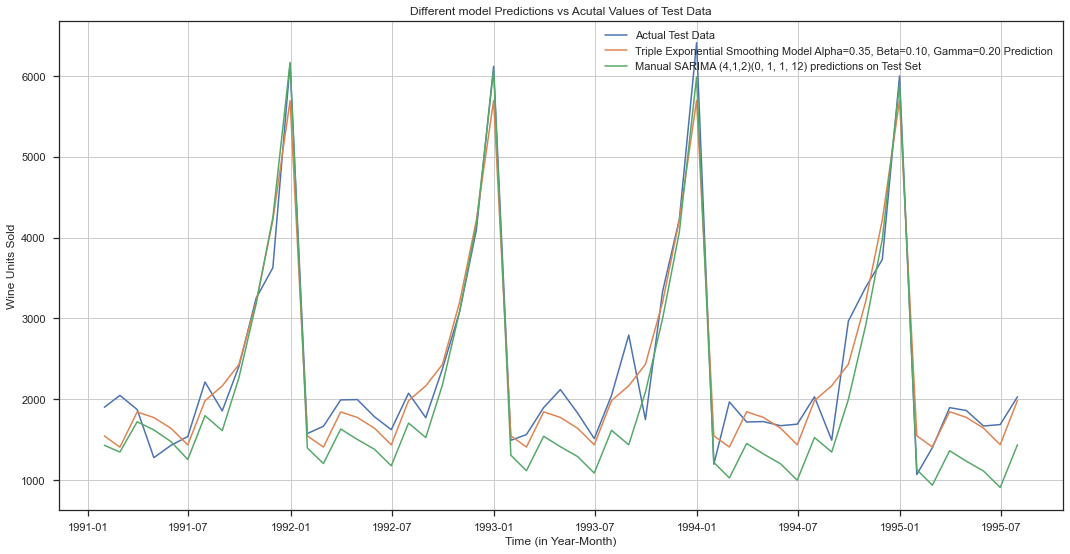

In [849]:
## Plotting on both the Training data

plt.figure(figsize=(18,9))
plt.plot(test['Sparkling_Wine_Sales'], label='Actual Test Data')

plt.plot(TES_test['predict', 0.35,0.10,0.20], label='Triple Exponential Smoothing Model Alpha=0.35, Beta=0.10, Gamma=0.20 Prediction')

plt.plot(predicted_manual_SARIMA.predicted_mean, label='Manual SARIMA (4,1,2)(0, 1, 1, 12) predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Different model Predictions vs Acutal Values of Test Data');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

## Optimum Model - Triple Exponential Smoothing Model (Alpha=0.35,Beta=0.10,Gamma=0.20)

Text(0, 0.5, 'Wine Units Sold')

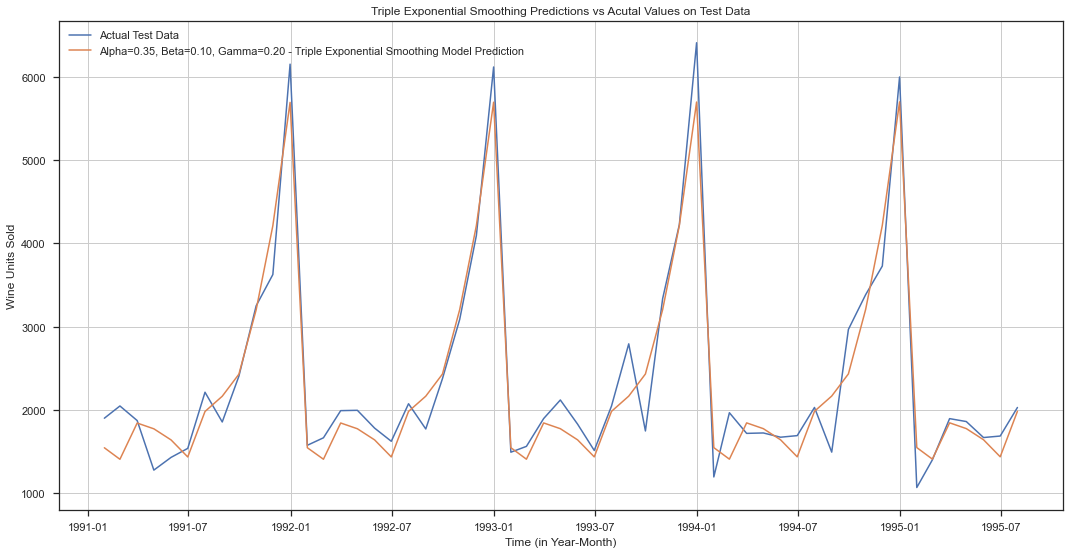

In [850]:
## Plotting on both the Training data

plt.figure(figsize=(18,9))
plt.plot(test['Sparkling_Wine_Sales'], label='Actual Test Data')

plt.plot(TES_test['predict', 0.35,0.10,0.20], label='Alpha=0.35, Beta=0.10, Gamma=0.20 - Triple Exponential Smoothing Model Prediction')

plt.legend(loc='best')
plt.grid();
plt.title('Triple Exponential Smoothing Predictions vs Acutal Values on Test Data');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

Text(0, 0.5, 'Wine Units Sold')

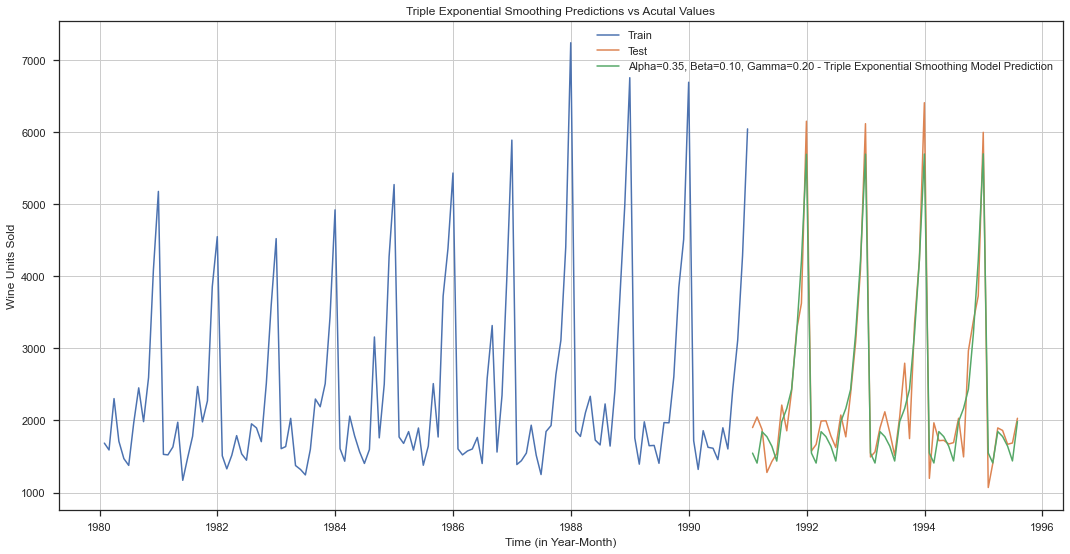

In [851]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Sparkling_Wine_Sales'], label='Train')
plt.plot(test['Sparkling_Wine_Sales'], label='Test')

plt.plot(TES_test['predict', 0.35,0.10,0.20], label='Alpha=0.35, Beta=0.10, Gamma=0.20 - Triple Exponential Smoothing Model Prediction')

plt.legend(loc='best')
plt.grid();
plt.title('Triple Exponential Smoothing Predictions vs Acutal Values');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

In [852]:
TES_Fullmodel = ExponentialSmoothing(df['Sparkling_Wine_Sales'],trend='additive',seasonal='multiplicative',freq='M').fit(smoothing_level=0.35, smoothing_trend=0.10, smoothing_seasonal=0.20)

In [853]:
TES_Fullmodel.params

{'smoothing_level': 0.35,
 'smoothing_trend': 0.1,
 'smoothing_seasonal': 0.2,
 'damping_trend': nan,
 'initial_level': 1398.2530588387642,
 'initial_trend': -9.965447804805777,
 'initial_seasons': array([1.22591905, 1.17793713, 1.52997   , 1.38253648, 1.18977646,
        1.15907087, 1.57422577, 2.03505399, 1.74199935, 2.36190106,
        3.4666768 , 4.54948665]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [854]:
RMSE_fullmodel = metrics.mean_squared_error(df['Sparkling_Wine_Sales'],TES_Fullmodel.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel)

RMSE: 371.69498113818327


In [855]:
# Getting the predictions for the 12 months into the future
prediction = TES_Fullmodel.forecast(steps=12)
print('Forecast of next 12 months')
prediction.tail(12)

Forecast of next 12 months


1995-08-31    2045.552999
1995-09-30    2527.646768
1995-10-31    3363.698965
1995-11-30    4240.102444
1995-12-31    6487.343248
1996-01-31    1540.031613
1996-02-29    1804.447295
1996-03-31    2055.022618
1996-04-30    1986.097591
1996-05-31    1802.258380
1996-06-30    1681.621958
1996-07-31    2136.129372
Freq: M, dtype: float64

Text(0, 0.5, 'Wine Units Sold')

<Figure size 1296x648 with 0 Axes>

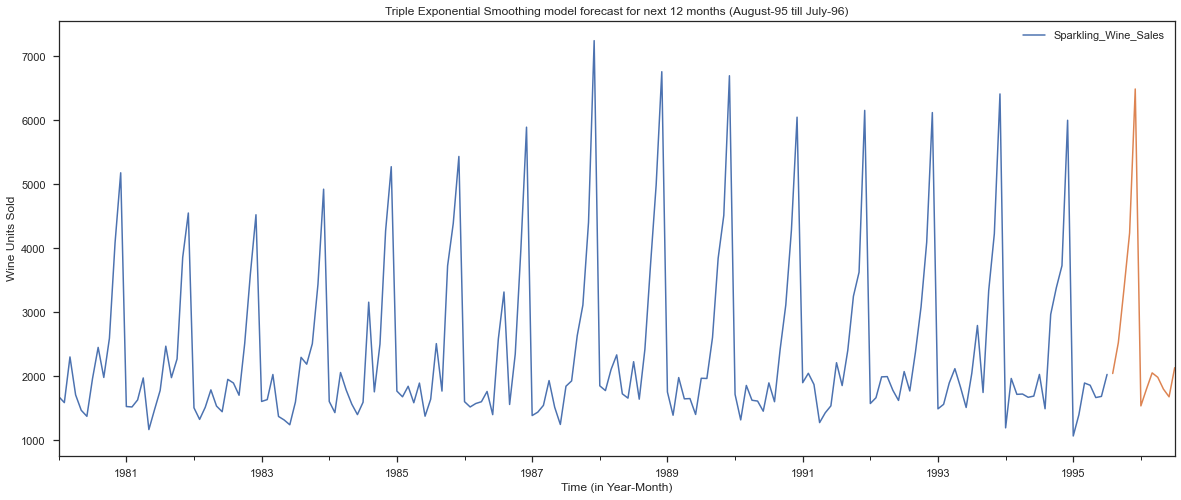

In [856]:
plt.figure(figsize=(18,9))
df.plot()
prediction.plot();
plt.title('Triple Exponential Smoothing model forecast for next 12 months (August-95 till July-96)')
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

In [857]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
predicted_df = pd.DataFrame({'lower_ci':prediction - (1.96*np.std(TES_Fullmodel.resid,ddof=1)),
                          'prediction':prediction,
                          'upper_ci': prediction + (1.96*np.std(TES_Fullmodel.resid,ddof=1))})
predicted_df.head(12)

lower_ci   prediction     upper_ci
1995-08-31  1315.075377  2045.552999  2776.030621
1995-09-30  1797.169146  2527.646768  3258.124390
1995-10-31  2633.221343  3363.698965  4094.176587
1995-11-30  3509.624822  4240.102444  4970.580066
1995-12-31  5756.865626  6487.343248  7217.820869
1996-01-31   809.553991  1540.031613  2270.509235
1996-02-29  1073.969673  1804.447295  2534.924917
1996-03-31  1324.544997  2055.022618  2785.500240
1996-04-30  1255.619969  1986.097591  2716.575213
1996-05-31  1071.780758  1802.258380  2532.736001
1996-06-30   951.144337  1681.621958  2412.099580
1996-07-31  1405.651750  2136.129372  2866.606994

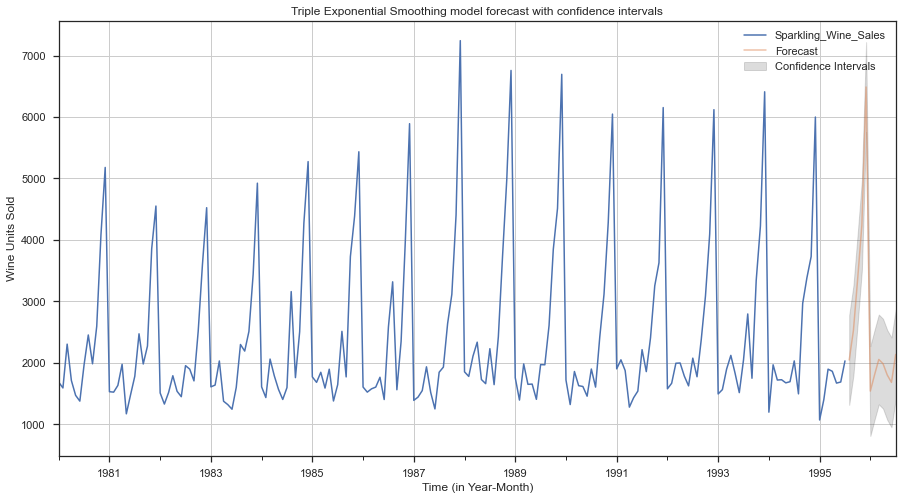

In [858]:
# plot the forecast along with the confidence band

axis = df.plot(label='Actual', figsize=(15,8))
predicted_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(predicted_df.index, predicted_df['lower_ci'], predicted_df['upper_ci'], color='k', alpha=.15,label='Confidence Intervals')
plt.title('Triple Exponential Smoothing model forecast with confidence intervals')
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.legend(loc='best')
plt.grid()
plt.show()

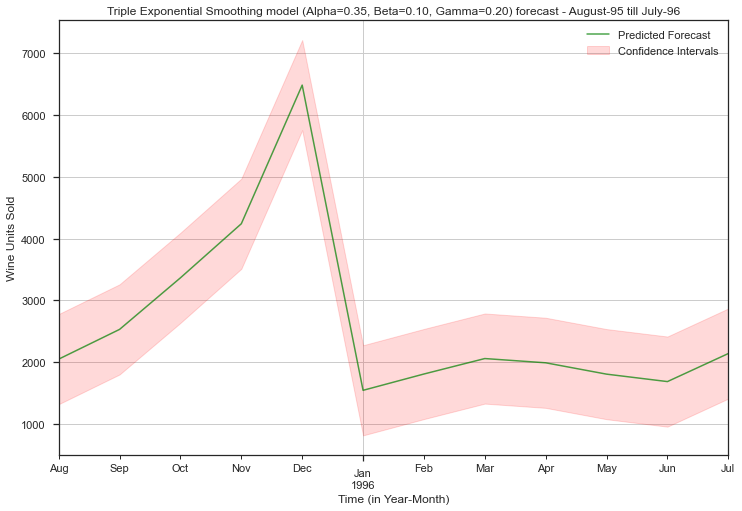

In [859]:
# plot the forecast along with the confidence band
plt.figure(figsize=(12,8))
axis = prediction.plot(color='Green', label='Predicted Forecast', alpha=0.7)
axis.fill_between(predicted_df.index, predicted_df['lower_ci'], predicted_df['upper_ci'], color='Red', alpha=.15, label='Confidence Intervals')
axis.set_title('Triple Exponential Smoothing model (Alpha=0.35, Beta=0.10, Gamma=0.20) forecast - August-95 till July-96')
axis.set_xlabel('Time (in Year-Month)')
axis.set_ylabel('Wine Units Sold')
plt.legend(loc='best')
plt.grid()
plt.show()

## Optimum Model - Manual SARIMA Model (4, 1, 2)(0, 1, 1, 12) 

Text(0, 0.5, 'Wine Units Sold')

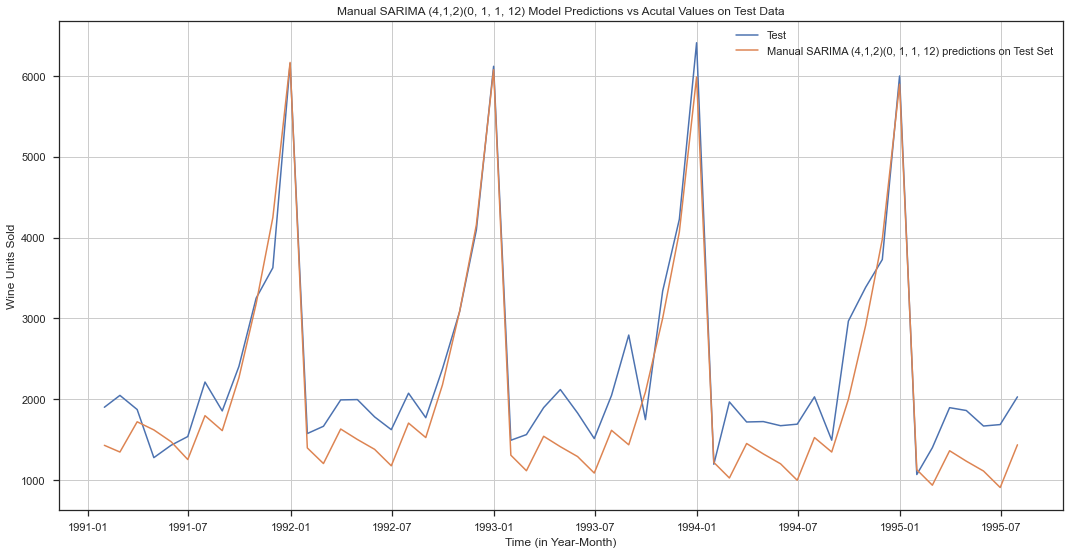

In [860]:
## Plotting on Test data

plt.figure(figsize=(18,9))
plt.plot(test['Sparkling_Wine_Sales'], label='Test')

plt.plot(predicted_manual_SARIMA.predicted_mean, label='Manual SARIMA (4,1,2)(0, 1, 1, 12) predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Manual SARIMA (4,1,2)(0, 1, 1, 12) Model Predictions vs Acutal Values on Test Data');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

Text(0, 0.5, 'Wine Units Sold')

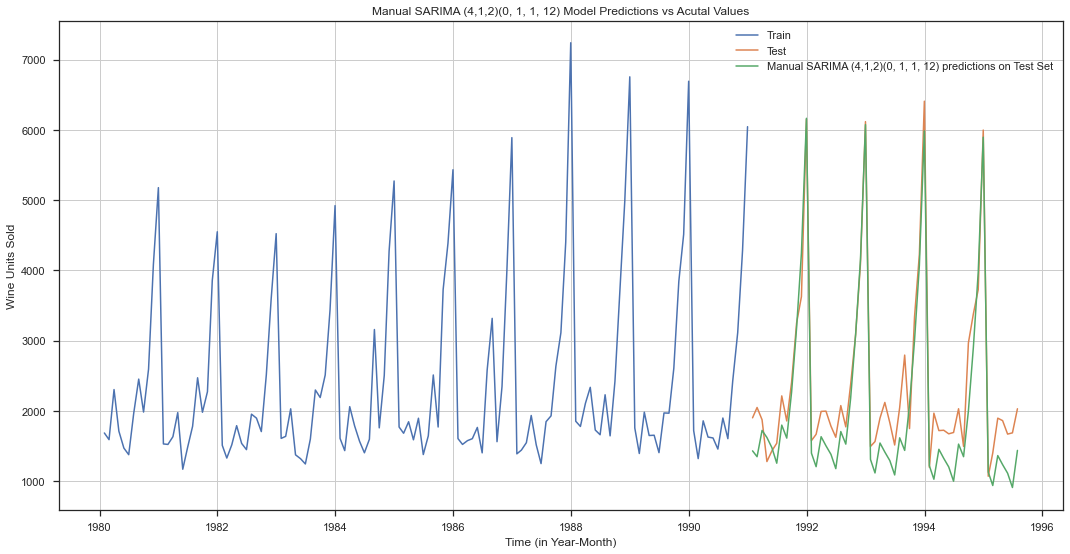

In [861]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['Sparkling_Wine_Sales'], label='Train')
plt.plot(test['Sparkling_Wine_Sales'], label='Test')

plt.plot(predicted_manual_SARIMA.predicted_mean, label='Manual SARIMA (4,1,2)(0, 1, 1, 12) predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Manual SARIMA (4,1,2)(0, 1, 1, 12) Model Predictions vs Acutal Values');
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

In [862]:
Manual_Sarima_FullModel = sm.tsa.statespace.SARIMAX(df['Sparkling_Wine_Sales'],
                                order= (4, 1, 2), 
                                seasonal_order= (0, 1, 1, 12), 
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_fullmodel_manual_sarima = Manual_Sarima_FullModel.fit(maxiter=1000)
print(results_fullmodel_manual_sarima.summary())

                                      SARIMAX Results                                       
Dep. Variable:                 Sparkling_Wine_Sales   No. Observations:                  187
Model:             SARIMAX(4, 1, 2)x(0, 1, [1], 12)   Log Likelihood               -1171.945
Date:                              Sun, 23 Oct 2022   AIC                           2359.889
Time:                                      21:52:11   BIC                           2384.441
Sample:                                  01-31-1980   HQIC                          2369.859
                                       - 07-31-1995                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6275      0.517      1.213      0.225      -0.386       1.641
ar.L2         -0.15

In [863]:
predicted_manual_sarima_full_data = results_fullmodel_manual_sarima.get_forecast(steps=12)
predicted_manual_sarima_full_data.summary_frame(alpha=0.05).head()

Sparkling_Wine_Sales         mean     mean_se  mean_ci_lower  mean_ci_upper
1995-08-31            1850.816055  381.838092    1102.427147    2599.204963
1995-09-30            2396.196691  387.330610    1637.042644    3155.350737
1995-10-31            3227.083904  387.331727    2467.927669    3986.240139
1995-11-30            3898.042175  389.053921    3135.510502    4660.573848
1995-12-31            6099.973063  389.124031    5337.303976    6862.642150

In [864]:
predicted_manual_sarima_df = predicted_manual_sarima_full_data.summary_frame(alpha=0.05)
predicted_manual_sarima_df

Sparkling_Wine_Sales         mean     mean_se  mean_ci_lower  mean_ci_upper
1995-08-31            1850.816055  381.838092    1102.427147    2599.204963
1995-09-30            2396.196691  387.330610    1637.042644    3155.350737
1995-10-31            3227.083904  387.331727    2467.927669    3986.240139
1995-11-30            3898.042175  389.053921    3135.510502    4660.573848
1995-12-31            6099.973063  389.124031    5337.303976    6862.642150
1996-01-31            1231.641762  389.124033     468.972671    1994.310852
1996-02-29            1559.208853  389.811385     795.192578    2323.225129
1996-03-31            1801.347895  390.840893    1035.313821    2567.381970
1996-04-30            1780.038171  392.386202    1010.975346    2549.100996
1996-05-31            1627.831142  394.277144     855.062140    2400.600144
1996-06-30            1570.336070  396.011294     794.168195    2346.503944
1996-07-31            1979.251254  397.569765    1200.028834    2758.473674

In [865]:
rmse_manual_sarima_full = metrics.mean_squared_error(df['Sparkling_Wine_Sales'],results_fullmodel_manual_sarima.fittedvalues,squared=False)

rmse_manual_sarima_full

577.5088465074249

In [866]:
# Getting the predictions for the 12 months into the future
prediction_manual_sarima_full = results_fullmodel_manual_sarima.forecast(steps=12)
prediction_manual_sarima_full.tail(12)

1995-08-31    1850.816055
1995-09-30    2396.196691
1995-10-31    3227.083904
1995-11-30    3898.042175
1995-12-31    6099.973063
1996-01-31    1231.641762
1996-02-29    1559.208853
1996-03-31    1801.347895
1996-04-30    1780.038171
1996-05-31    1627.831142
1996-06-30    1570.336070
1996-07-31    1979.251254
Freq: M, Name: predicted_mean, dtype: float64

Text(0, 0.5, 'Wine Units Sold')

<Figure size 1296x648 with 0 Axes>

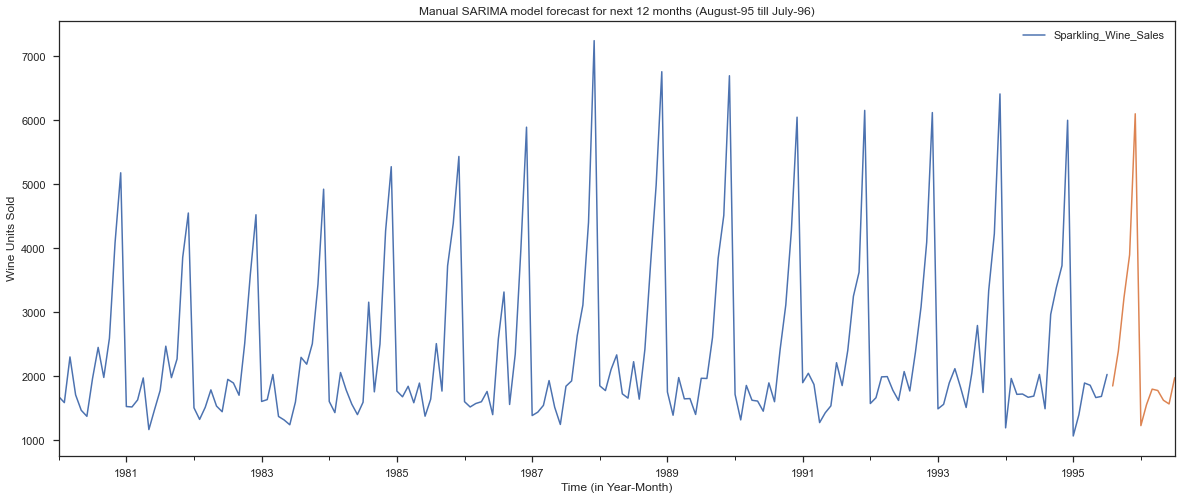

In [867]:
plt.figure(figsize=(18,9))
df.plot()
prediction_manual_sarima_full.plot();
plt.title('Manual SARIMA model forecast for next 12 months (August-95 till July-96)')
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')

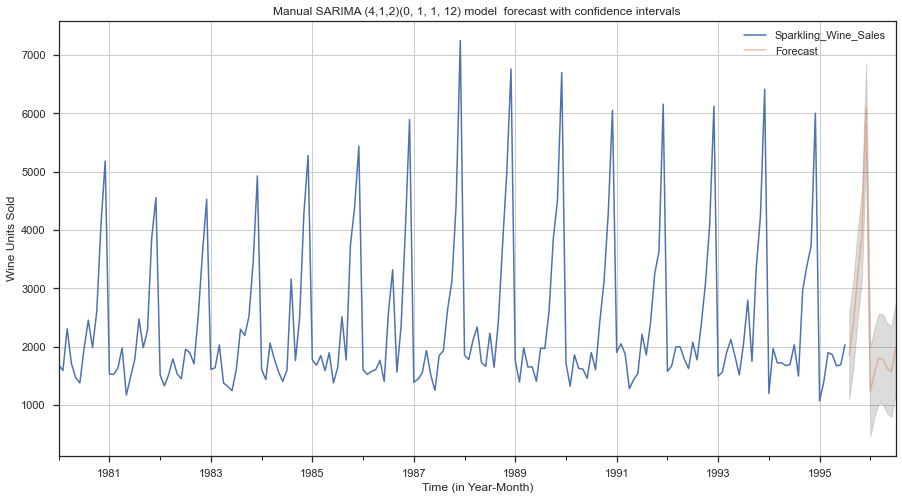

In [868]:
# plot the forecast along with the confidence band

axis = df.plot(label='Actual', figsize=(15,8))
predicted_manual_sarima_df['mean'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(predicted_manual_sarima_df.index, predicted_manual_sarima_df['mean_ci_lower'], predicted_manual_sarima_df['mean_ci_upper'], color='k', alpha=.15)
plt.title('Manual SARIMA (4,1,2)(0, 1, 1, 12) model  forecast with confidence intervals')
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.legend(loc='best')
plt.grid()
plt.show()

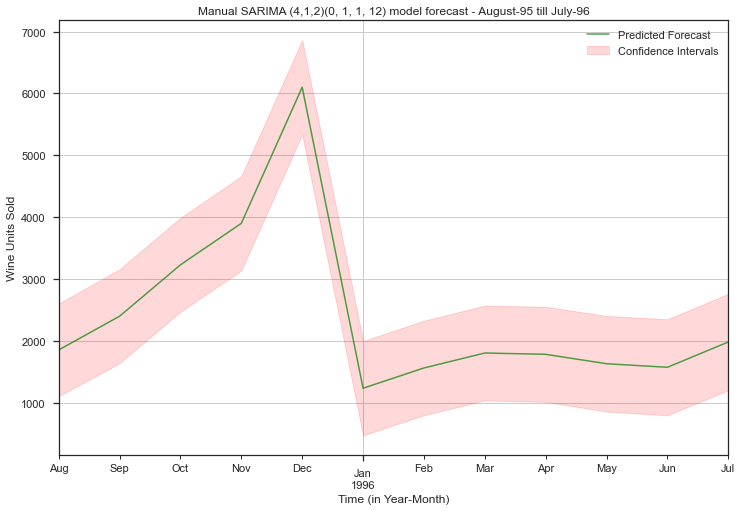

In [869]:
# plot the forecast along with the confidence band
plt.figure(figsize=(12,8))
axis = predicted_manual_sarima_df['mean'].plot(color='Green', label='Predicted Forecast', alpha=0.7)
axis.fill_between(predicted_manual_sarima_df.index, predicted_manual_sarima_df['mean_ci_lower'], predicted_manual_sarima_df['mean_ci_upper'], color='Red', alpha=.15, label='Confidence Intervals')
axis.set_title('Manual SARIMA (4,1,2)(0, 1, 1, 12) model forecast - August-95 till July-96')
axis.set_xlabel('Time (in Year-Month)')
axis.set_ylabel('Wine Units Sold')
plt.legend(loc='best')
plt.grid()
plt.show()

## 10. Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.

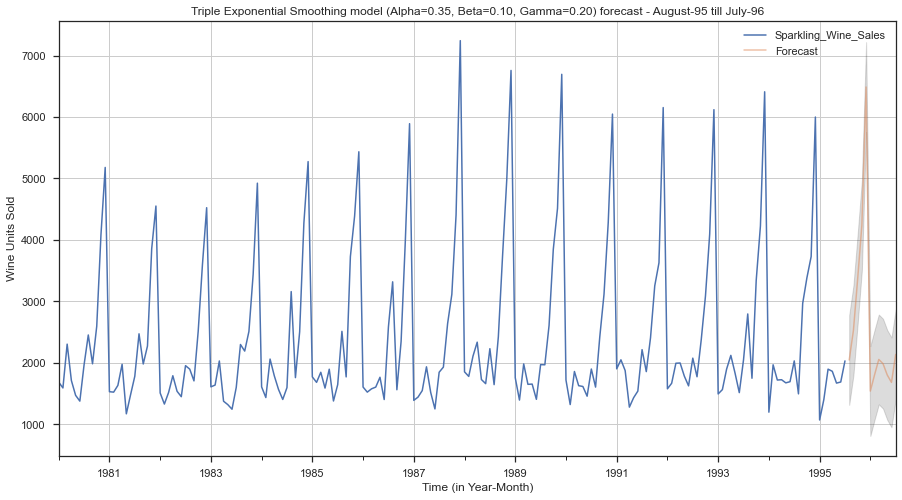

In [870]:
# plot the forecast along with the confidence band

axis = df.plot(label='Actual', figsize=(15,8))
predicted_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(predicted_df.index, predicted_df['lower_ci'], predicted_df['upper_ci'], color='k', alpha=.15)
plt.title('Triple Exponential Smoothing model (Alpha=0.35, Beta=0.10, Gamma=0.20) forecast - August-95 till July-96')
plt.xlabel('Time (in Year-Month)')
plt.ylabel('Wine Units Sold')
plt.legend(loc='best')
plt.grid()
plt.show()

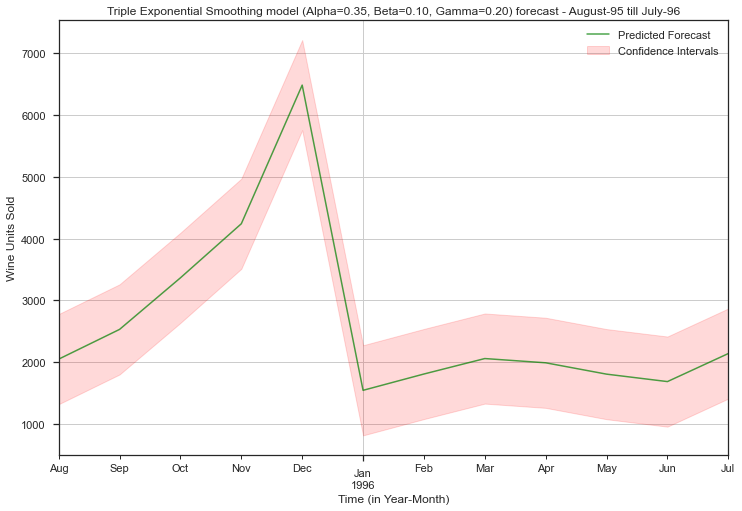

In [871]:
# plot the forecast along with the confidence band
plt.figure(figsize=(12,8))
axis = prediction.plot(color='Green', label='Predicted Forecast', alpha=0.7)
axis.fill_between(predicted_df.index, predicted_df['lower_ci'], predicted_df['upper_ci'], color='Red', alpha=.15, label='Confidence Intervals')
axis.set_title('Triple Exponential Smoothing model (Alpha=0.35, Beta=0.10, Gamma=0.20) forecast - August-95 till July-96')
axis.set_xlabel('Time (in Year-Month)')
axis.set_ylabel('Wine Units Sold')
plt.legend(loc='best')
plt.grid()
plt.show()

In [872]:
TES_Fullmodel.forecast(steps=12)

1995-08-31    2045.552999
1995-09-30    2527.646768
1995-10-31    3363.698965
1995-11-30    4240.102444
1995-12-31    6487.343248
1996-01-31    1540.031613
1996-02-29    1804.447295
1996-03-31    2055.022618
1996-04-30    1986.097591
1996-05-31    1802.258380
1996-06-30    1681.621958
1996-07-31    2136.129372
Freq: M, dtype: float64

In [873]:
TES_Fullmodel.forecast(steps=12).describe()

count      12.000000
mean     2639.162771
std      1439.827987
min      1540.031613
25%      1803.900066
50%      2050.287809
75%      2736.659817
max      6487.343248
dtype: float64

In [874]:
#Calculating the percentage of sales in the last 4 months
(2527+3363+4240+6487)/TES_Fullmodel.forecast(steps=12).sum()

0.5246929121733658

We needed to construct an optimum model to forecast the sparkling wine sales for the next 12 months. The model information, insights and recommendations are as follows.  

Model Insights:
    
•	The time series in consideration exhibits a little rising trend and stable seasonality. When comparing the various models, we can see that Triple Exponential Smoothing and SARIMA models frequently deliver the greatest results. This is due to the fact that these models are excellent at predicting time series that demonstrate trend and seasonality.
•	We examine the root mean squared value of the forecast model to assess its performance (RMSE). The model with the lowest RMSE value and characteristics that match the test data is regarded as being a superior model.
•	We observed that SARIMA and the Triple Exponential Smoothing model had the lowest RMSE and the characteristics that most closely fit test data. As a result, they are regarded as the best models for forecasting.
Historical Insights:
•	The sparkling wine sales have remained stable throughout time. Sparkling wine sales peaked in 1988 and fell to their present low position in 1995 (as we have data for only first 7 months). 
•	The monthly sales trajectory appears to be exactly the opposite of the yearly plot, with a progressive increase towards the end of each year. January has the lowest wine sales, while December has the highest. From January to August, sales increase gradually, and then they quickly increase after that.
•	The average monthly sales of sparkling wine are 2402 bottles. More than 50% of the sold units of sparkling wine fall between 1605 and 2549. 1070 units were sold as the lowest and 7242 units as the most. Only 25% of monthly sales that were recorded were for more than 2549 units.
•	Around 60 to 70 percent of the units sold are fewer than 2500, and 80% of the units sold are less than 4000. Only 20% of sales involved more than 3000 items. Therefore, it is clear that the bulk of sales were in the range of 1000 to 3000 units.

Forecast Insights:
    
•	Based on the forecast made by the Triple Exponential Smoothing model previously presented, the following insights are offered.
•	The forecast calls for average sale of 2639 units, up 237 units from the historical average of 2402 units. Thus, we might observe an increase in average sales of 10%.
•	The prediction is for a minimum sales volume of 1540 units, which is 470 units more than the minimum sales volume of 1070 units in the past. Consequently, a 43% increase in minimum sales is seen.
•	The projection estimates a maximum sales volume of 6487 units, which is 755 units fewer than the largest sales volume recorded in the past, which was 7242 units. Consequently, a 10% decrease in maximum sales is visible.
•	In comparison to the historical standard deviation of 1295 recorded in the past, the forecast's standard deviation is 1439 units, or 144 units higher. It's gone up by 11%. This is also anticipated because historical data tends to have less volatility than future data.
•	We can see from the prediction that the months of October, November, and December have increased sales. December is often when the sales are at their highest. There is a startling decline in sales in January following December. The months after January appear to witness a gradual improvement in sales until October, when it jumps sharply.

Recommendations:
    
•	Records show that the months of September, October, November, and December account for 50% of the total sales forecast. Many festivities take place in these months, and many people travel during this time. One of the most popular types of wine used during festive and event celebrations is sparkling wine.
•	Wine sales often climb in the final two months of the year as people hurry to buy holiday beverages. For forthcoming occasions like Thanksgiving, Christmas, and New Year's, people typically stock up. The majority of individuals also buy in bulk for holiday gatherings and gift-giving. 
•	Many individuals choose wine as their go-to gift when it comes to occasions like parties and gift-giving. Sales of sparkling wine rise just before the winter holidays as more collectors purchase these wines as presents or look for vintages to serve at holiday gatherings.
•	The festival seasons may vary depending on where you are geographically, however the most of the celebrations take place in the last four months.
	In these months, promotional offers might be implemented to lower costs and significantly boost revenue.
	To increase sales, we must take advantage of all holiday events and set prices appropriately.
	Many individuals order in bulk to prepare for upcoming festivities, which may result in a high shipping expenditure. Businesses may provide significant discounts or free shipping beyond a certain threshold at these times.
	Giving customers gifts to improve their user experience is one of the greatest marketing strategies to deploy. In order to attract more consumers and increase sales, the company might provide free gifts on orders with significant sales.
	To target various client demographics, the proper marketing campaigns must be run
	Numerous ecommerce campaigns and competitions may be performed to broaden the product's audience and enhance sales.
•	The period from January to June is one of the key challenges for sparkling wine sales.
	To identify the elements affecting sales, in-depth market research must be conducted.
	Due to the fact that sparkling wines are typically used while celebrating, a market-friendly version of the existing product might be introduced by the company, helping to make up for the drop in sales. Long-term, this may bring in additional clients.
•	There are other key elements that might be driving the sales, despite the present model's ability to closely track the historical sales trend.
	The forecast might be improved by doing in-depth market research on the factors that influence sales and incorporating that information into the model for projection.
